In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import missingno as msno
import seaborn as sns 
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, accuracy_score

In [2]:
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
# 테마 설정: "default", "classic", "dark_background", "fivethirtyeight", "seaborn"
mpl.style.use("fivethirtyeight")
# 이미지가 레이아웃 안으로 들어오도록 함
mpl.rcParams.update({"figure.constrained_layout.use": True})

In [3]:
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
[fm.FontProperties(fname=font).get_name() for font in font_list if 'D2C' in font]
plt.rc('font', family='D2Coding')
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
DATASET_DIR = '/home/doeun/code/AI/ESTSOFT2024/workspace/dataset/'
load_dir = 'america_big_cities_health_inventory'
file_name = 'BigCitiesHealth.csv'
RSLT_DIR = '/home/doeun/code/AI/ESTSOFT2024/workspace/1.project1_structured/BCHI/processed/'
pvtb_dir = RSLT_DIR + 'pvtb/'

In [5]:
file_path = os.path.join(DATASET_DIR,load_dir,file_name)
df = pd.read_csv(file_path)

df.info()

/tmp/ipykernel_174677/4197090996.py:2: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189979 entries, 0 to 189978
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   metric_item_label                189979 non-null  object 
 1   metric_cat_label                 189979 non-null  object 
 2   metric_subcat_label              189979 non-null  object 
 3   metric_item_label_subtitle       189979 non-null  object 
 4   metric_cat_item_yaxis_label      189979 non-null  object 
 5   metric_source_desc_label_fn      189979 non-null  object 
 6   metric_source_desc_label_url_fn  189979 non-null  object 
 7   geo_label_city                   189979 non-null  object 
 8   geo_label_state                  188667 non-null  object 
 9   geo_label_citystate              189979 non-null  object 
 10  geo_fips_code                    188667 non-null  float64
 11  value                            189979 non-null  float64
 12  da

In [6]:
df["metric_label"] = df["metric_subcat_label"]+' | '+df["metric_item_label"] 

In [7]:
df["metric_label"].value_counts()

metric_label
Deaths | Premature Death                                  6825
Deaths | Injury Deaths                                    6405
Deaths | Deaths from All Causes                           6244
Cancer | All Cancer Deaths                                6233
Cardiovascular Disease | Cardiovascular Disease Deaths    6195
                                                          ... 
Housing | Homeless, Total                                  266
Housing | Vacant Housing and Homelessness                  266
Housing | Homeless, Children                               256
Respiratory Infection | COVID-19 Vaccination, Adults        70
Respiratory Infection | COVID-19 Vaccination, Seniors       70
Name: count, Length: 118, dtype: int64

### U.S. Total 제외

In [8]:
df_city = df[df['geo_label_city']!='U.S. Total']

df_city.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188667 entries, 0 to 189978
Data columns (total 32 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   metric_item_label                188667 non-null  object 
 1   metric_cat_label                 188667 non-null  object 
 2   metric_subcat_label              188667 non-null  object 
 3   metric_item_label_subtitle       188667 non-null  object 
 4   metric_cat_item_yaxis_label      188667 non-null  object 
 5   metric_source_desc_label_fn      188667 non-null  object 
 6   metric_source_desc_label_url_fn  188667 non-null  object 
 7   geo_label_city                   188667 non-null  object 
 8   geo_label_state                  188667 non-null  object 
 9   geo_label_citystate              188667 non-null  object 
 10  geo_fips_code                    188667 non-null  float64
 11  value                            188667 non-null  float64
 12  date_la

In [9]:
## x축을 metric_item_label로, 너무 많으니까 좀 줄여서.

/tmp/ipykernel_174677/2089051106.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


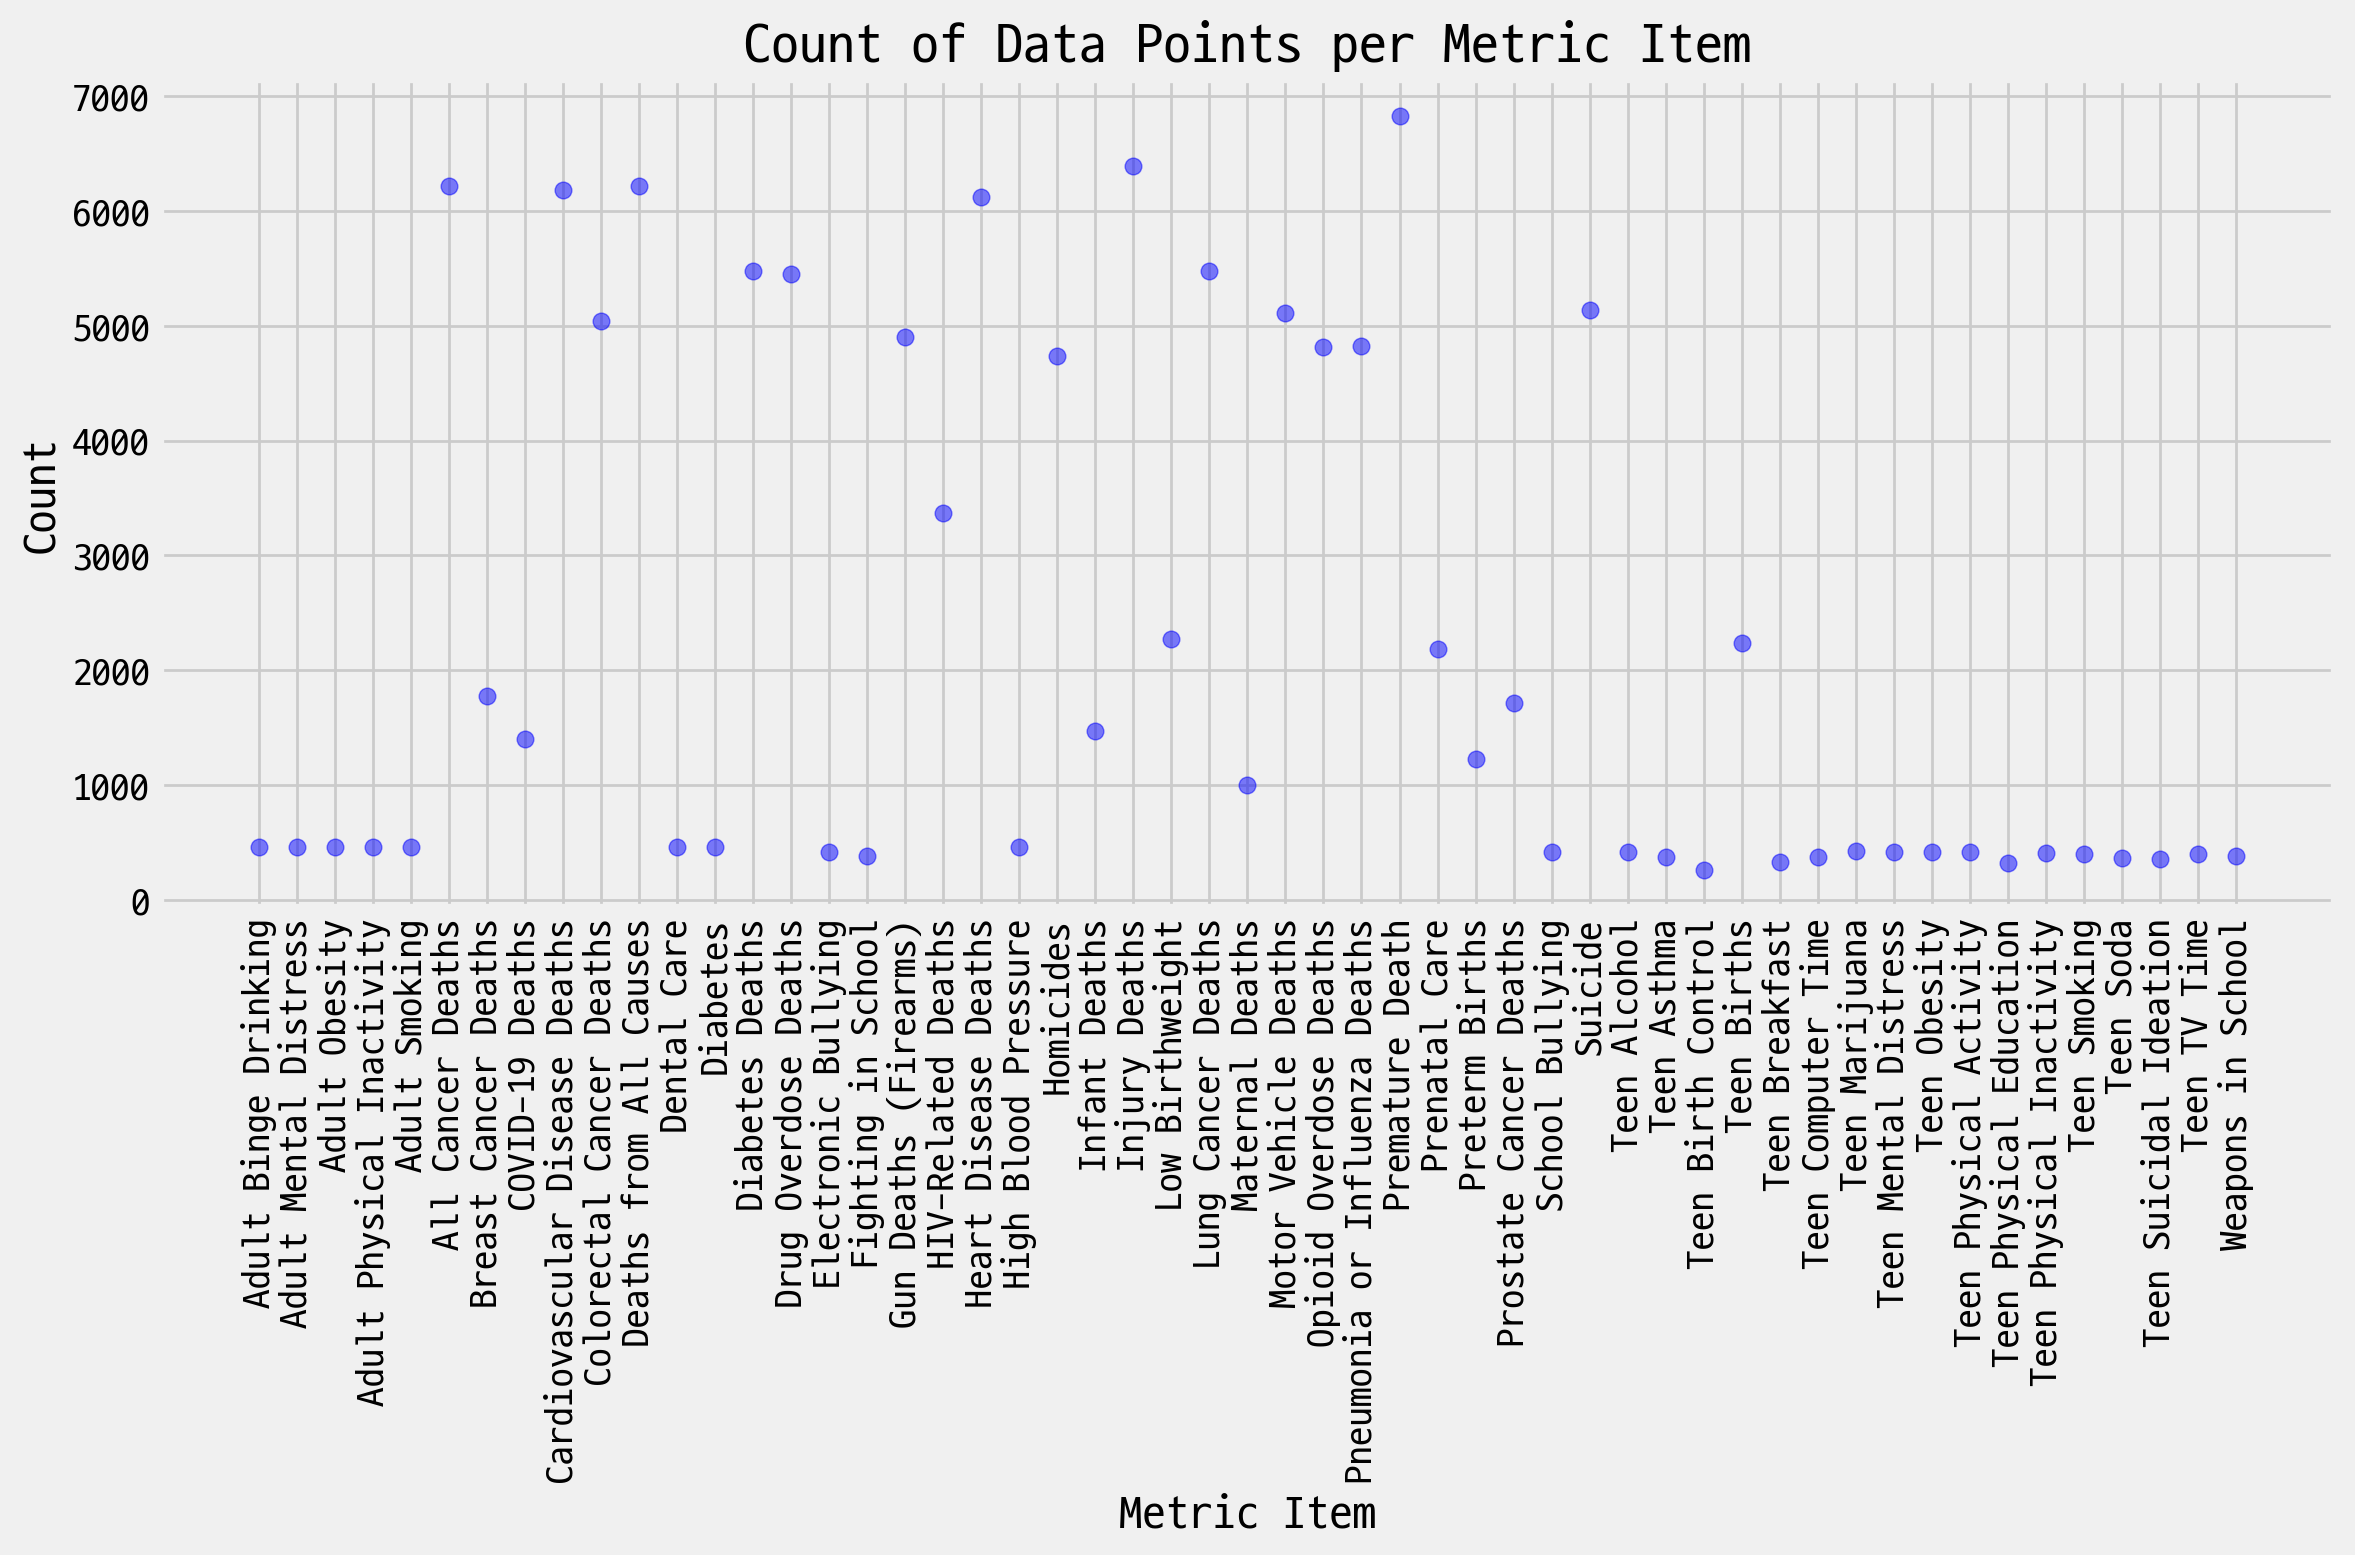

In [10]:
# 결측치가 60% 이상인 컬럼을 제거
threshold = 0.6
df_cleaned = df_city.loc[:, df_city.isnull().mean() < threshold]

# 데이터프레임의 수치형 컬럼 선택
numerical_columns = df_cleaned.select_dtypes(include='number').columns

# 결측치가 있는 행을 삭제
df_cleaned = df_cleaned.dropna(subset=numerical_columns)

# 'metric_item_label' 컬럼을 기준으로 데이터를 정렬하고 그룹화
sorted_data_by_metric = df_cleaned.sort_values(by='metric_item_label')
grouped_data_by_metric = sorted_data_by_metric.groupby('metric_item_label')

# 각 그룹의 데이터 포인트 수 계산
counts = grouped_data_by_metric.size()

# 데이터 포인트 수를 산점도로 시각화
plt.figure(figsize=(12, 8))
plt.scatter(counts.index, counts.values, alpha=0.5, color='blue')
plt.xlabel('Metric Item')
plt.ylabel('Count')
plt.title('Count of Data Points per Metric Item')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/tmp/ipykernel_174677/3957605476.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


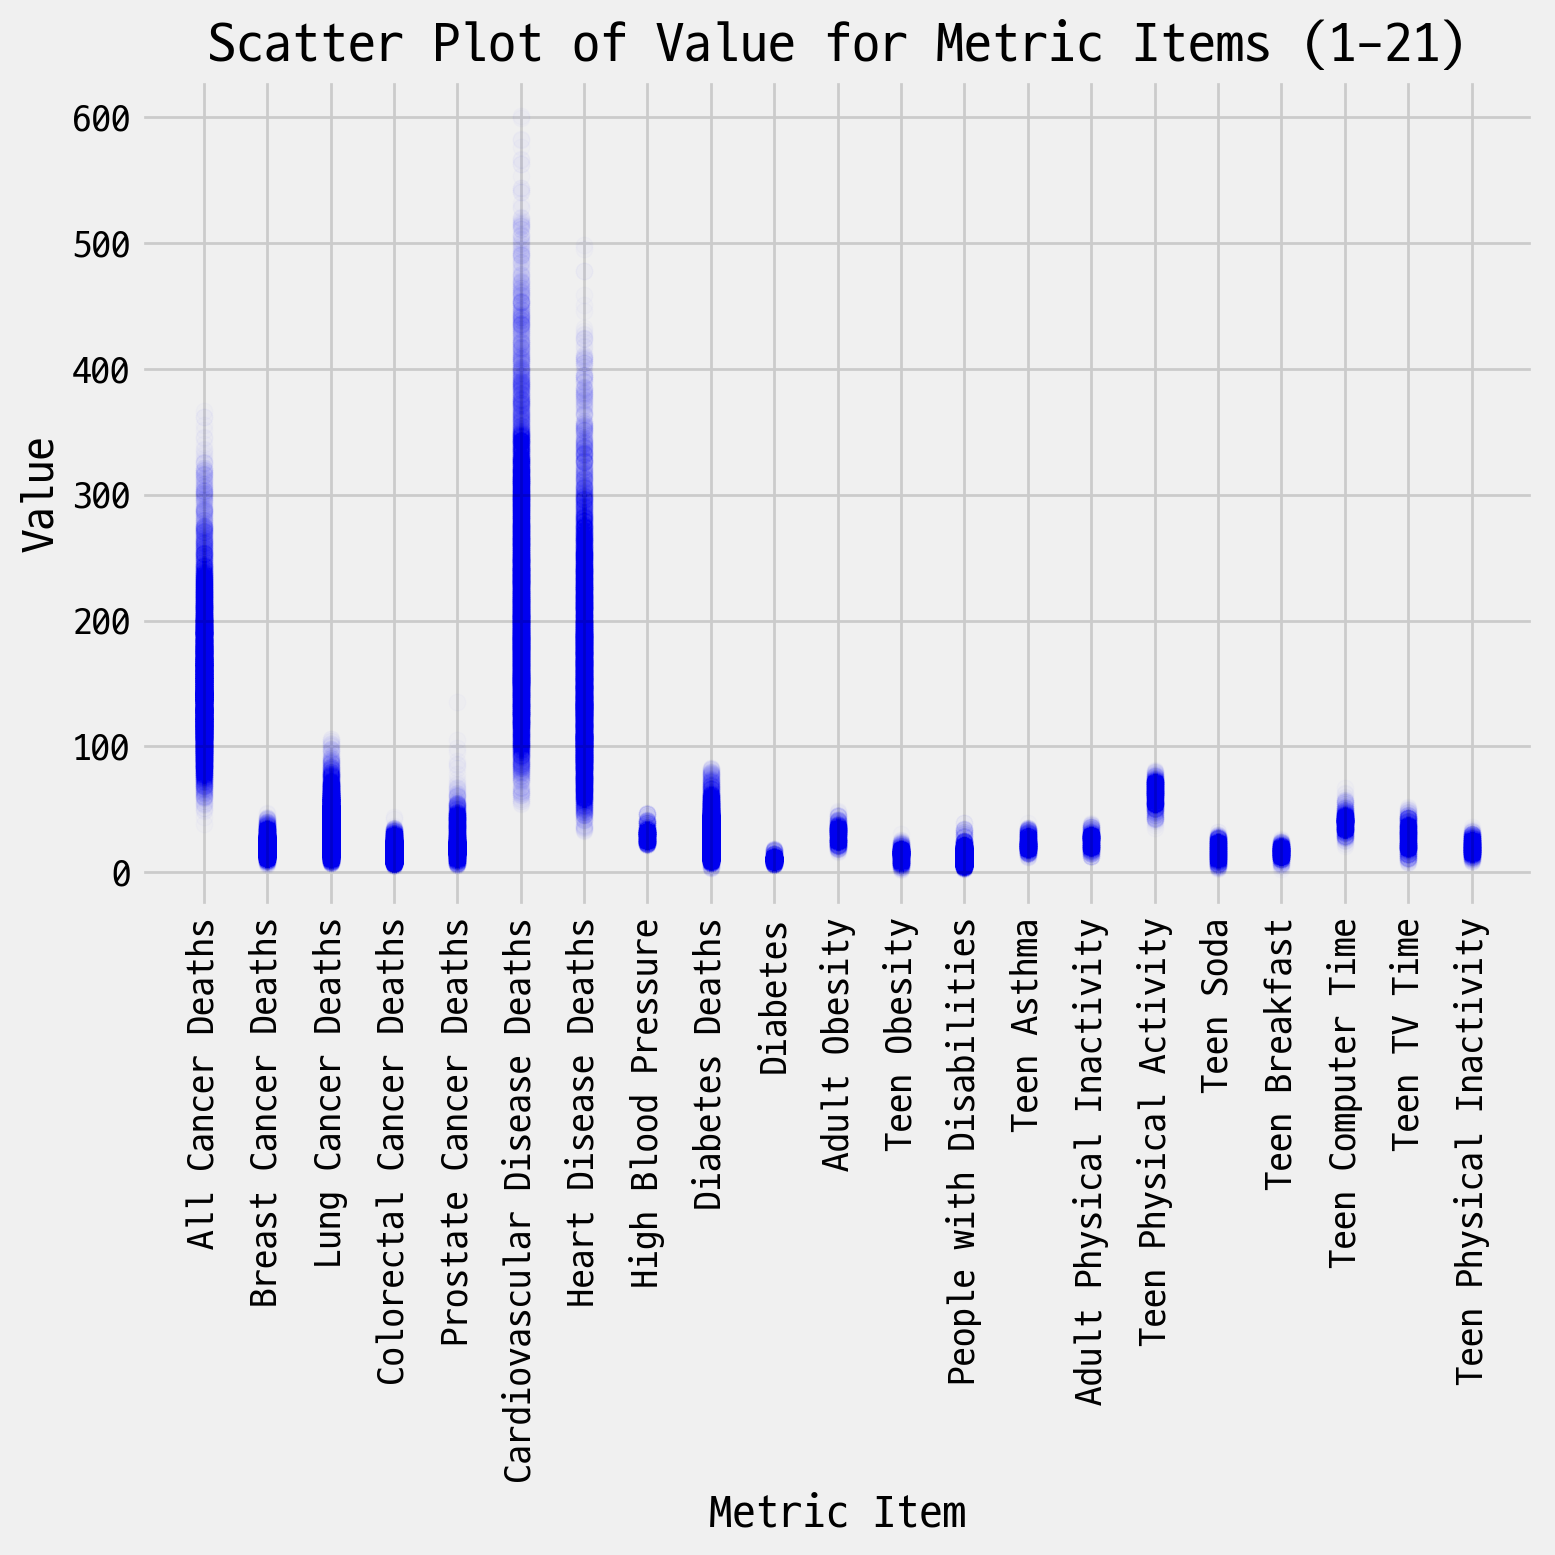

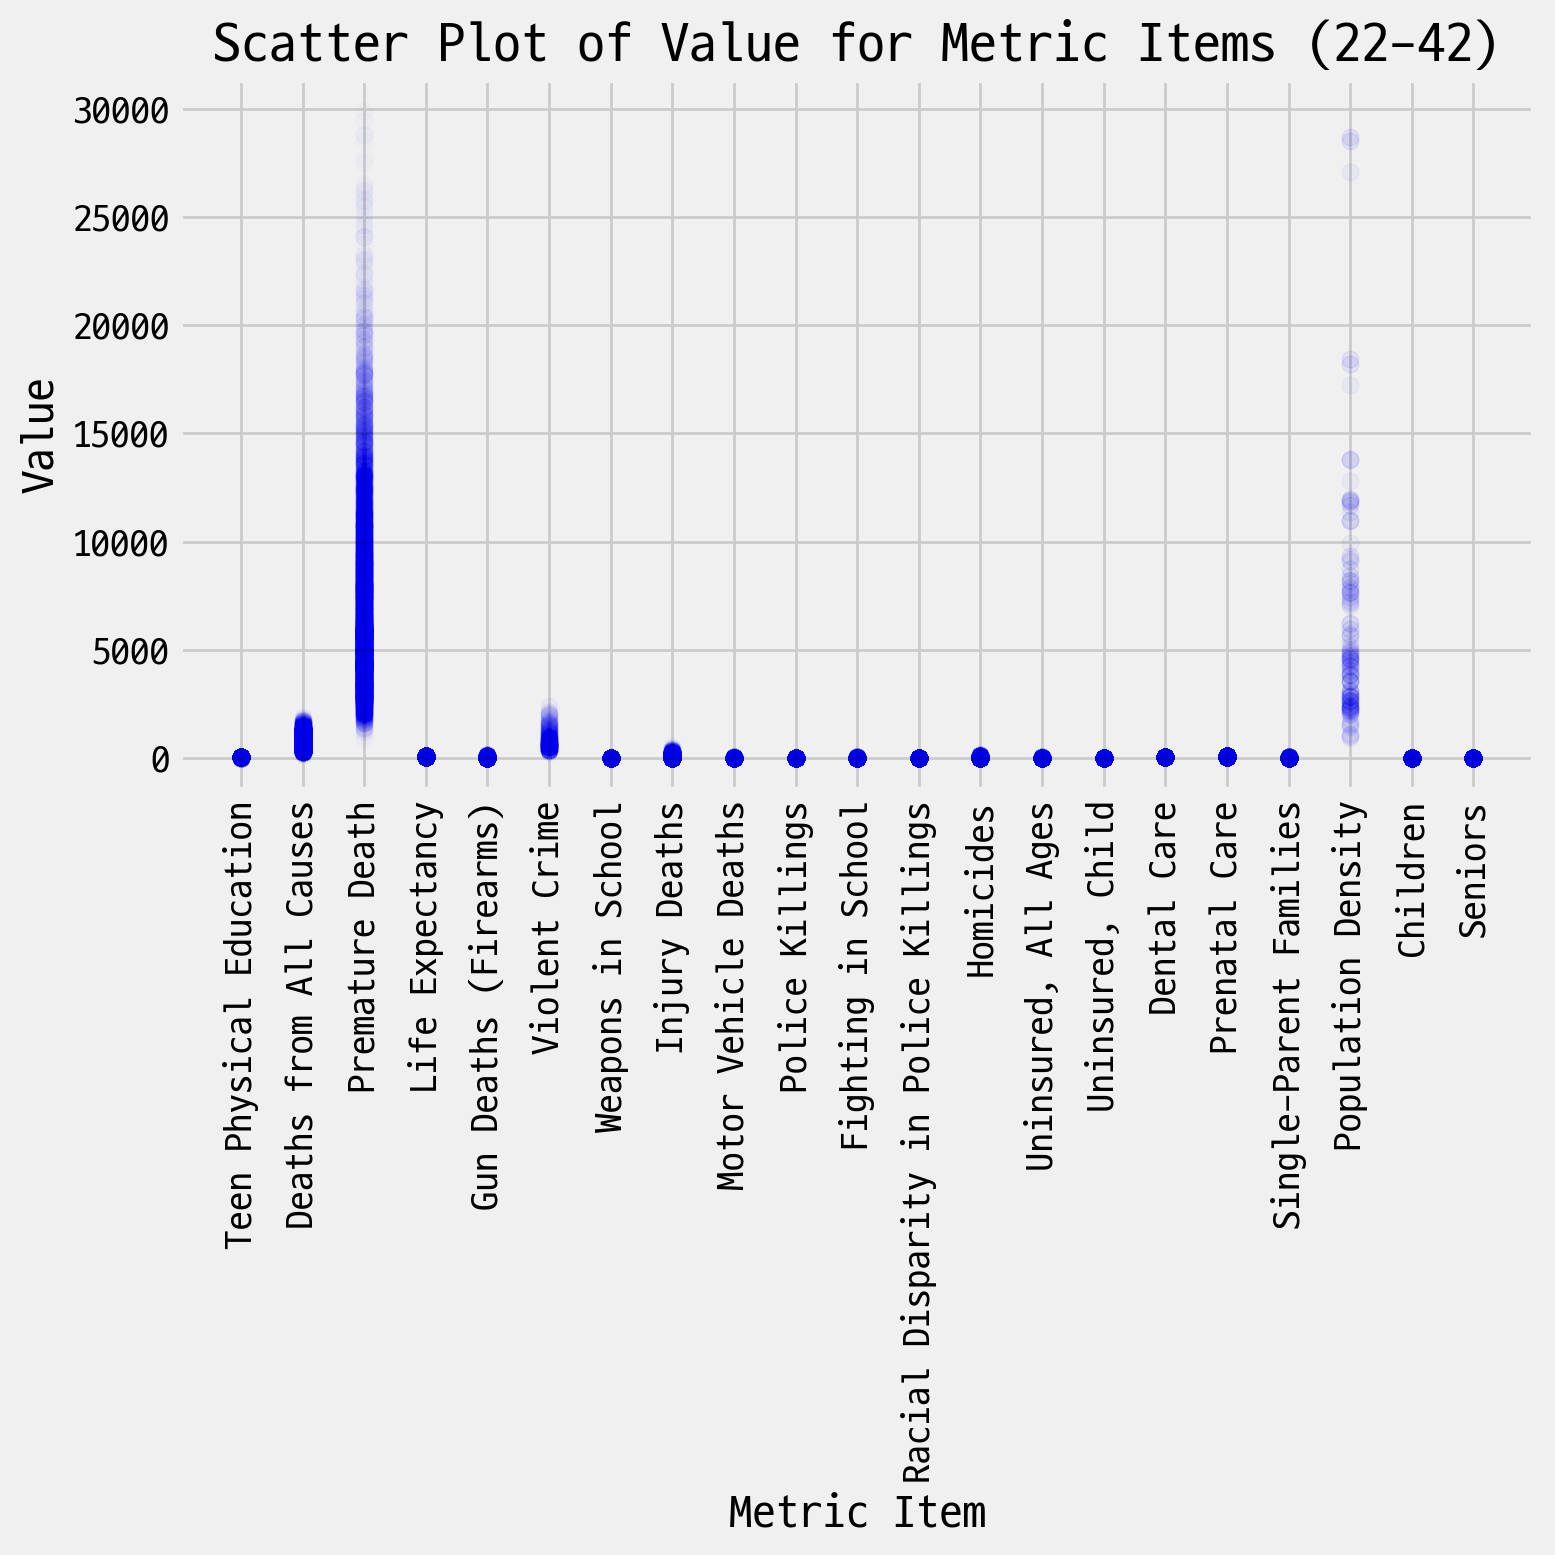

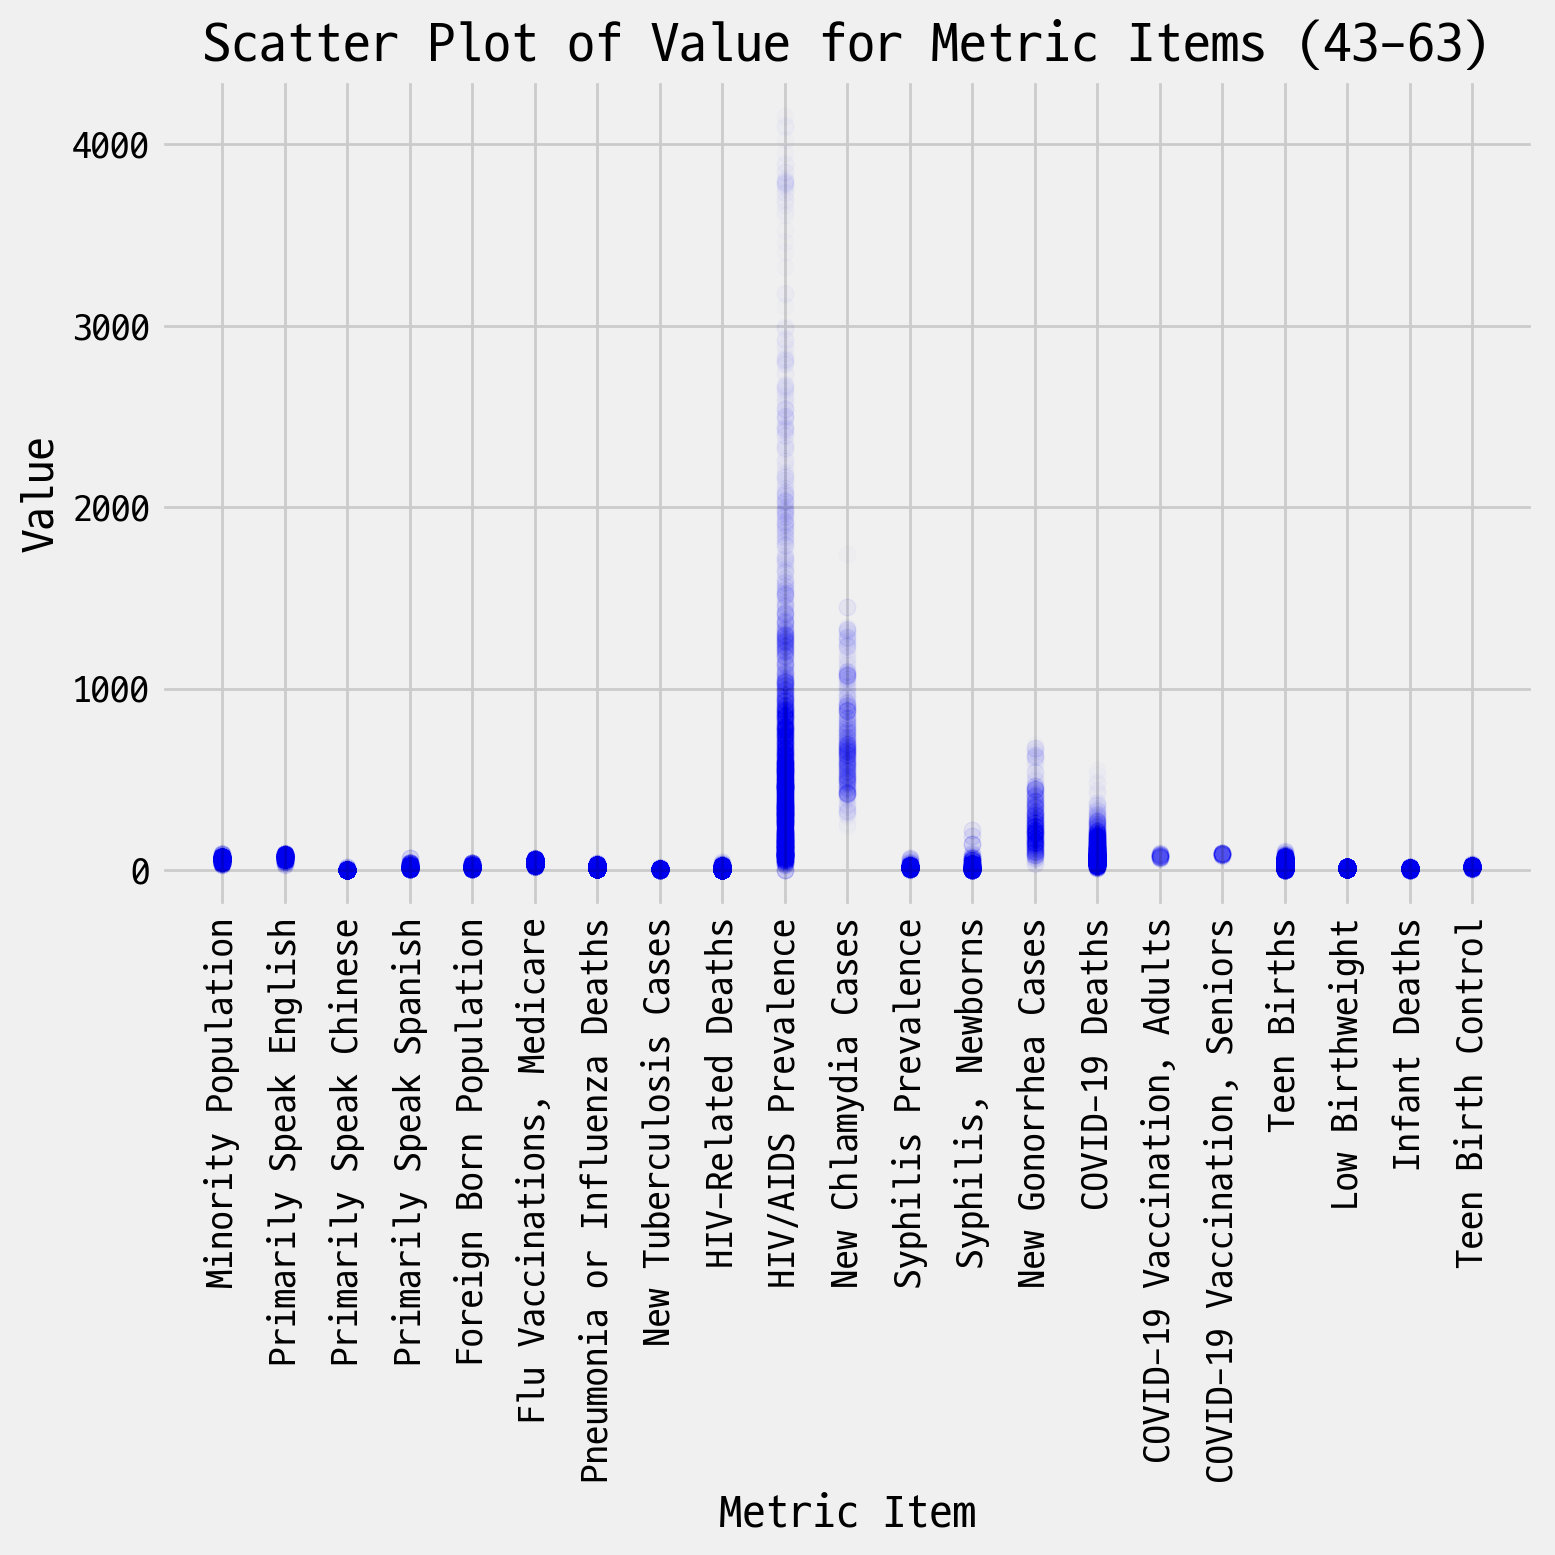

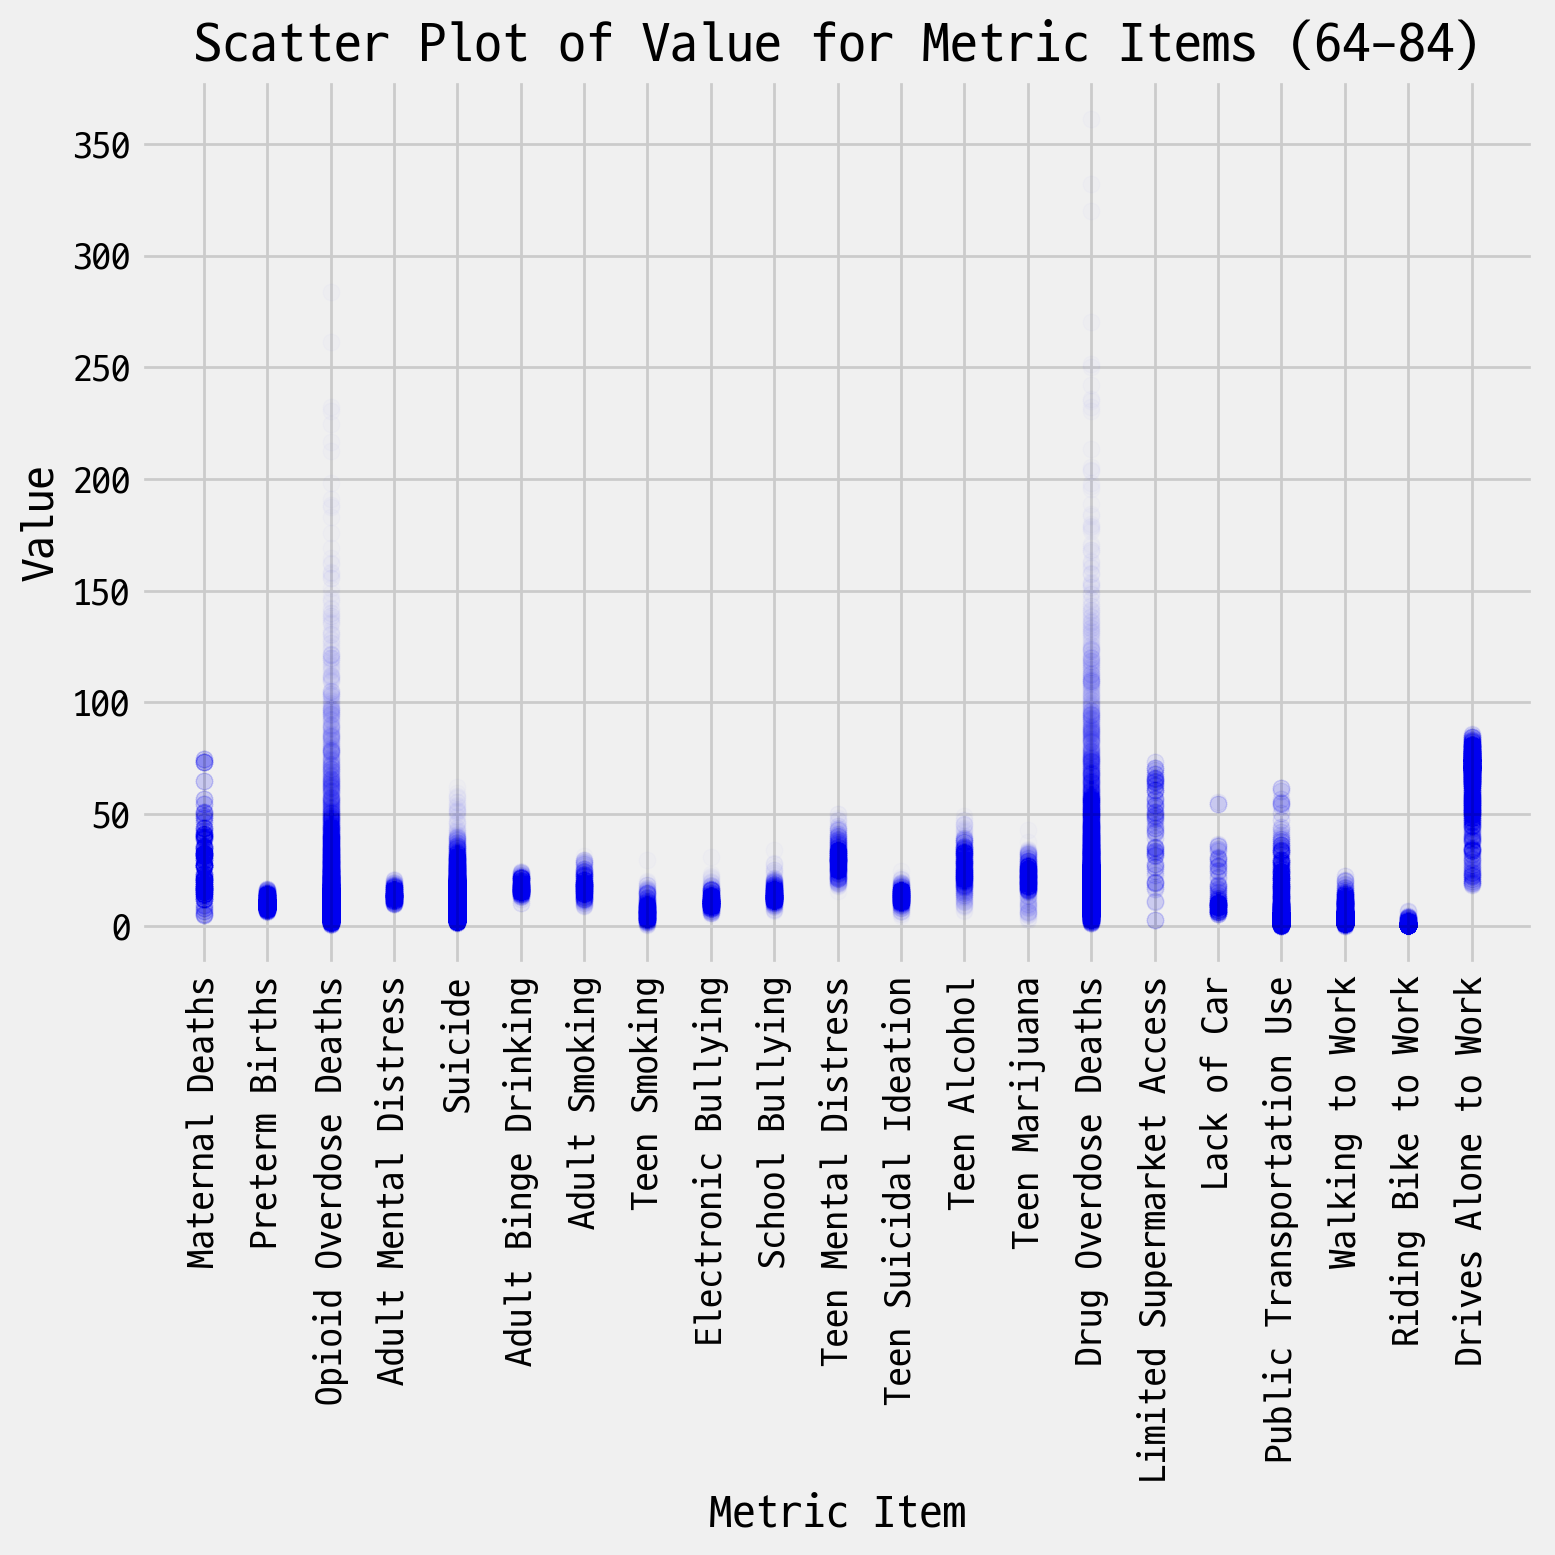

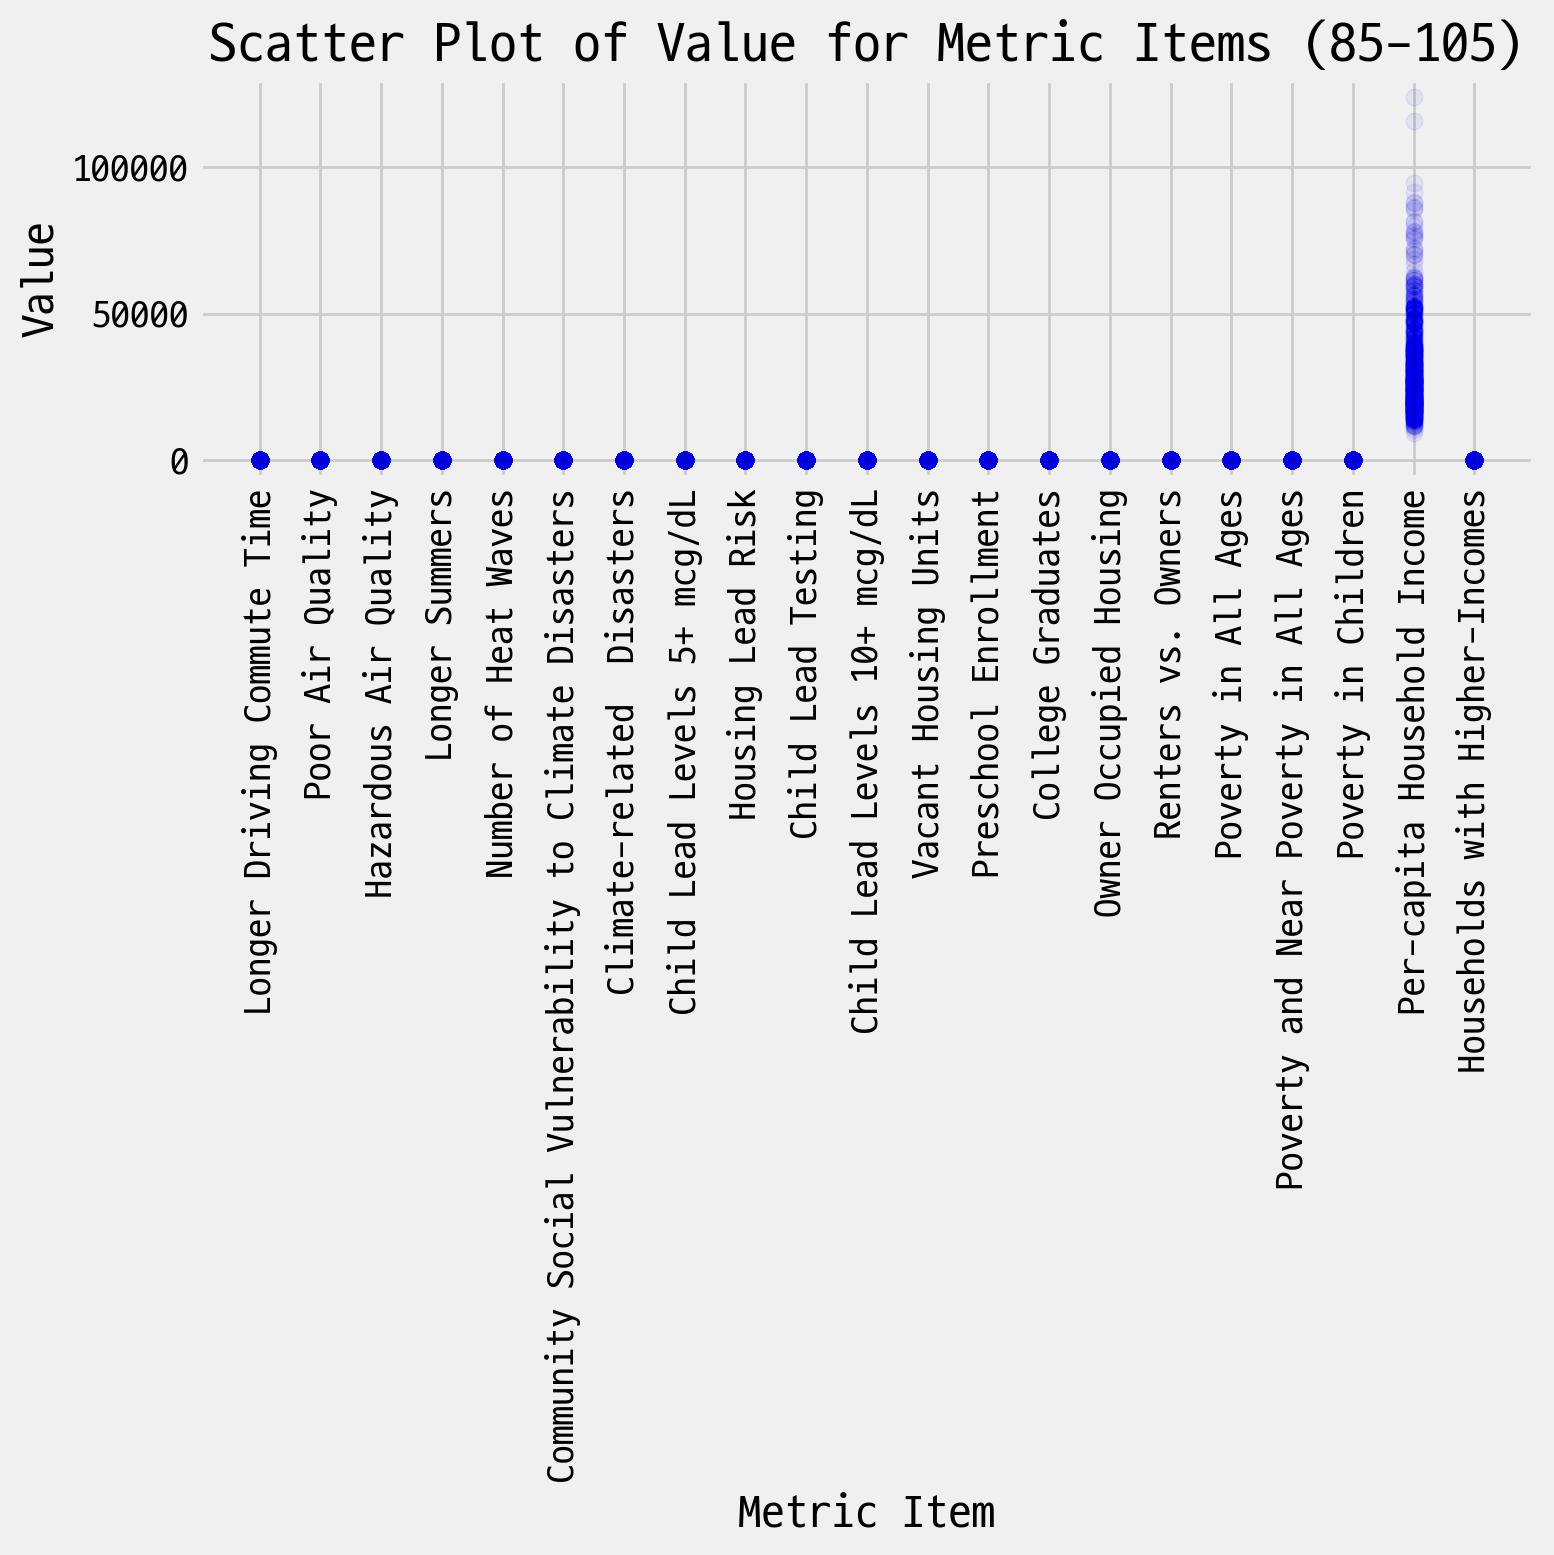

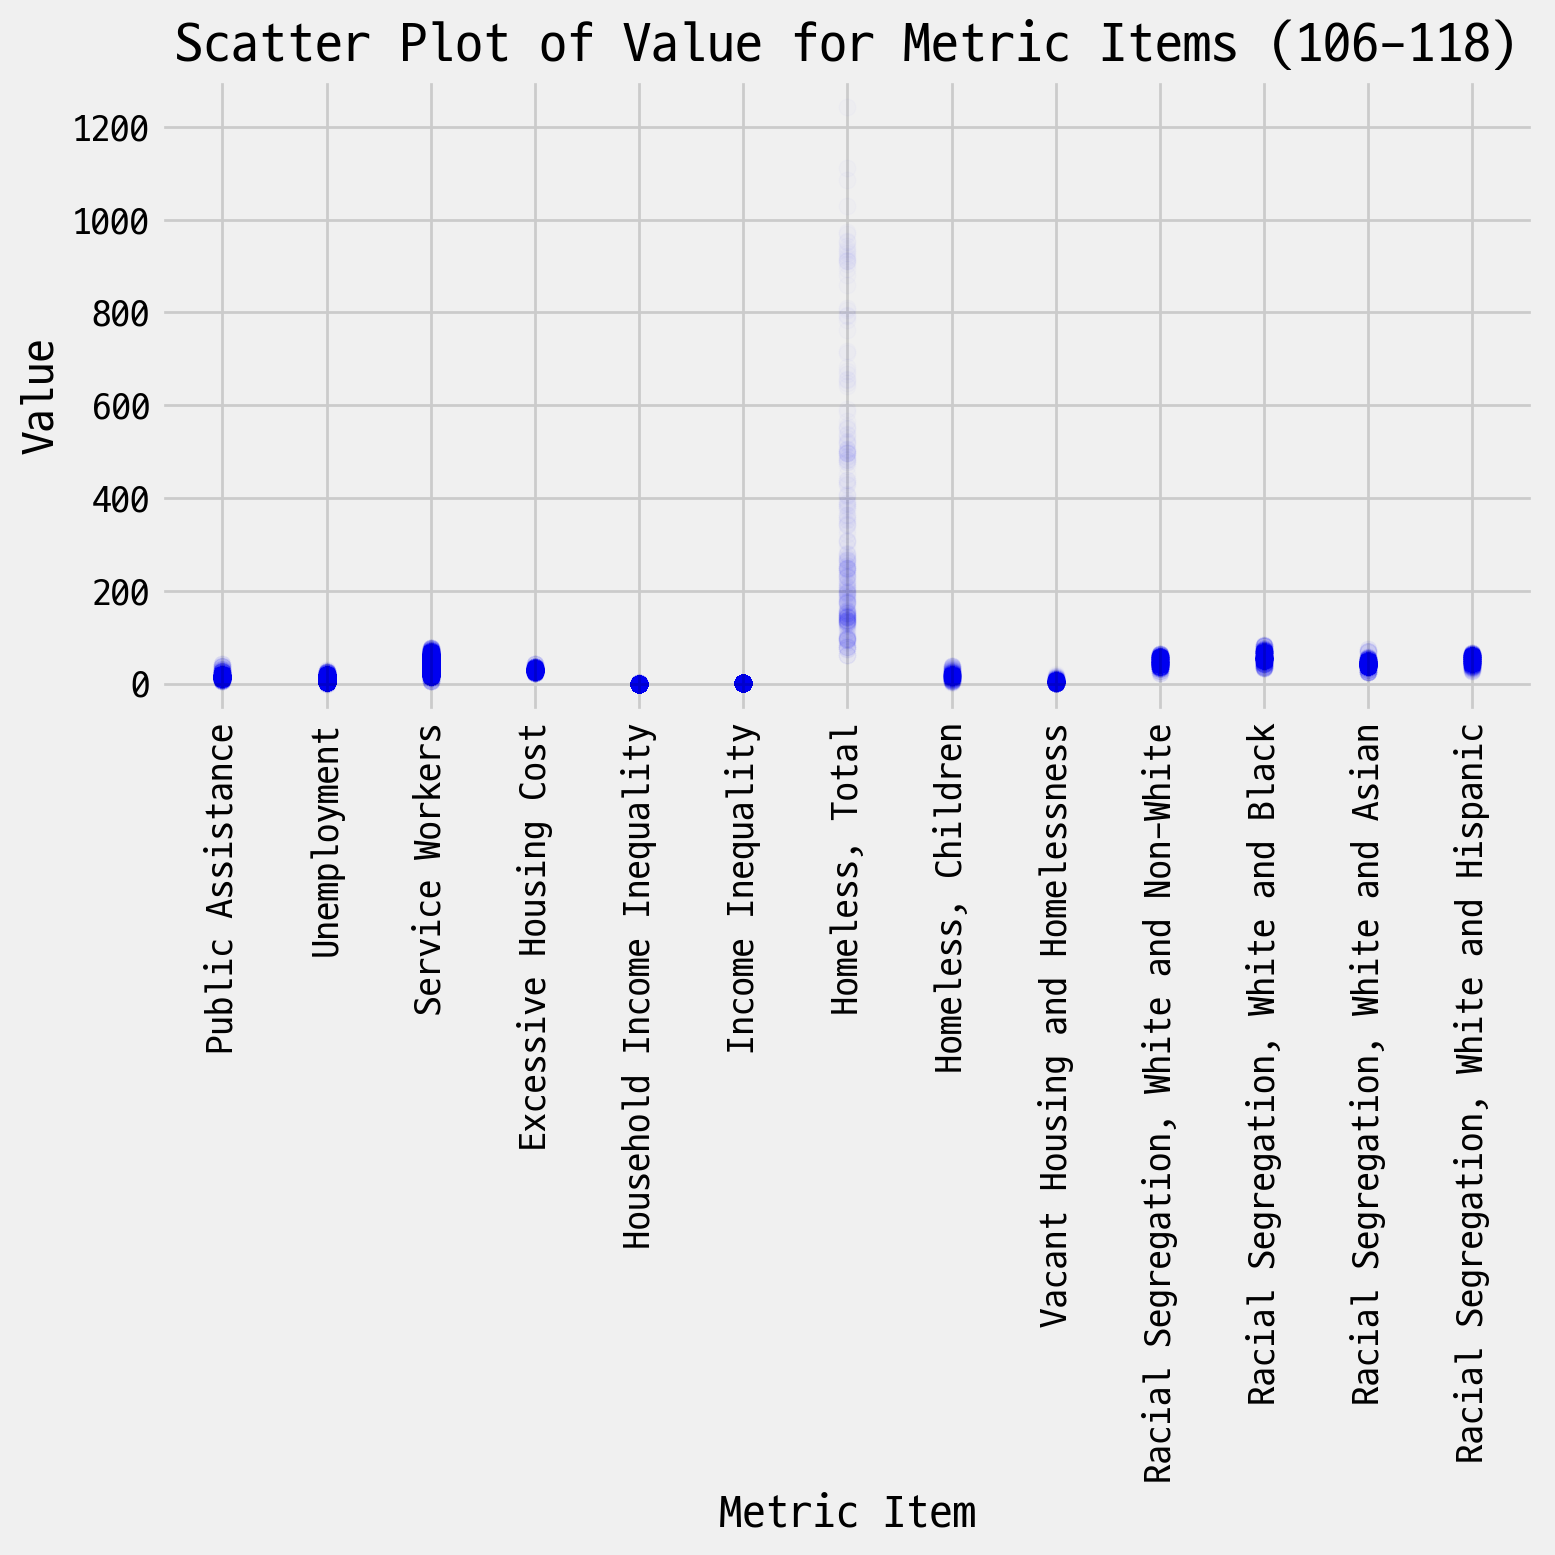

In [11]:
# 결측치가 60% 이상인 컬럼을 제거
threshold = 0.6
df_cleaned = df.loc[:, df.isnull().mean() < threshold]

# 데이터프레임의 수치형 컬럼 선택
numerical_columns = df_cleaned.select_dtypes(include='number').columns

# 결측치가 있는 행을 삭제
#df_cleaned = df_cleaned.dropna(subset=[value_column])

# metric_item_label의 고유한 값들
unique_metric_items = df_cleaned['metric_item_label'].unique()

# 고유한 값들을 21개씩 끊어서 시각화
for i in range(0, len(unique_metric_items), 21):
    chunk = unique_metric_items[i:i+21]
    chunk_data = df_cleaned[df_cleaned['metric_item_label'].isin(chunk)]
    
    plt.figure(figsize=(8, 8))
    plt.scatter(chunk_data['metric_item_label'], chunk_data['value'], alpha=0.01, color='blue')
    plt.xlabel('Metric Item')
    plt.ylabel('Value')
    plt.title(f'Scatter Plot of Value for Metric Items ({i+1}-{min(i+21, len(unique_metric_items))})')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [12]:
df_check_missing = df[['metric_item_label','value']]
label_filled_ratio = pd.pivot_table(df_check_missing,index='metric_item_label',aggfunc=len)
label_filled_ratio['ratio'] =label_filled_ratio['value']/7280*100
label_filled_ratio.sort_values(by=['value'],ascending=False)


value      ratio
metric_item_label                                
Premature Death                   6825  93.750000
Injury Deaths                     6405  87.980769
Deaths from All Causes            6244  85.769231
All Cancer Deaths                 6233  85.618132
Cardiovascular Disease Deaths     6195  85.096154
...                                ...        ...
Vacant Housing and Homelessness    266   3.653846
Homeless, Total                    266   3.653846
Homeless, Children                 256   3.516484
COVID-19 Vaccination, Seniors       70   0.961538
COVID-19 Vaccination, Adults        70   0.961538

[118 rows x 2 columns]

In [13]:
cond = df['metric_item_label'] == 'Injury Deaths'
cond1 = df['geo_label_city'] == 'U.S. Total'
df_injury = df[cond&(~cond1)]
len(df_injury)

6392

#### 'metric_cat_item_yaxis_label' 컬럼을 기준으로 라벨을 분류 

In [14]:
# 'metric_cat_item_yaxis_label' 컬럼을 기준으로 데이터를 정렬
sorted_data_by_metric = df.sort_values(by='metric_cat_item_yaxis_label')

# 정렬된 데이터를 'metric_cat_item_yaxis_label' 컬럼의 요소별로 그룹화
grouped_by_unit = sorted_data_by_metric.groupby(by='metric_cat_item_yaxis_label')['metric_label'].apply(set)
print(len(grouped_by_unit))
grouped_by_unit

19


metric_cat_item_yaxis_label
Cases per 100,000                               {Sexually Transmitted Disease | New Chlamydia ...
Cases per 100,000 live births                   {Sexually Transmitted Disease | Syphilis, Newb...
Days                                            {Heat and Disasters | Climate-related  Disaste...
Dollars                                                    {Income | Per-capita Household Income}
Incidents per 100,000                           {Crime Incidents | Violent Crime, Crime Incide...
Lower is better                                 {Racial Segregation Indices | Racial Segregati...
Number                                                {Heat and Disasters | Number of Heat Waves}
Per 1,000                                                                {Deaths | Infant Deaths}
Per 1,000 females aged 15-19                                               {Births | Teen Births}
Per 1,000,000                                   {Deaths | Police Killings, Deaths | Racial

In [15]:
type(grouped_by_unit)

pandas.core.series.Series

In [16]:
grouped_by_unit.apply(len)

metric_cat_item_yaxis_label
Cases per 100,000                                5
Cases per 100,000 live births                    1
Days                                             2
Dollars                                          1
Incidents per 100,000                            2
Lower is better                                  6
Number                                           1
Per 1,000                                        1
Per 1,000 females aged 15-19                     1
Per 1,000,000                                    2
Per 100,000                                     17
Per 100,000 females                              1
Per 100,000 males                                1
Percent                                         72
Persons per square mile                          1
Ratio                                            1
Vacant housing units per homeless population     1
Years                                            1
Years per 100,000 population aged <75            1
Nam

In [17]:
np.sum(grouped_by_unit.apply(len))

118

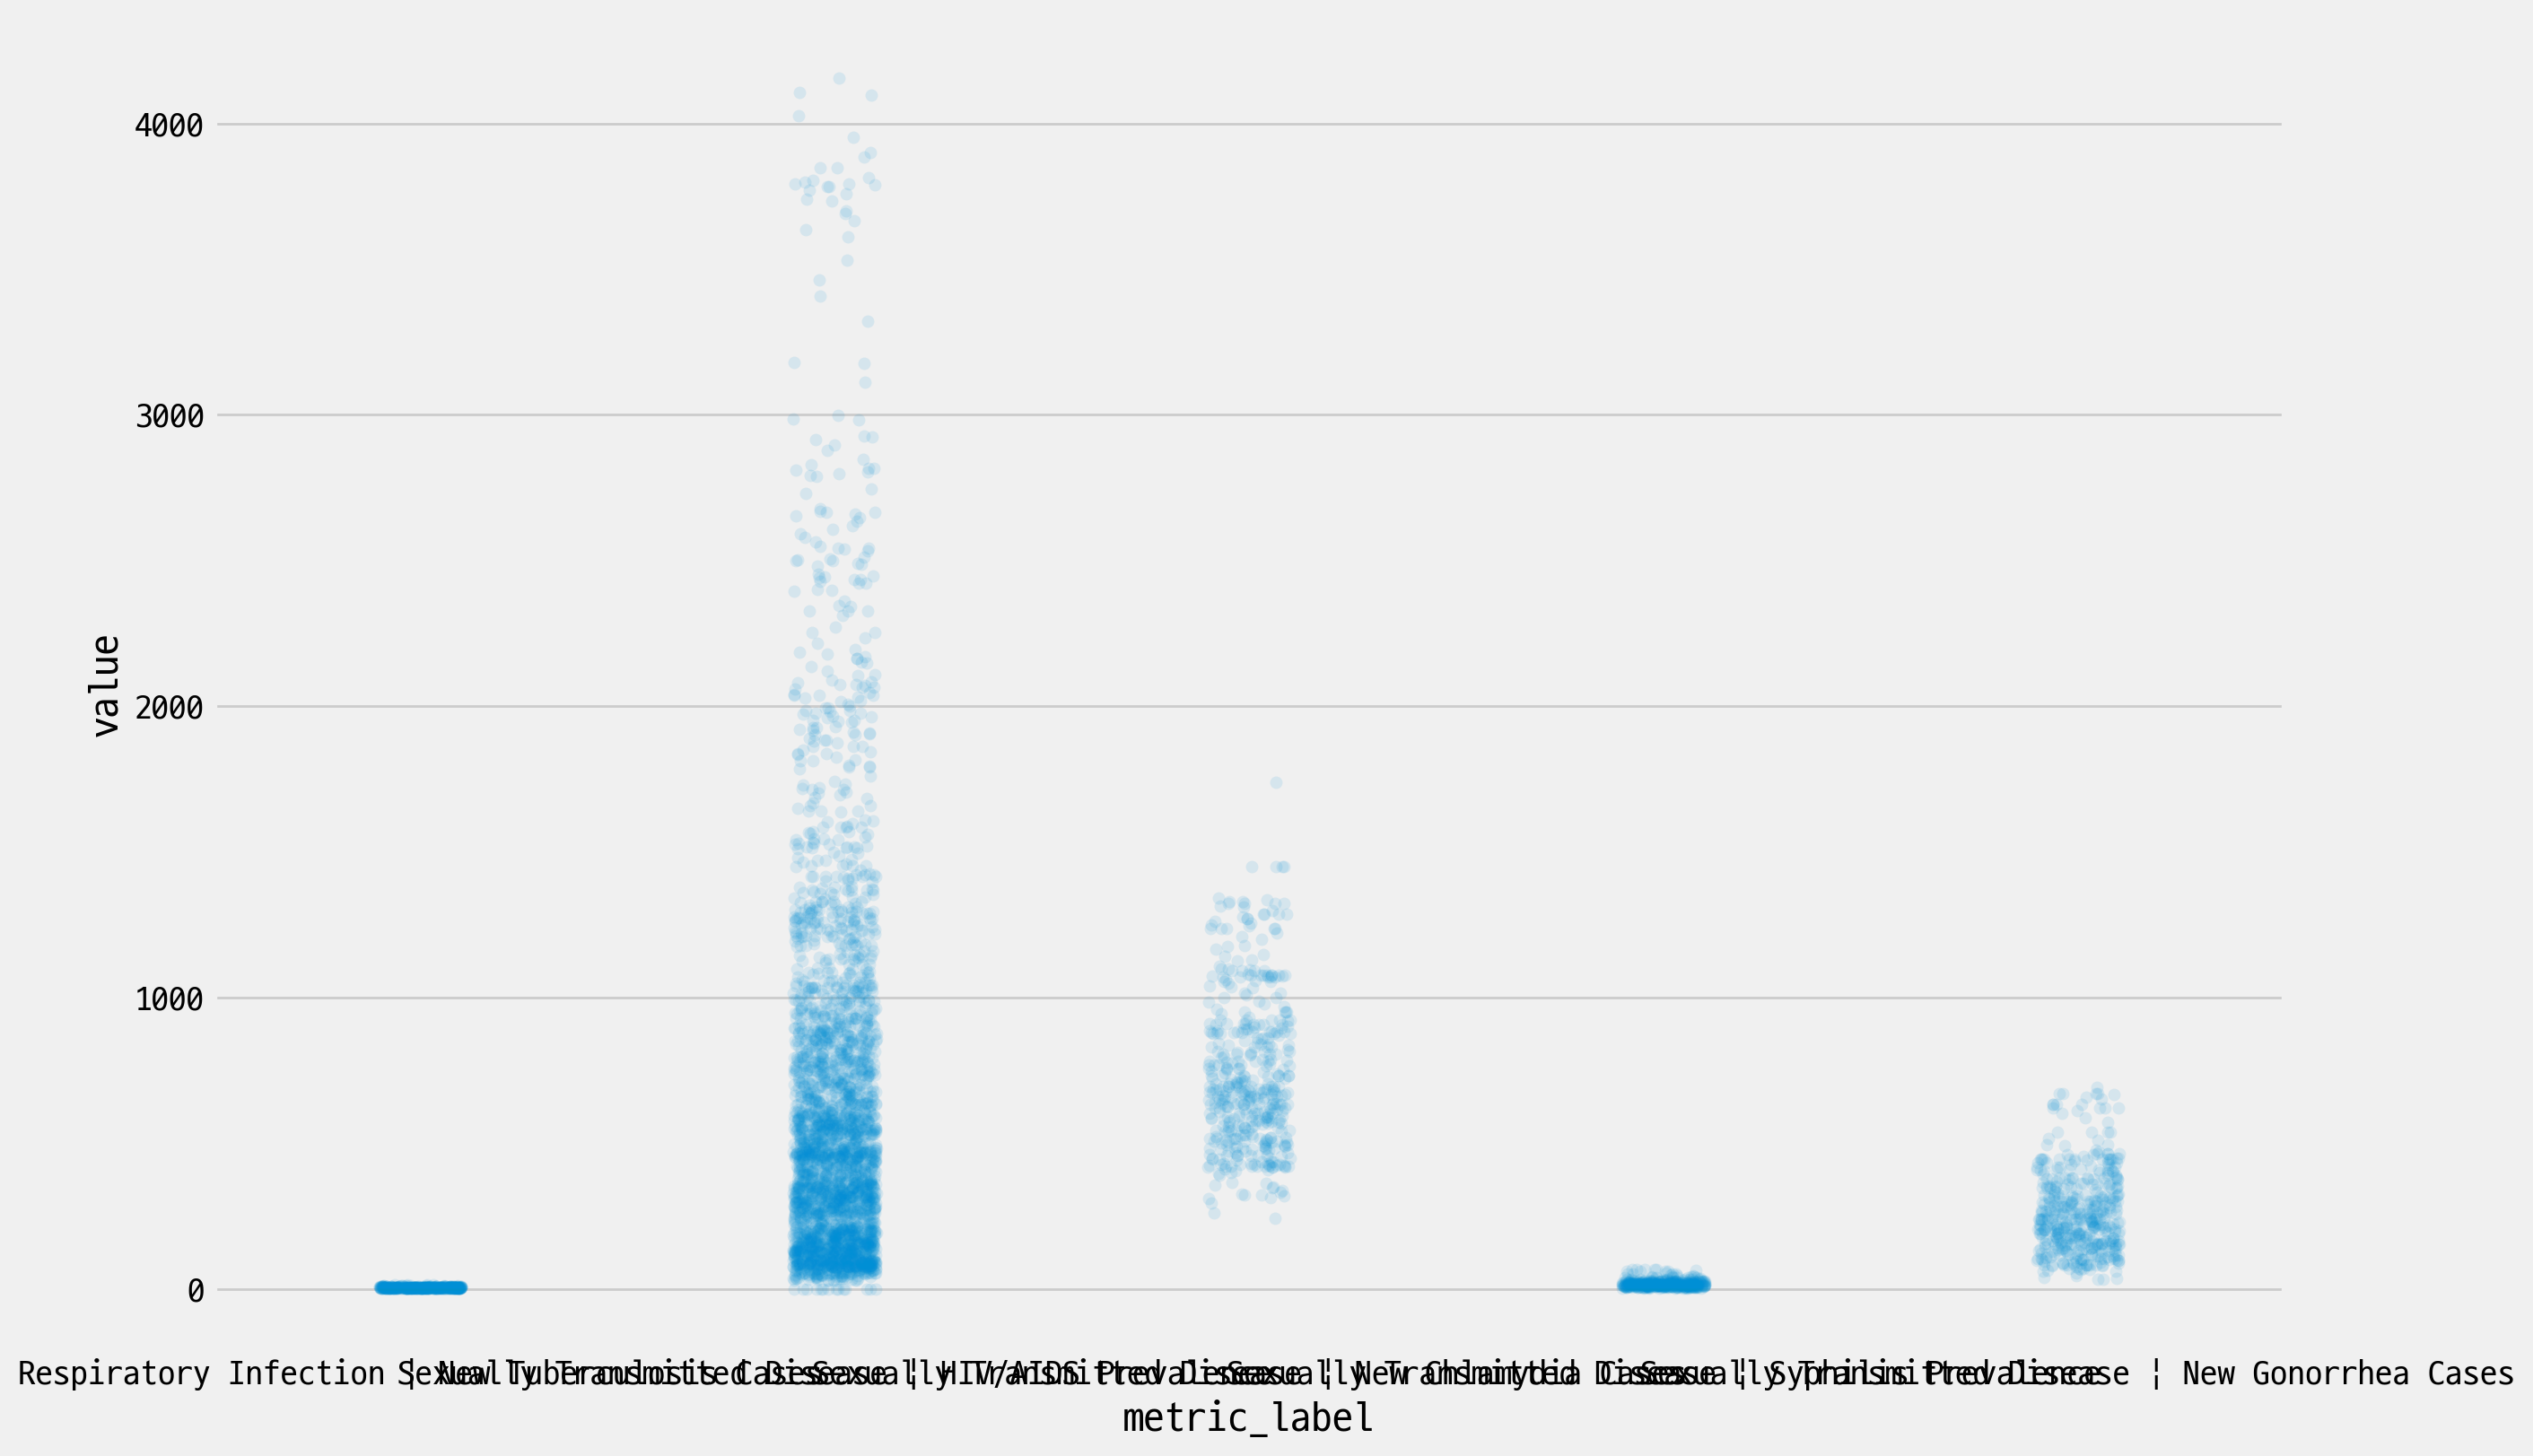

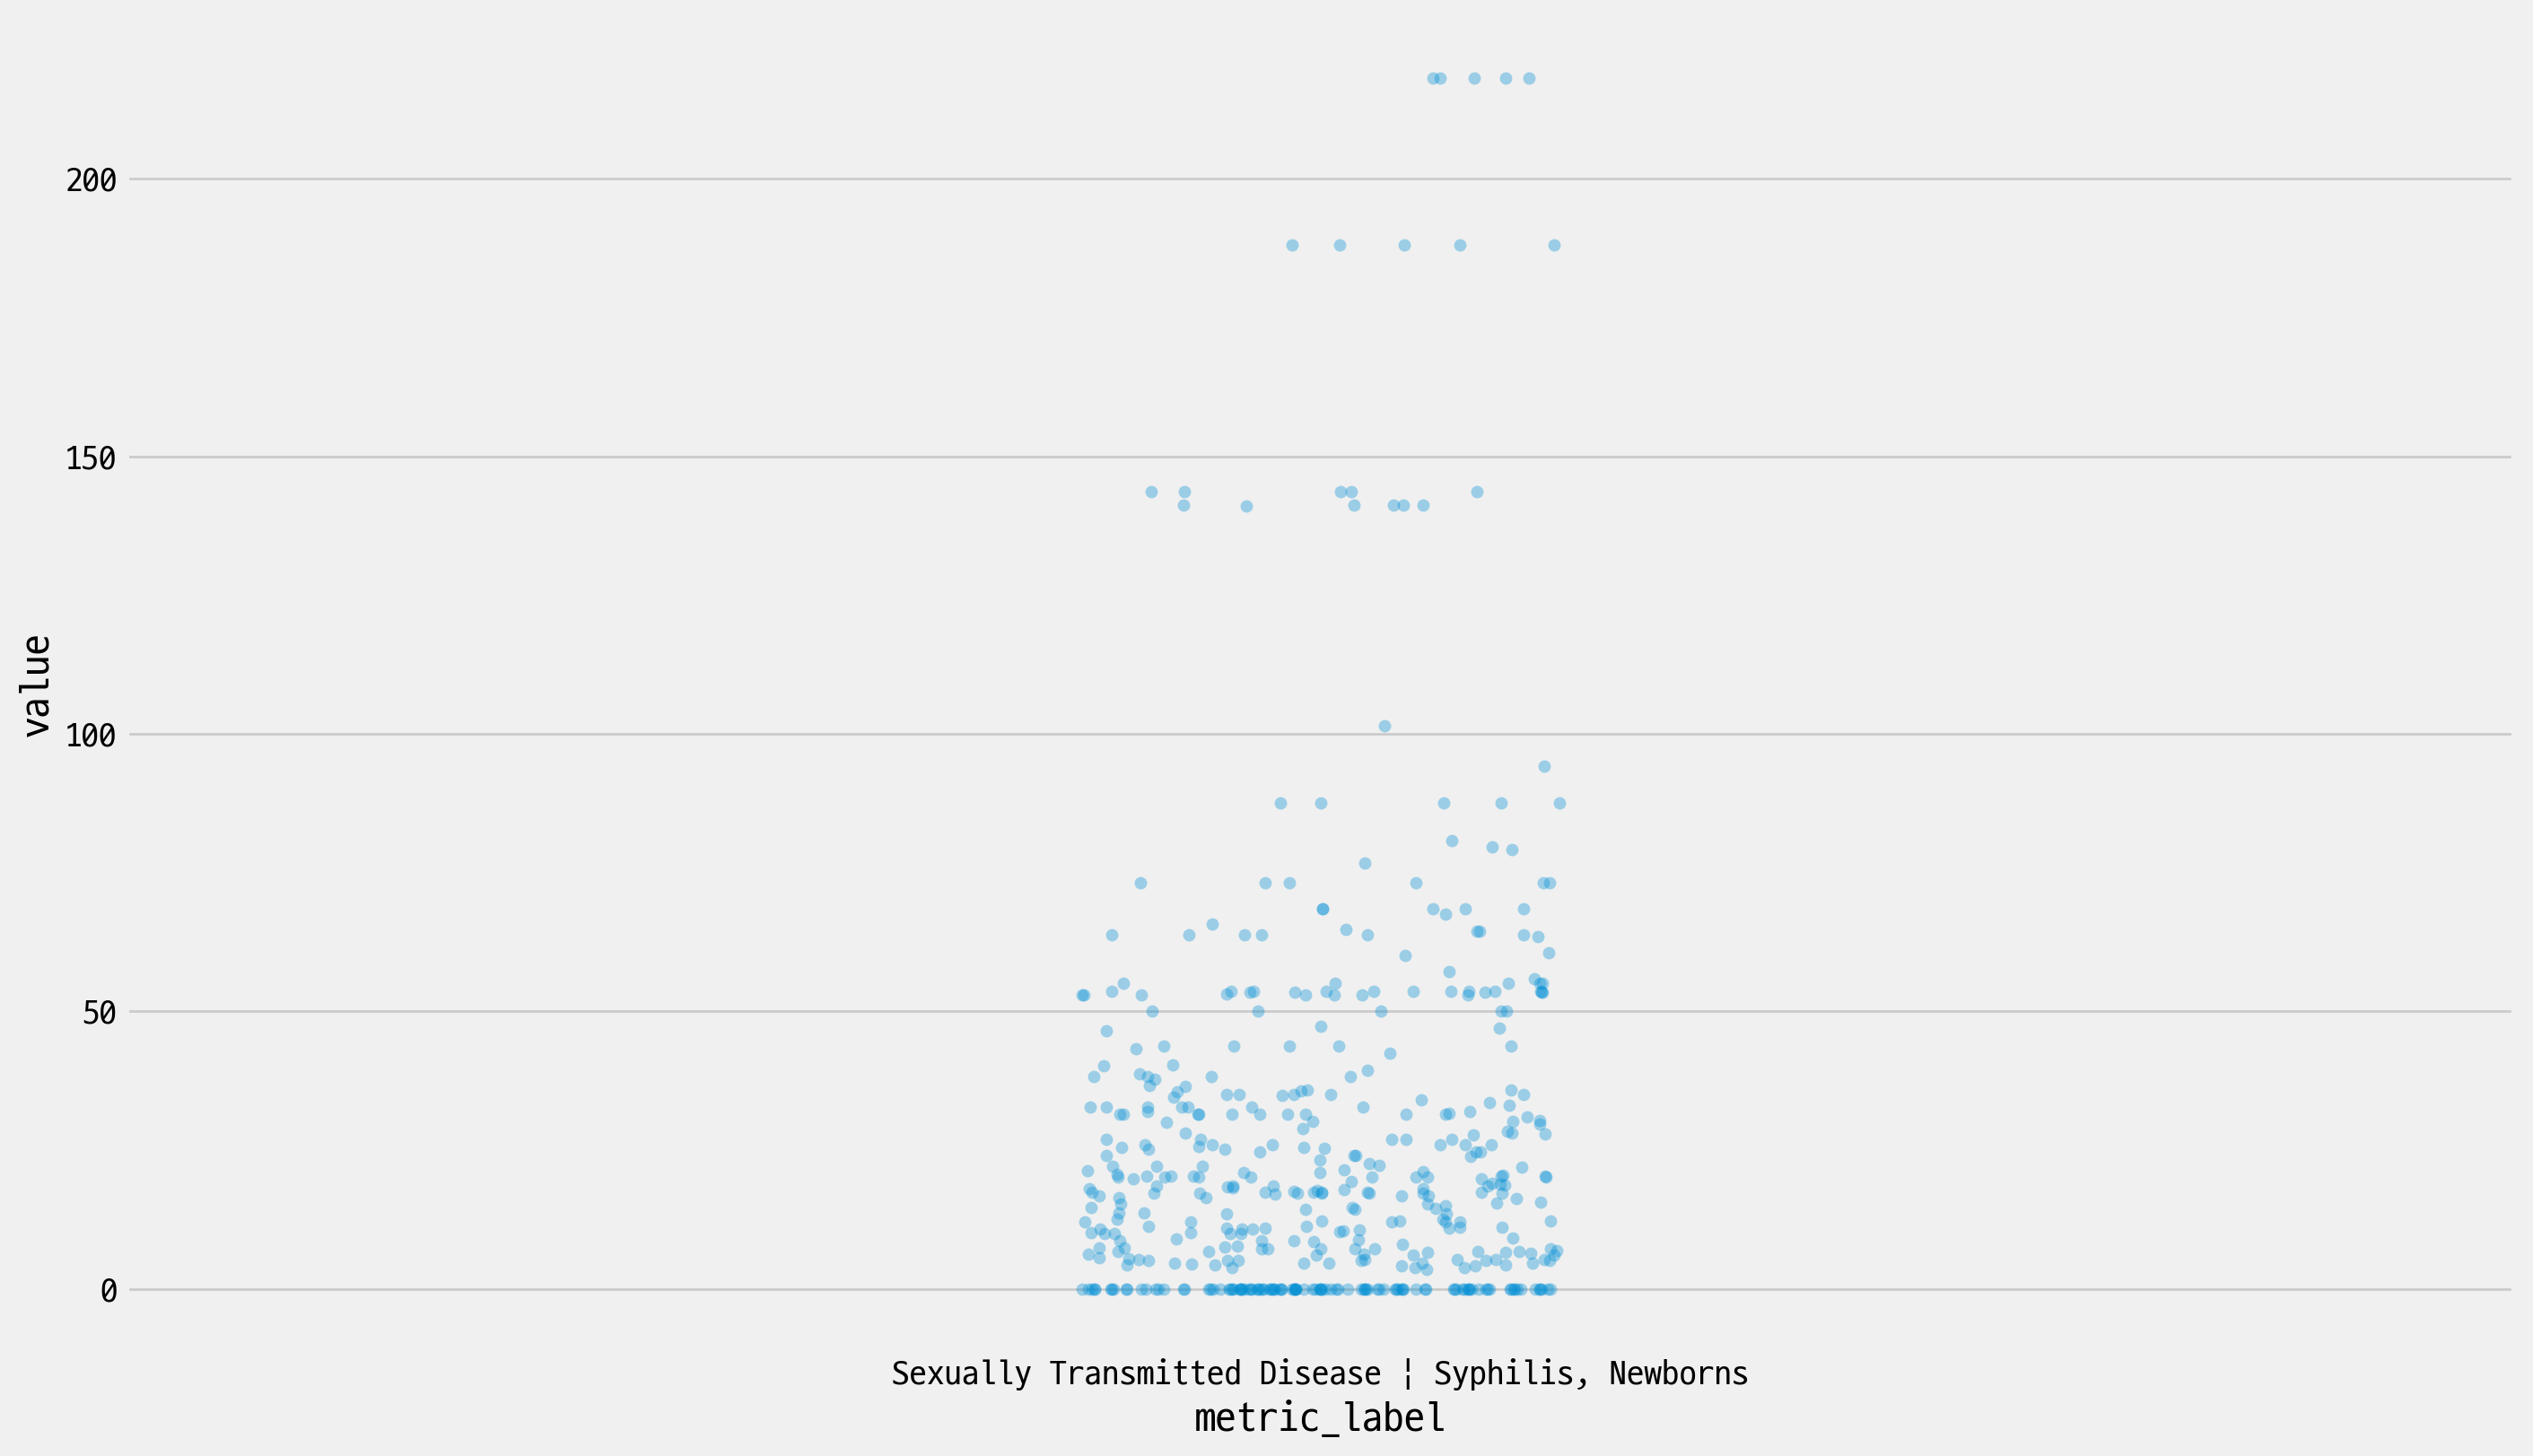

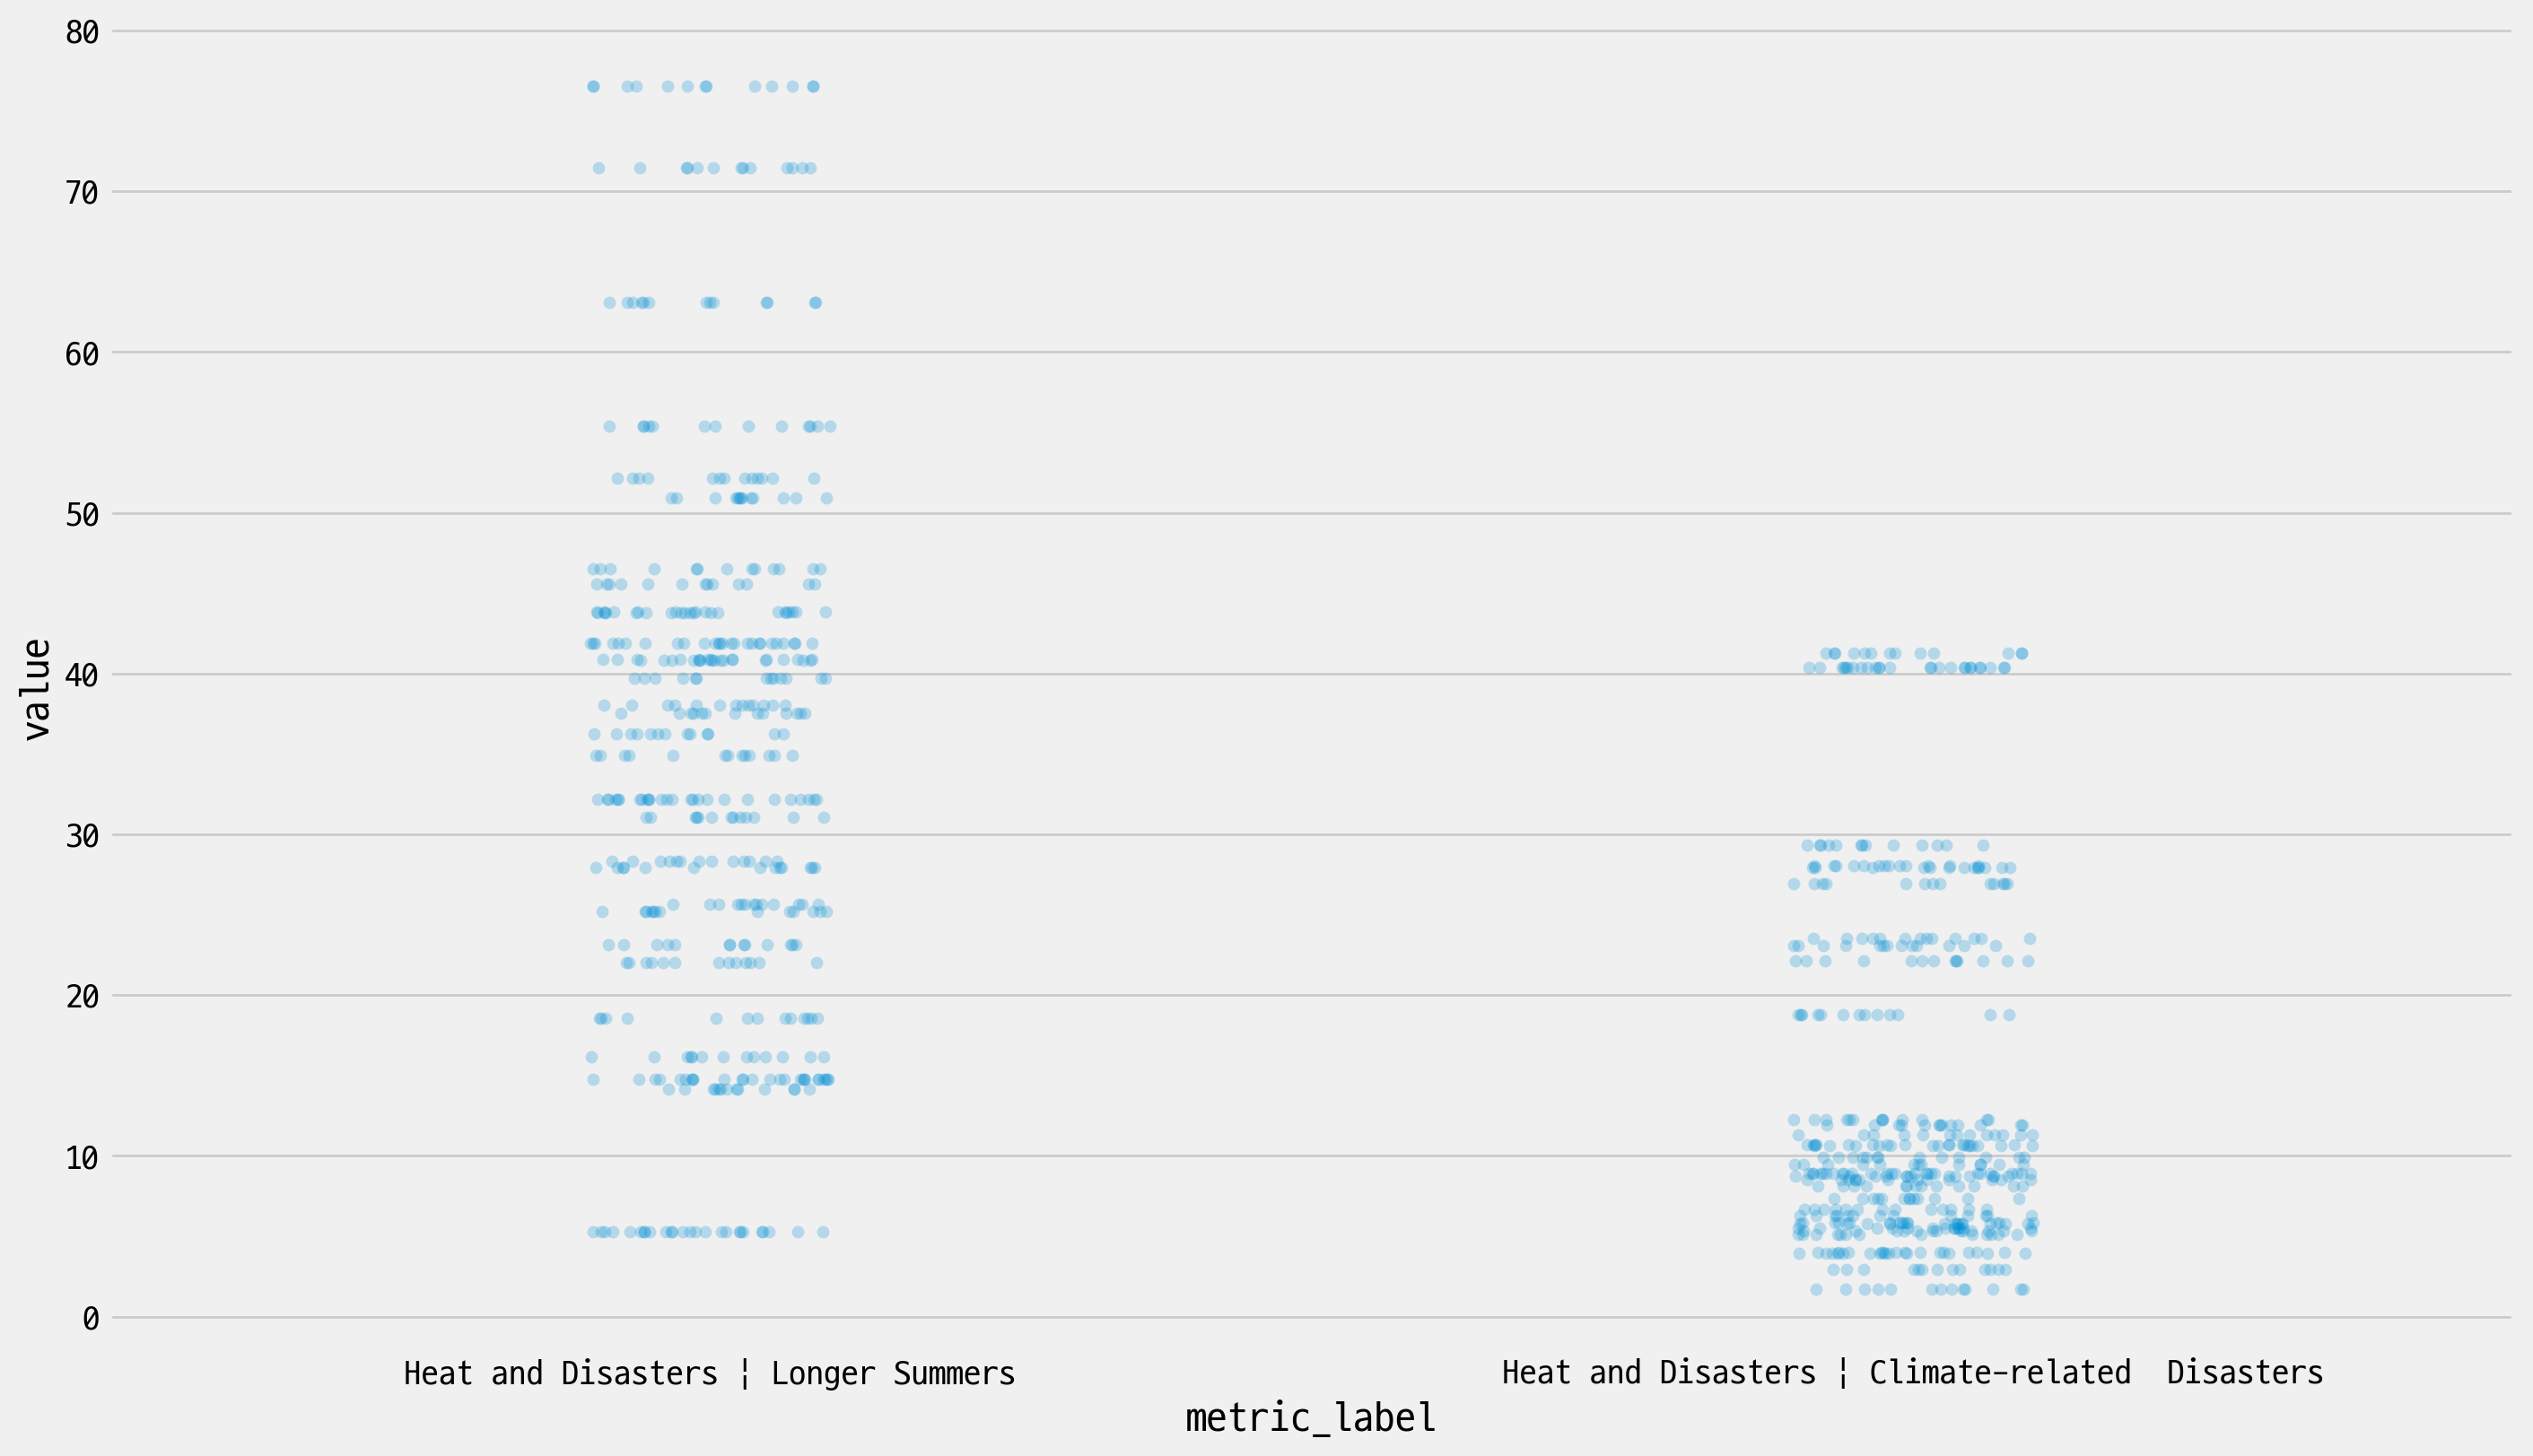

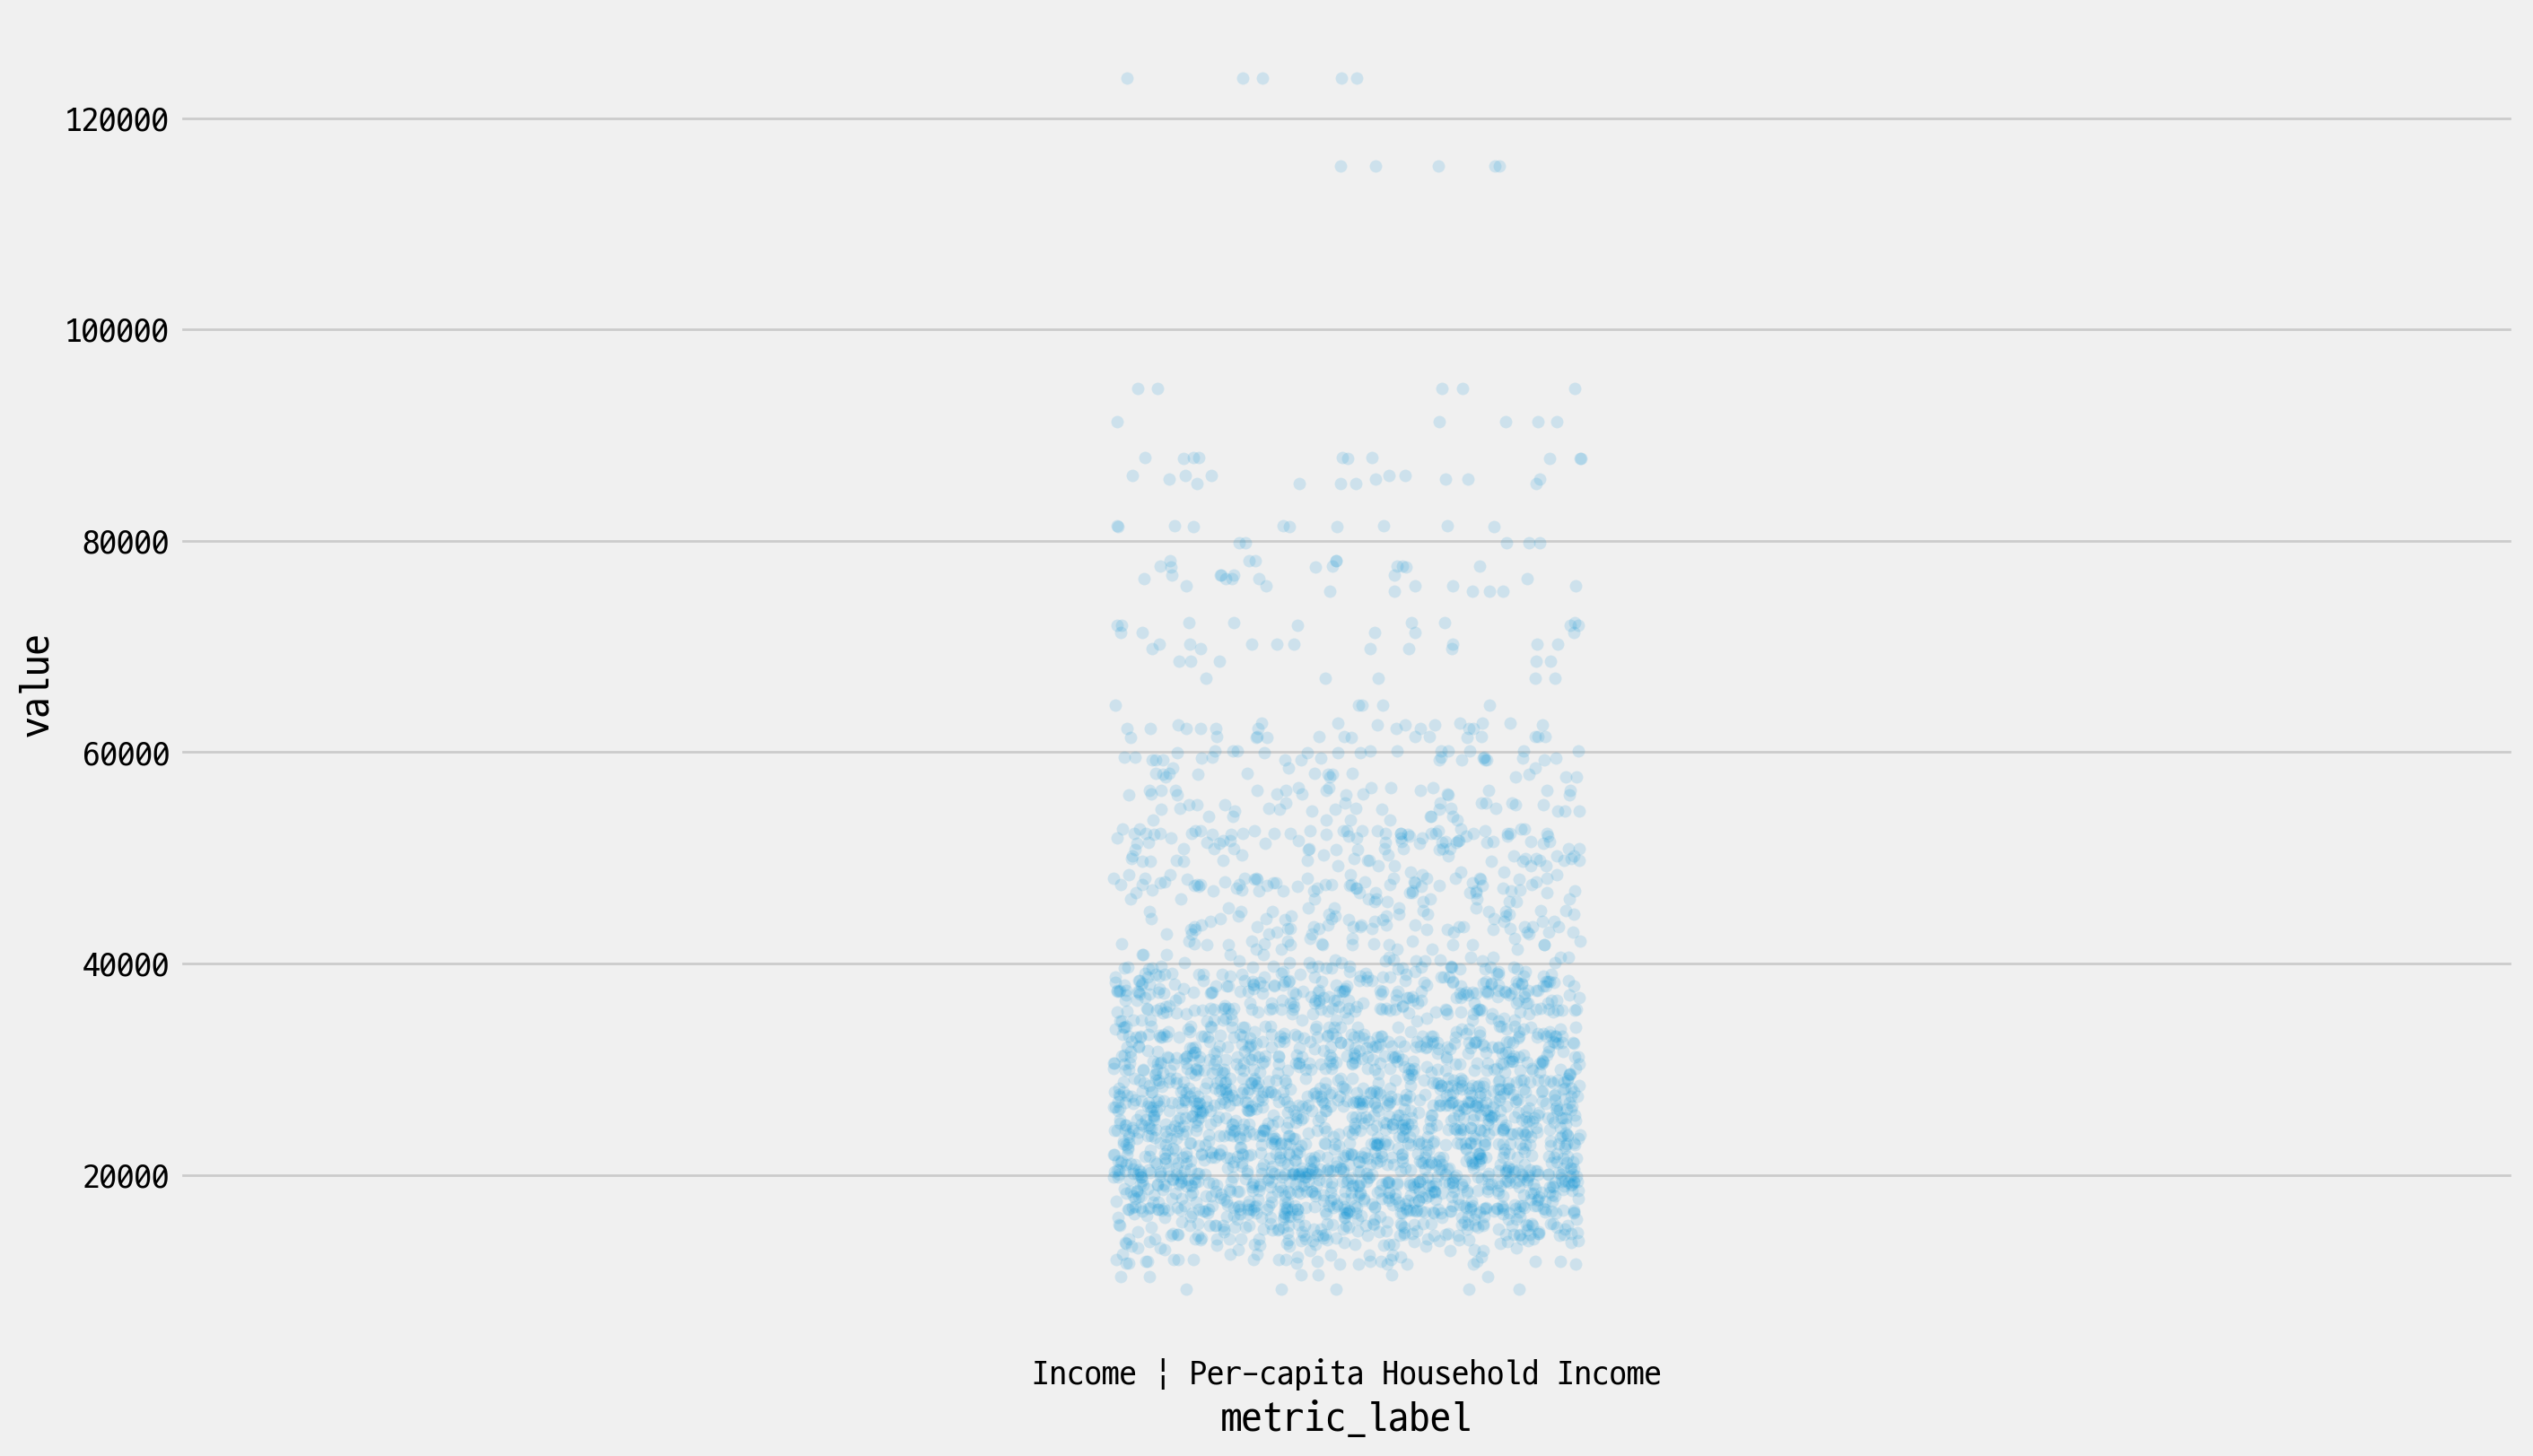

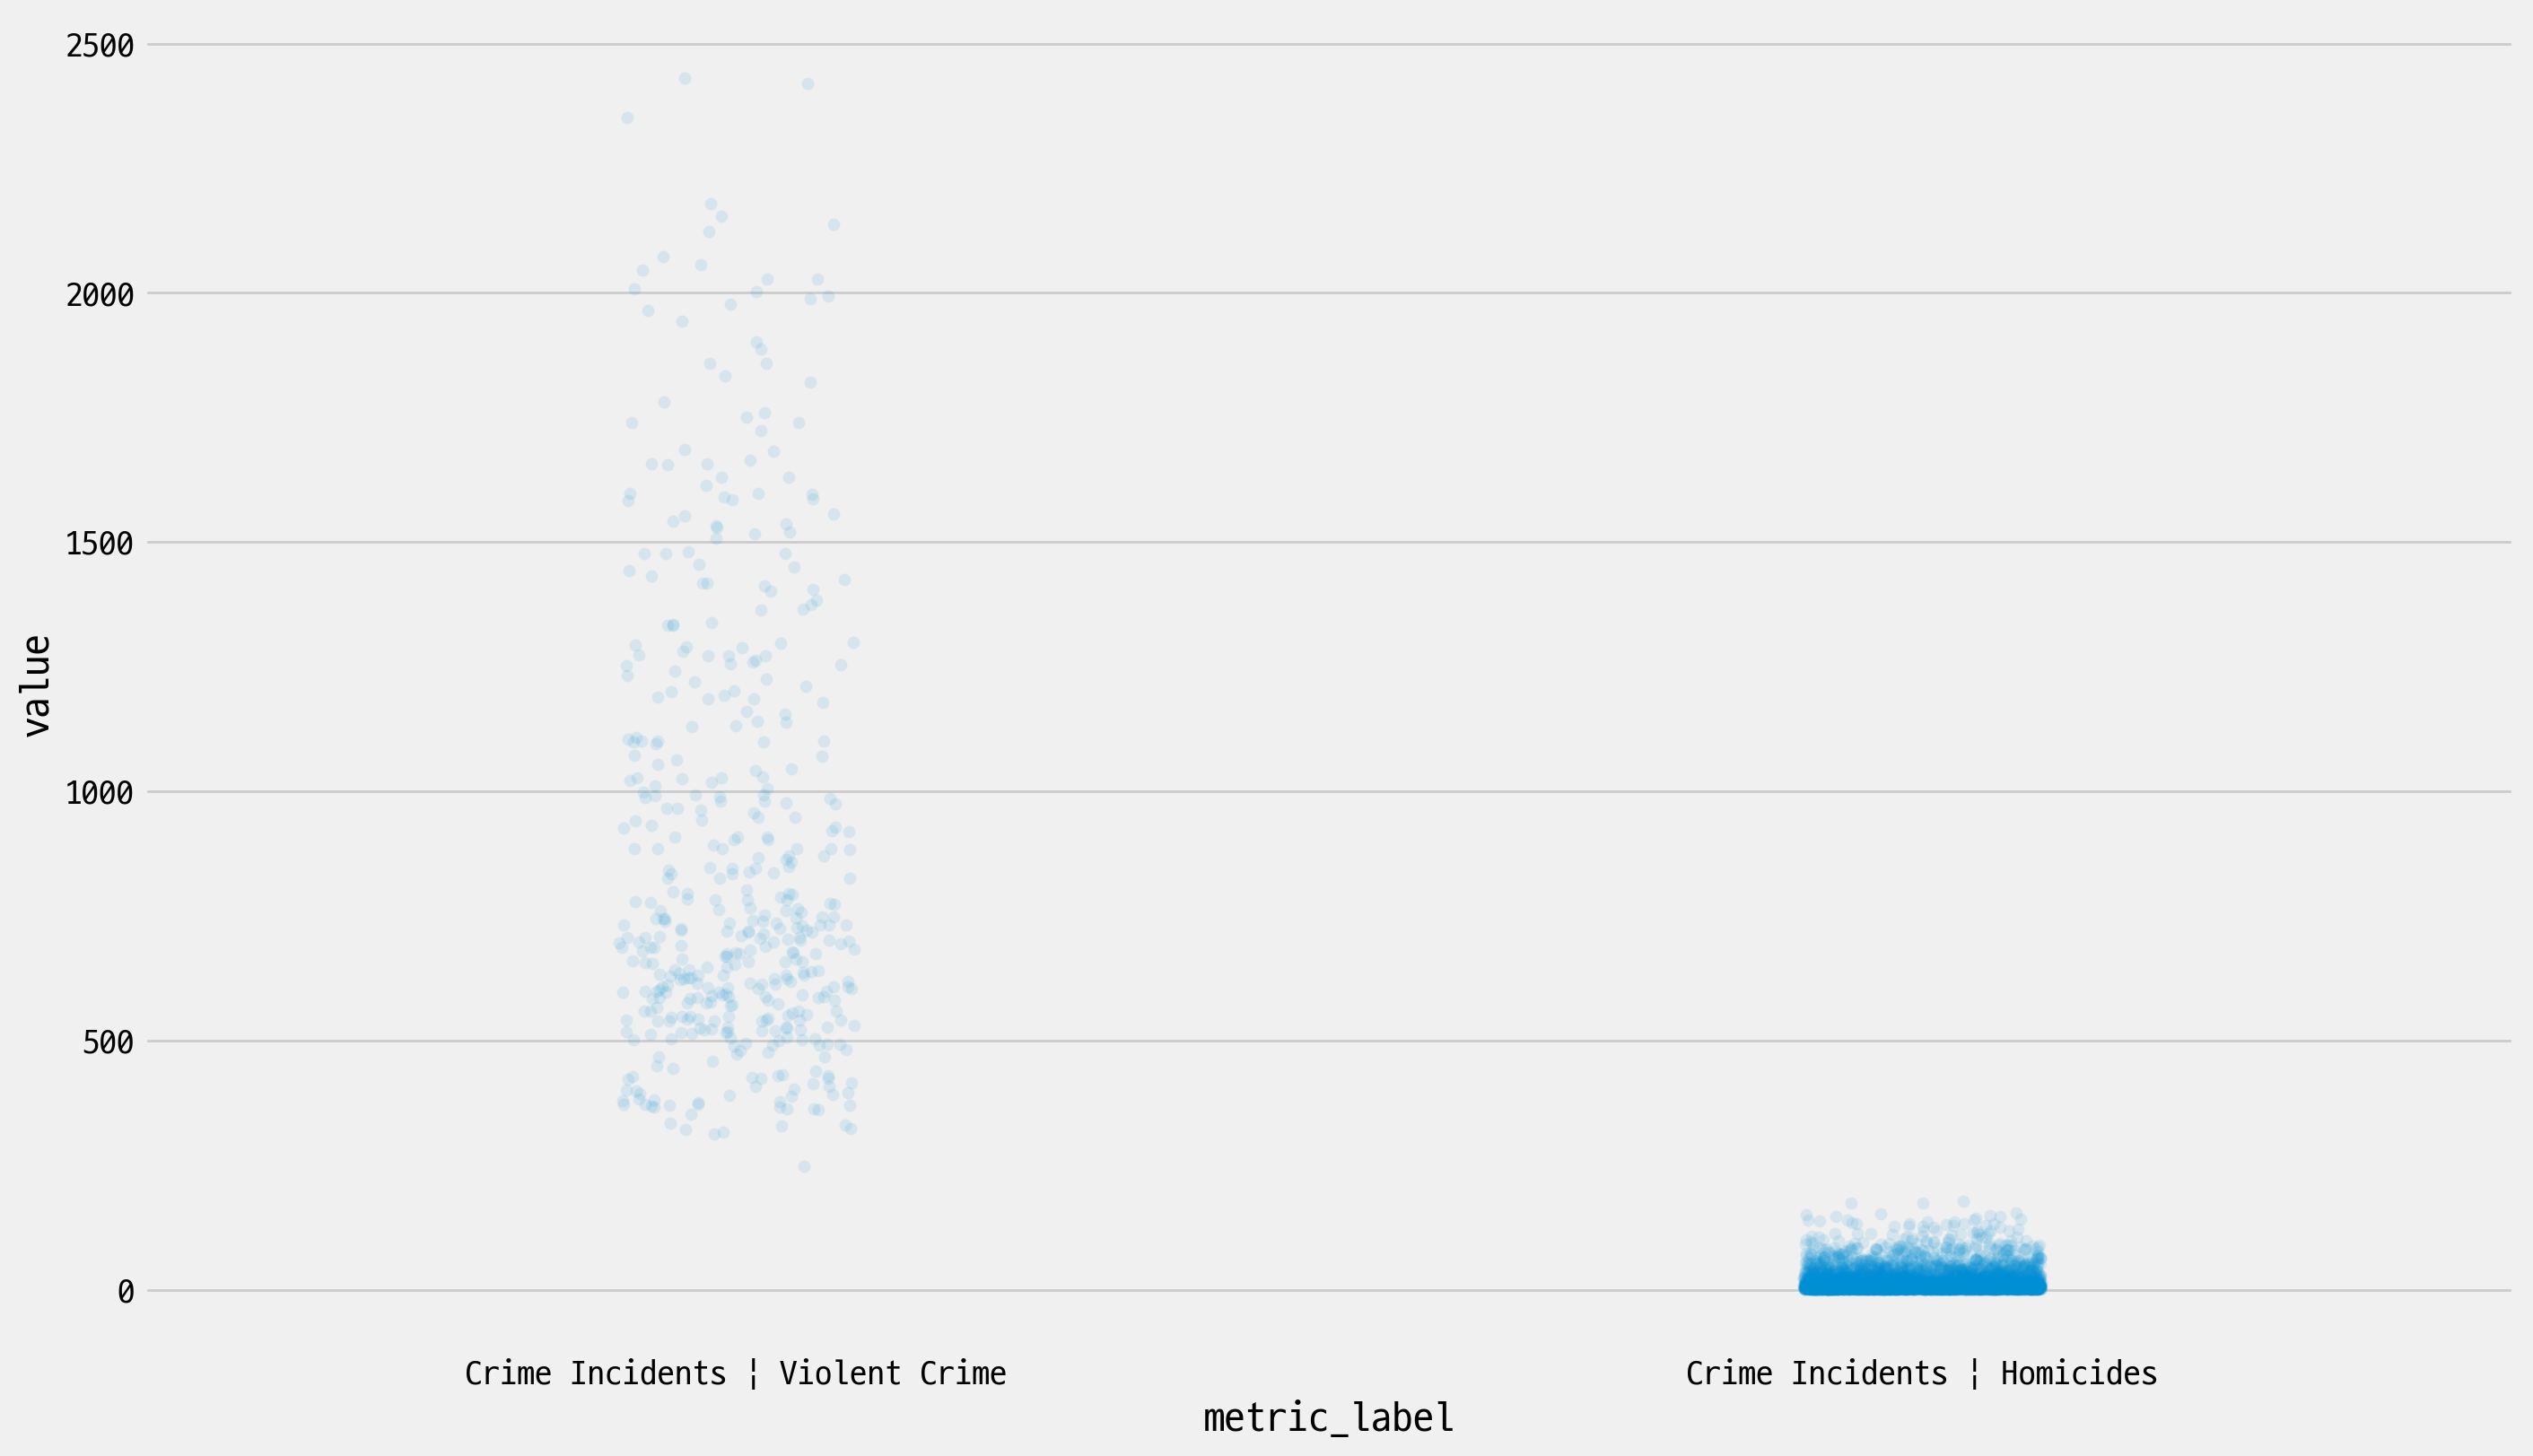

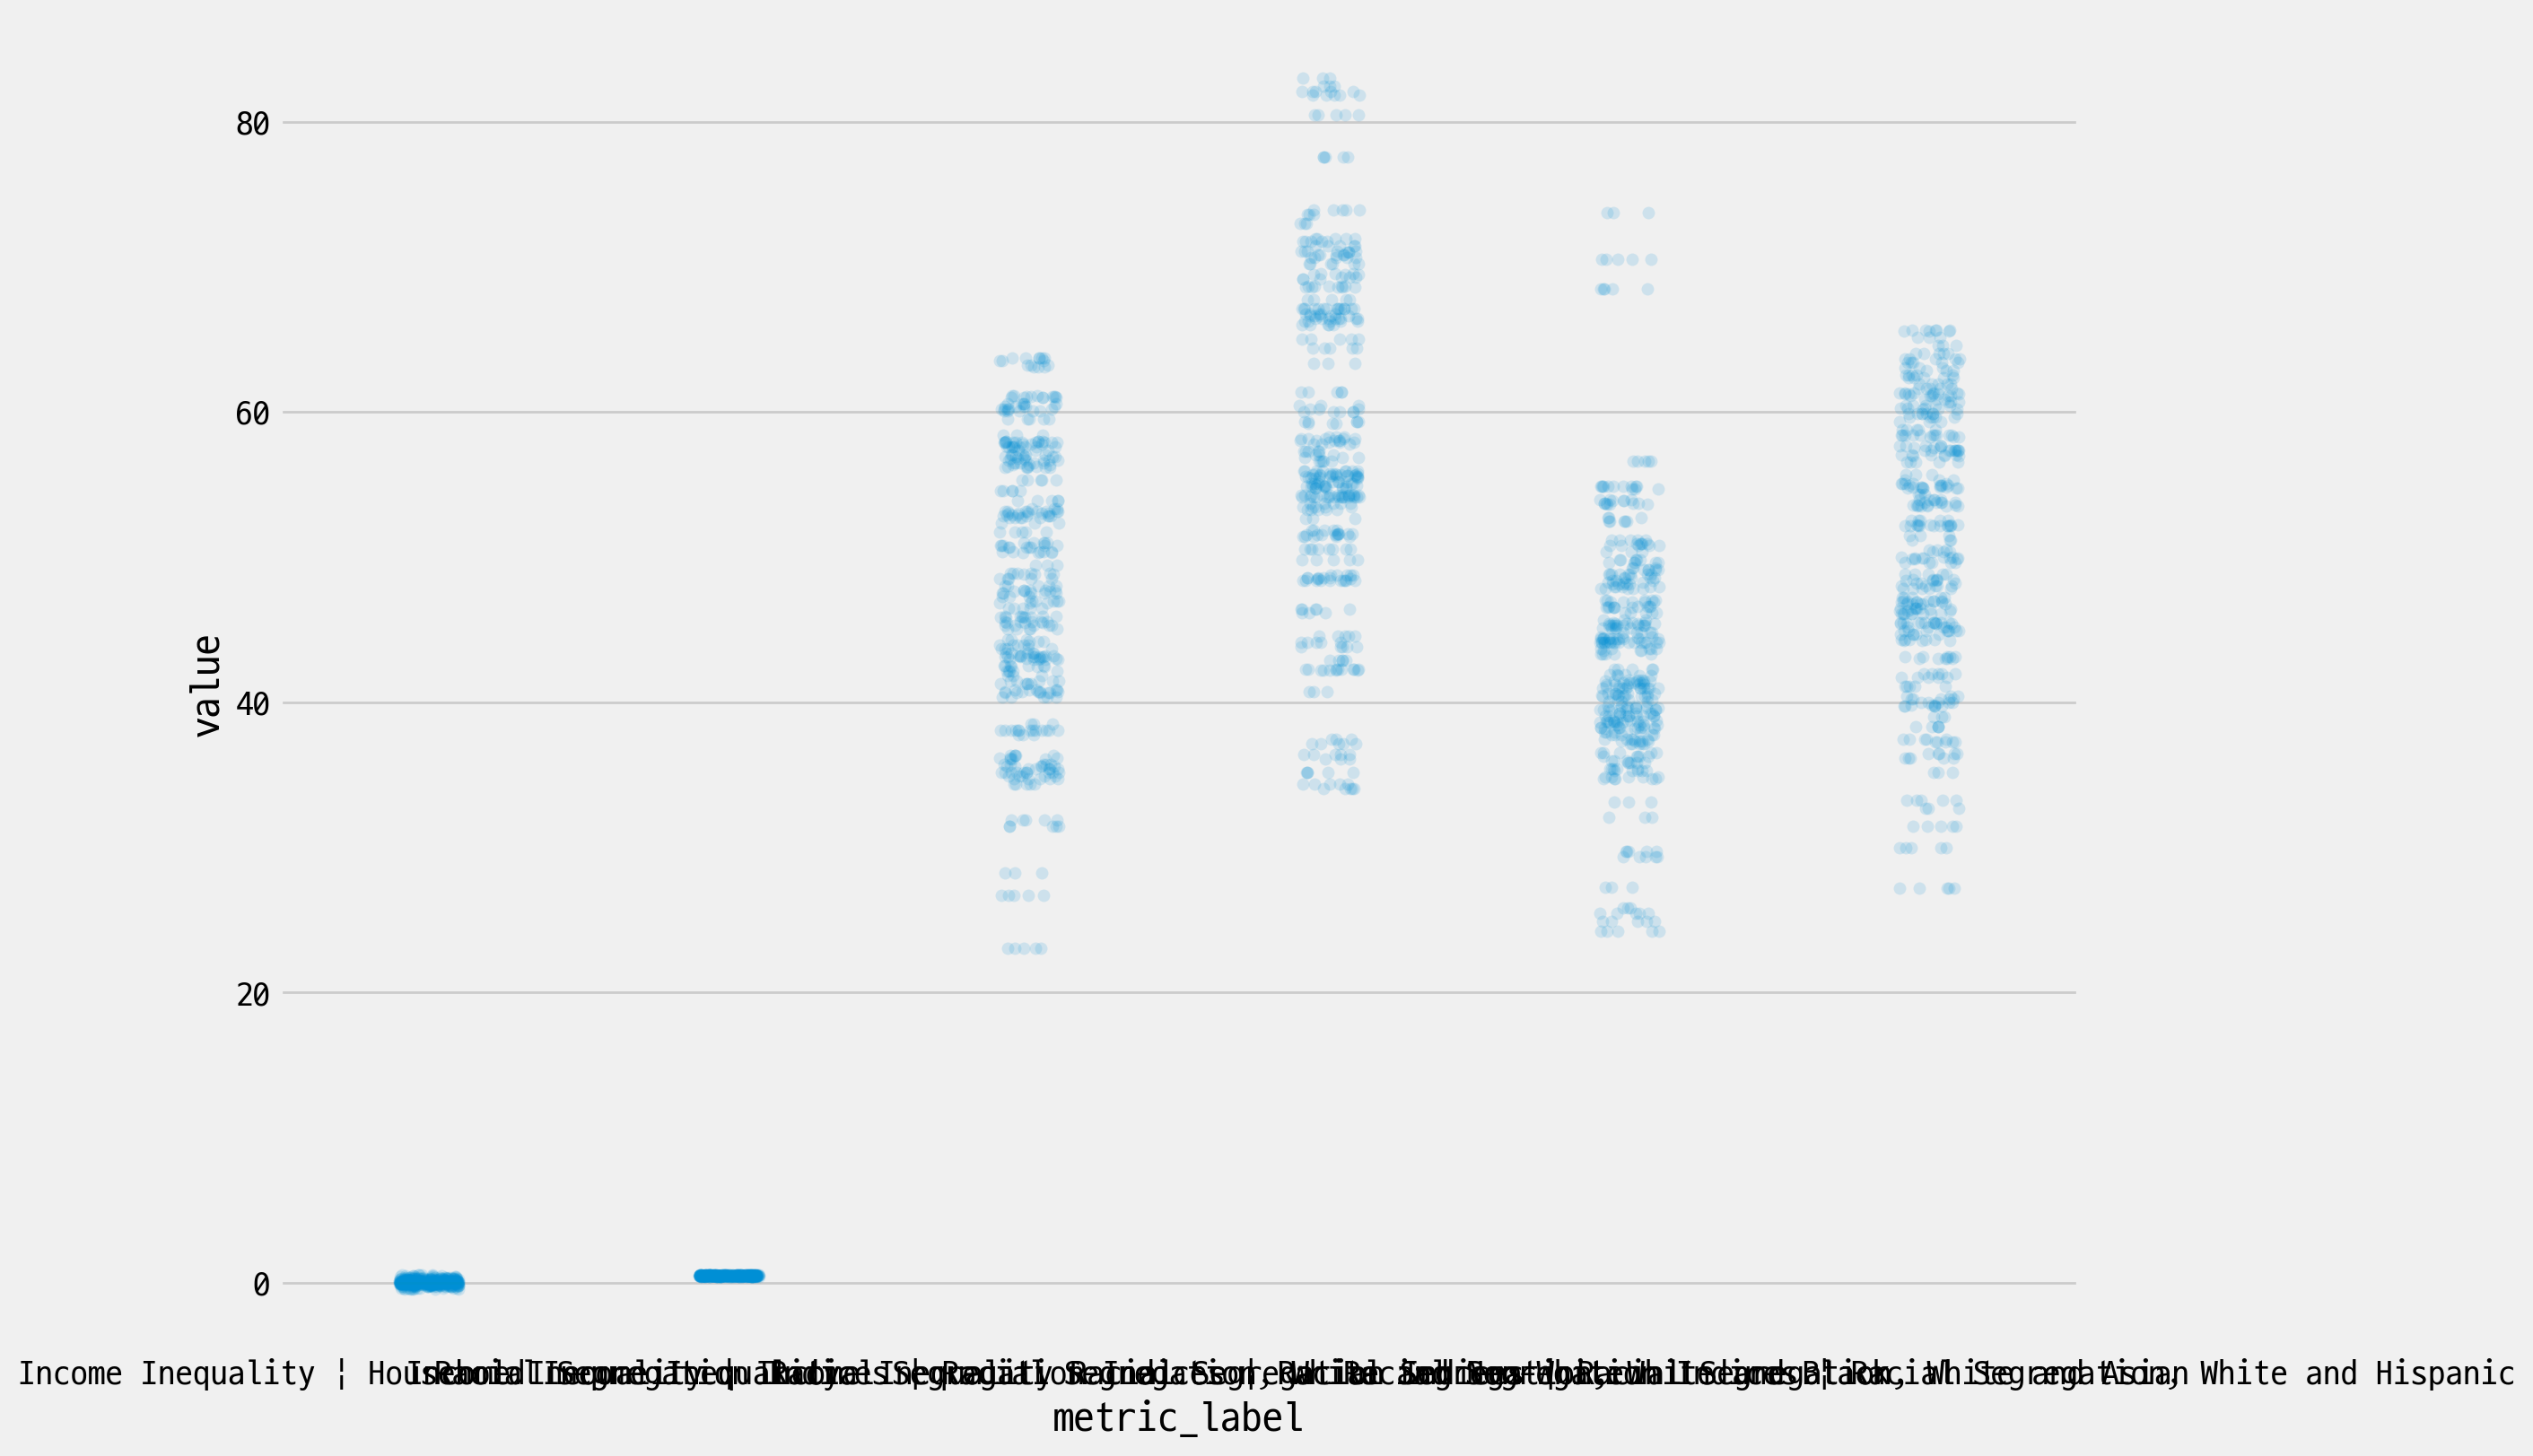

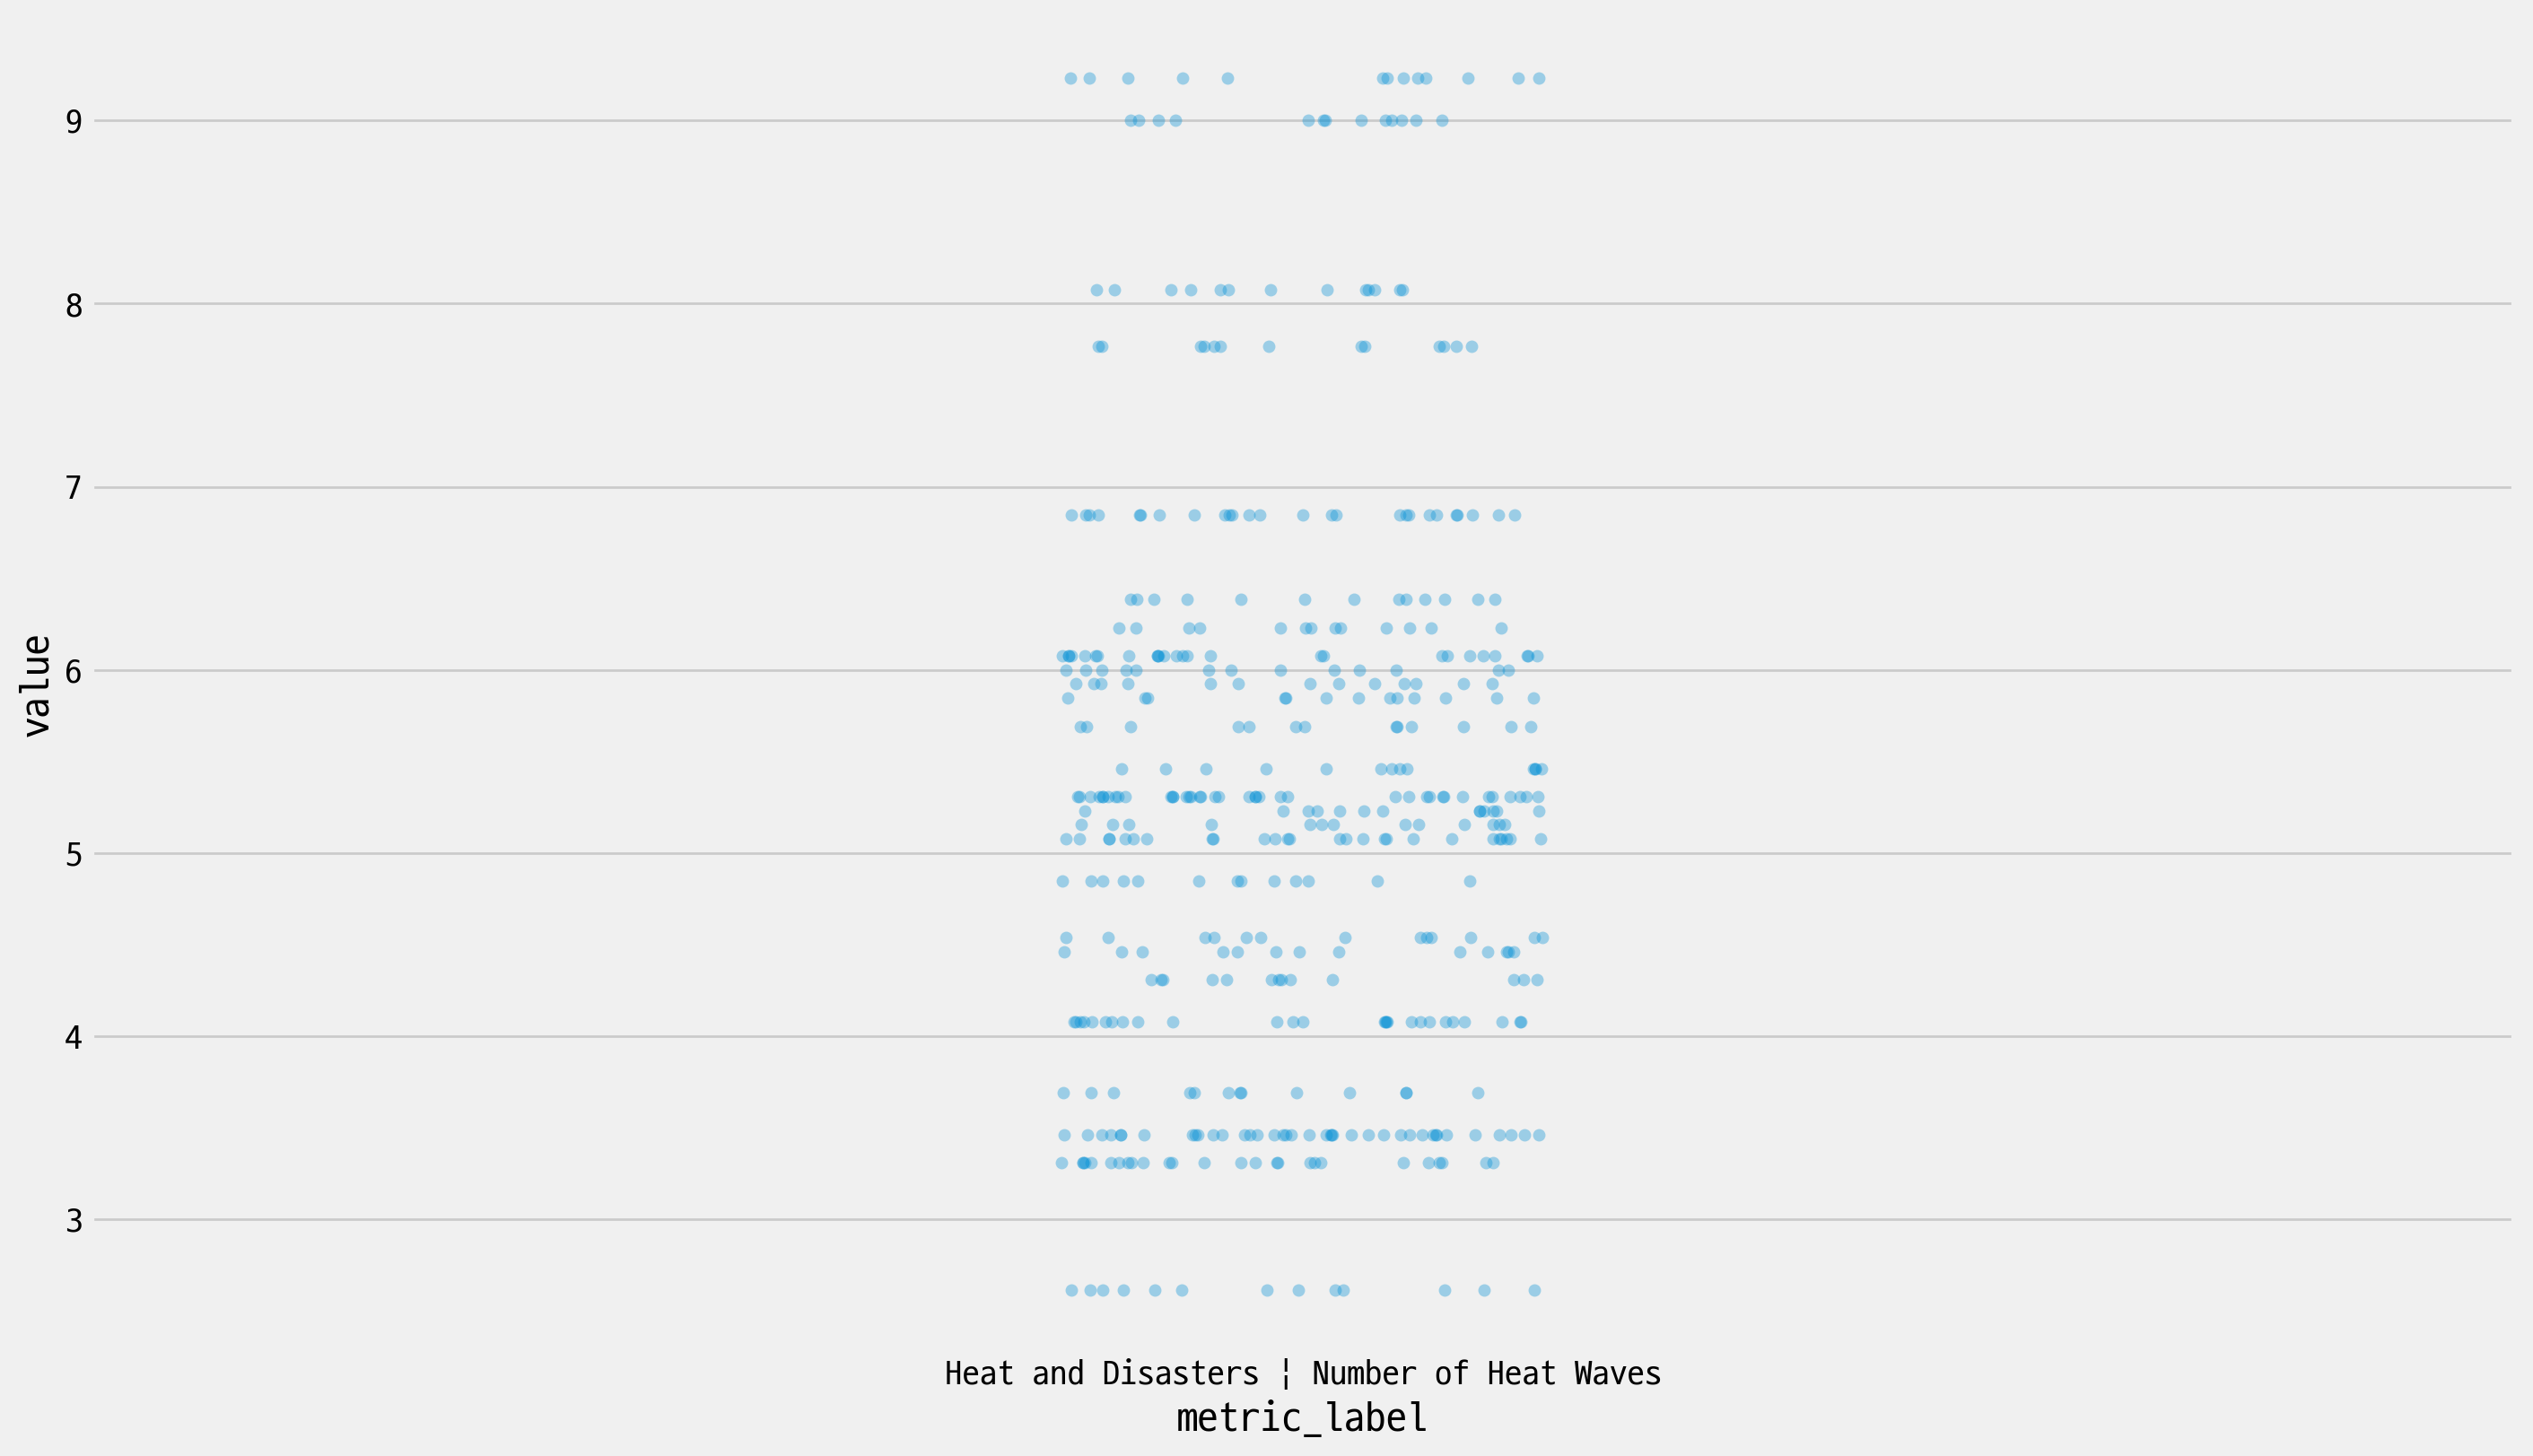

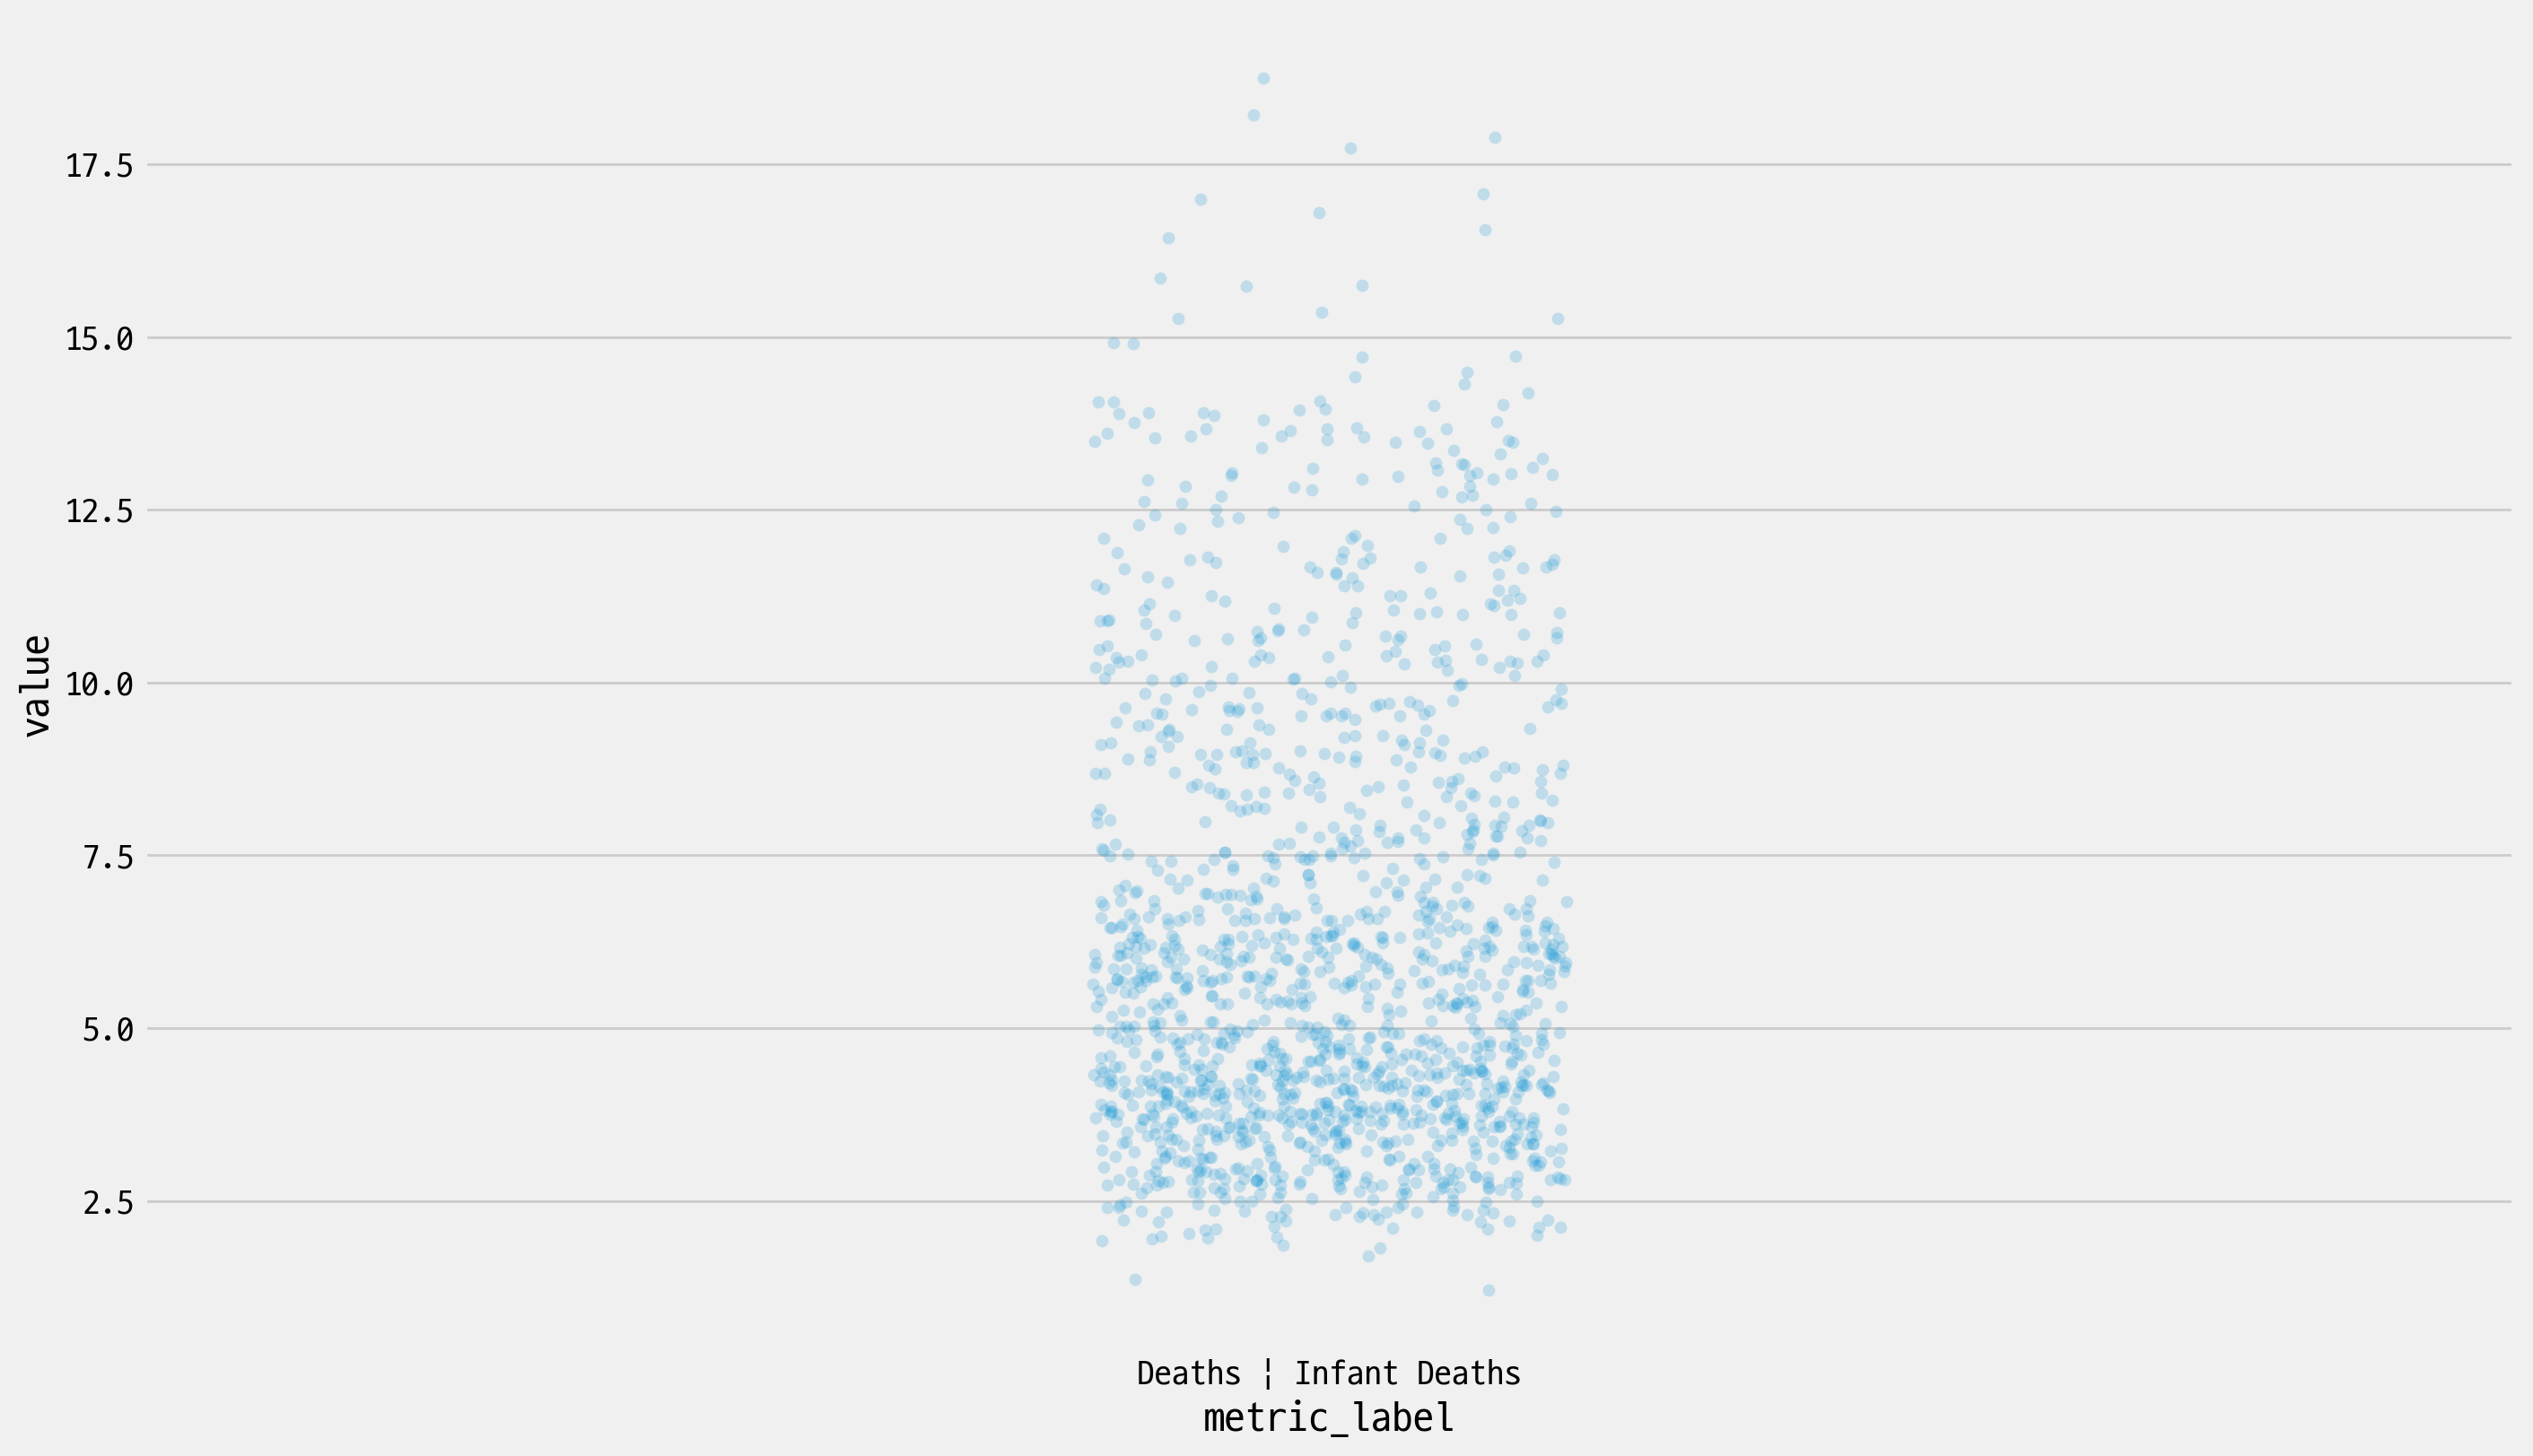

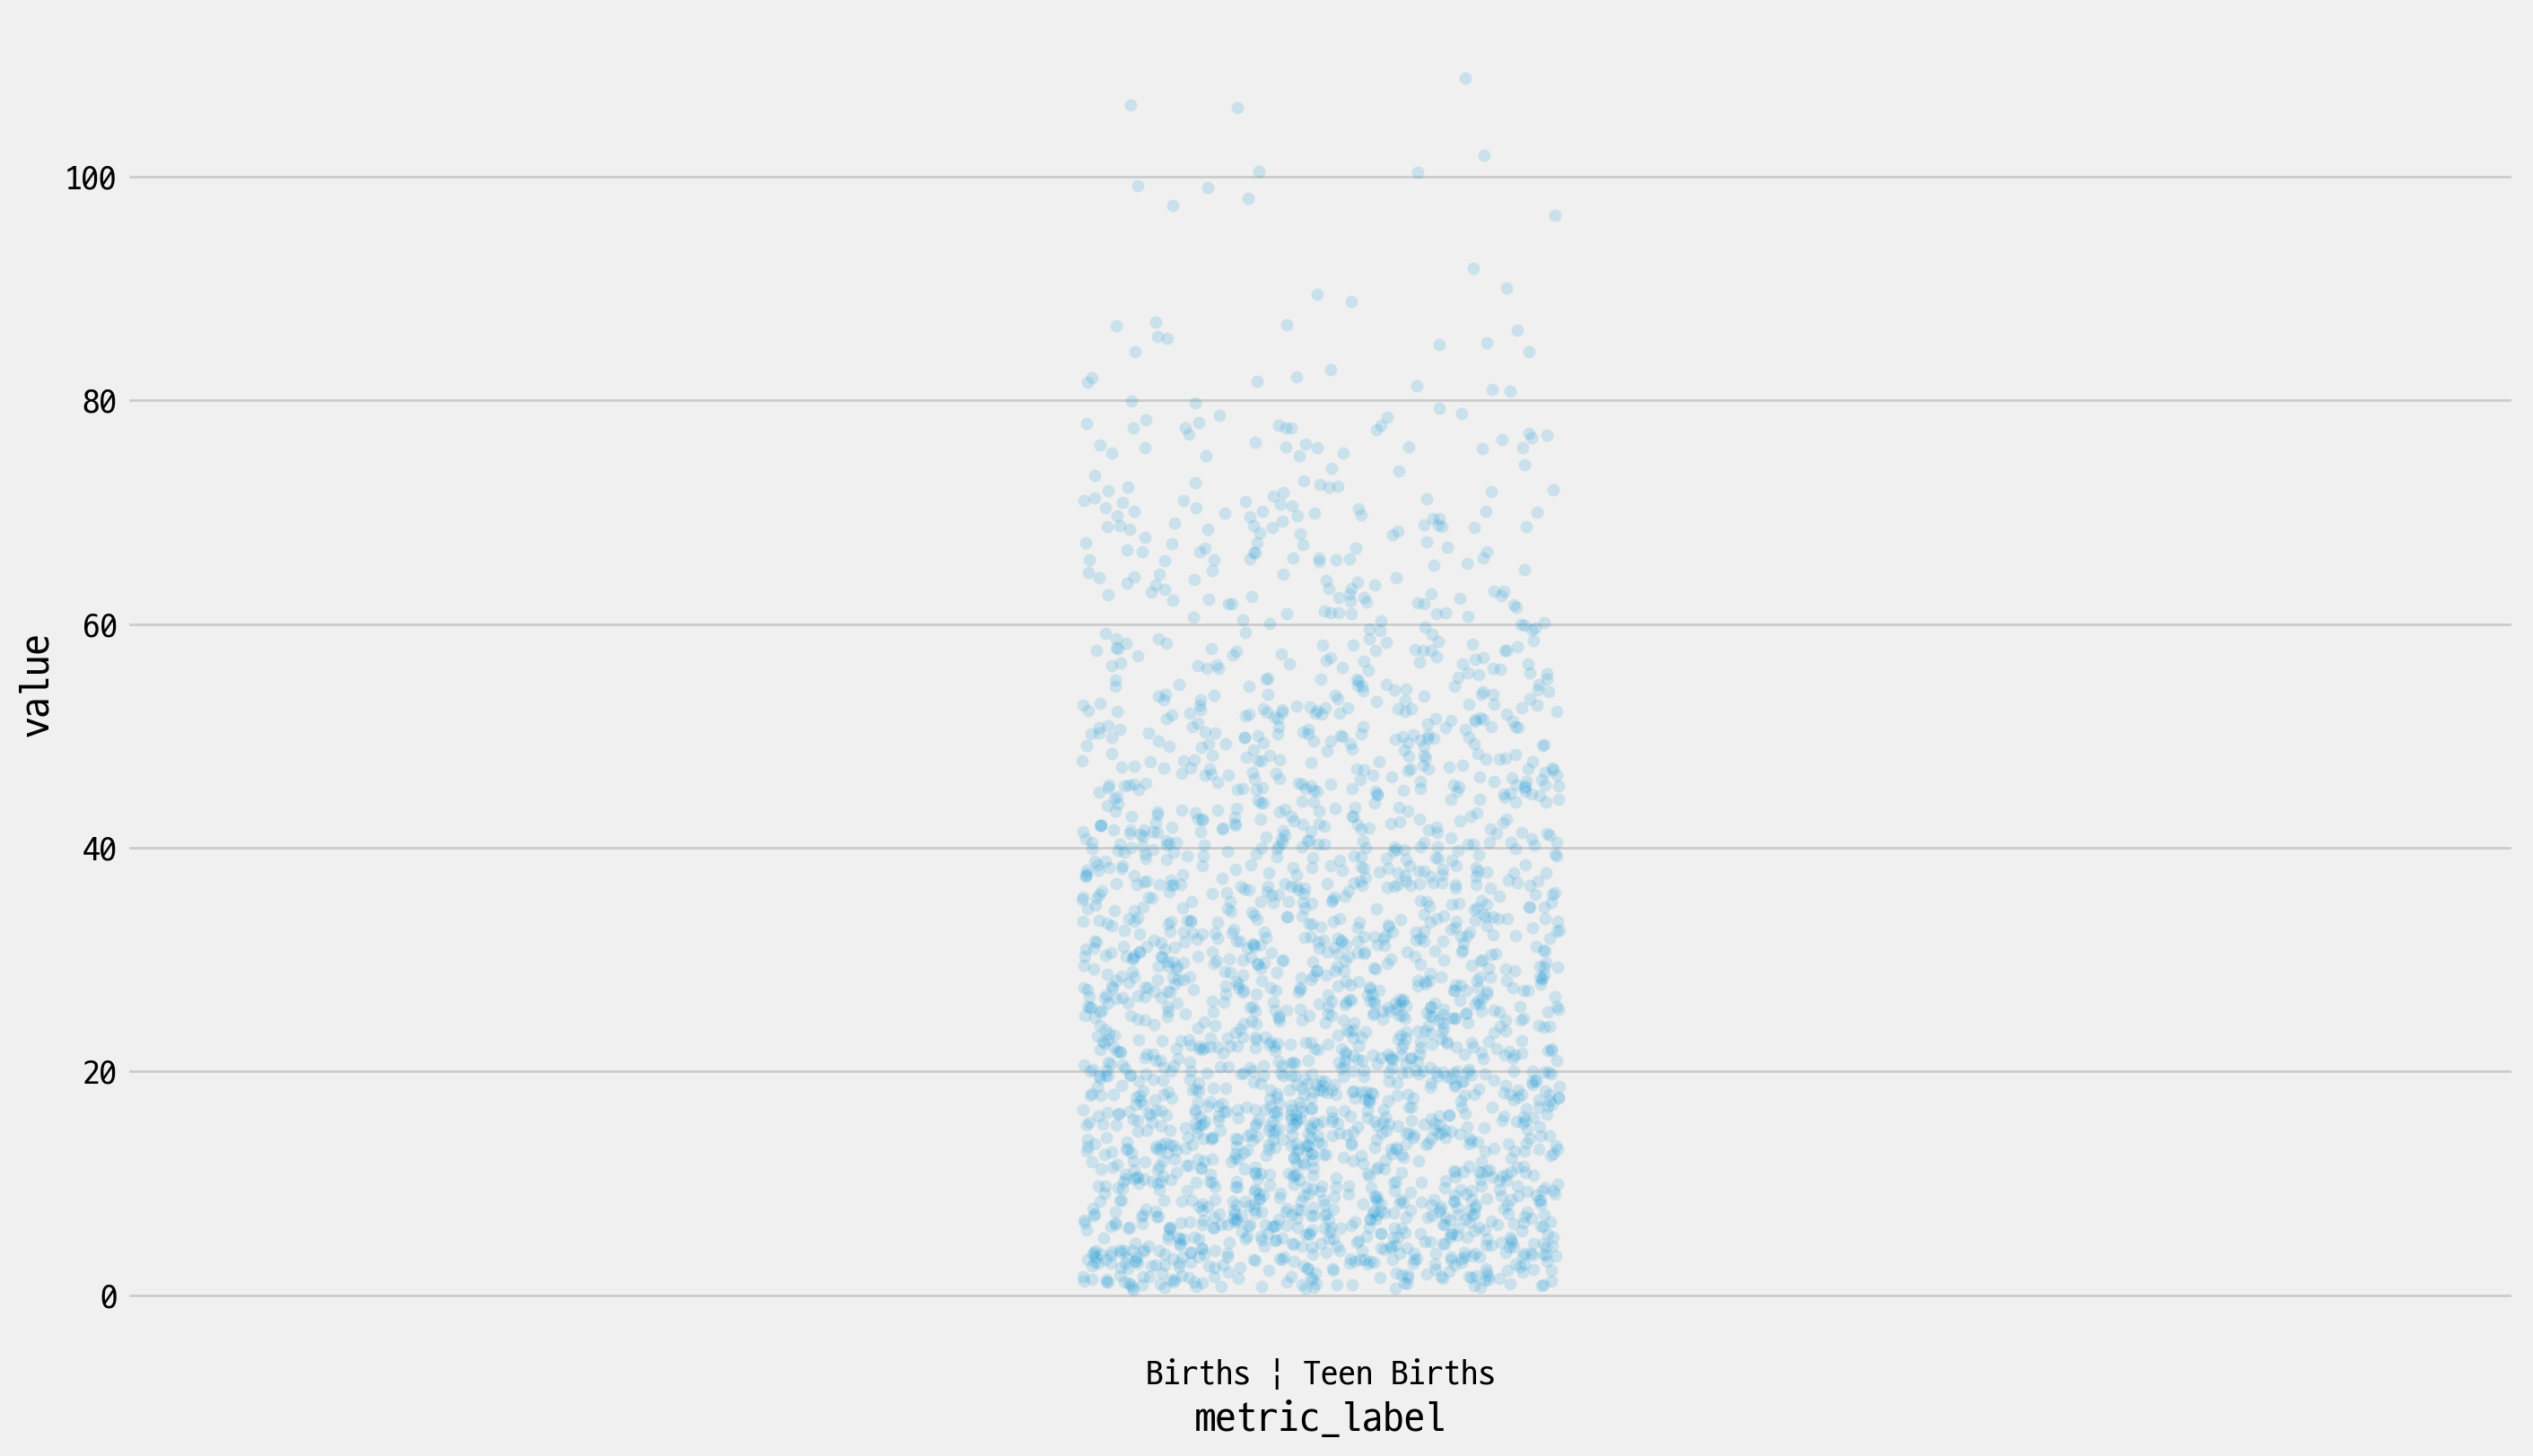

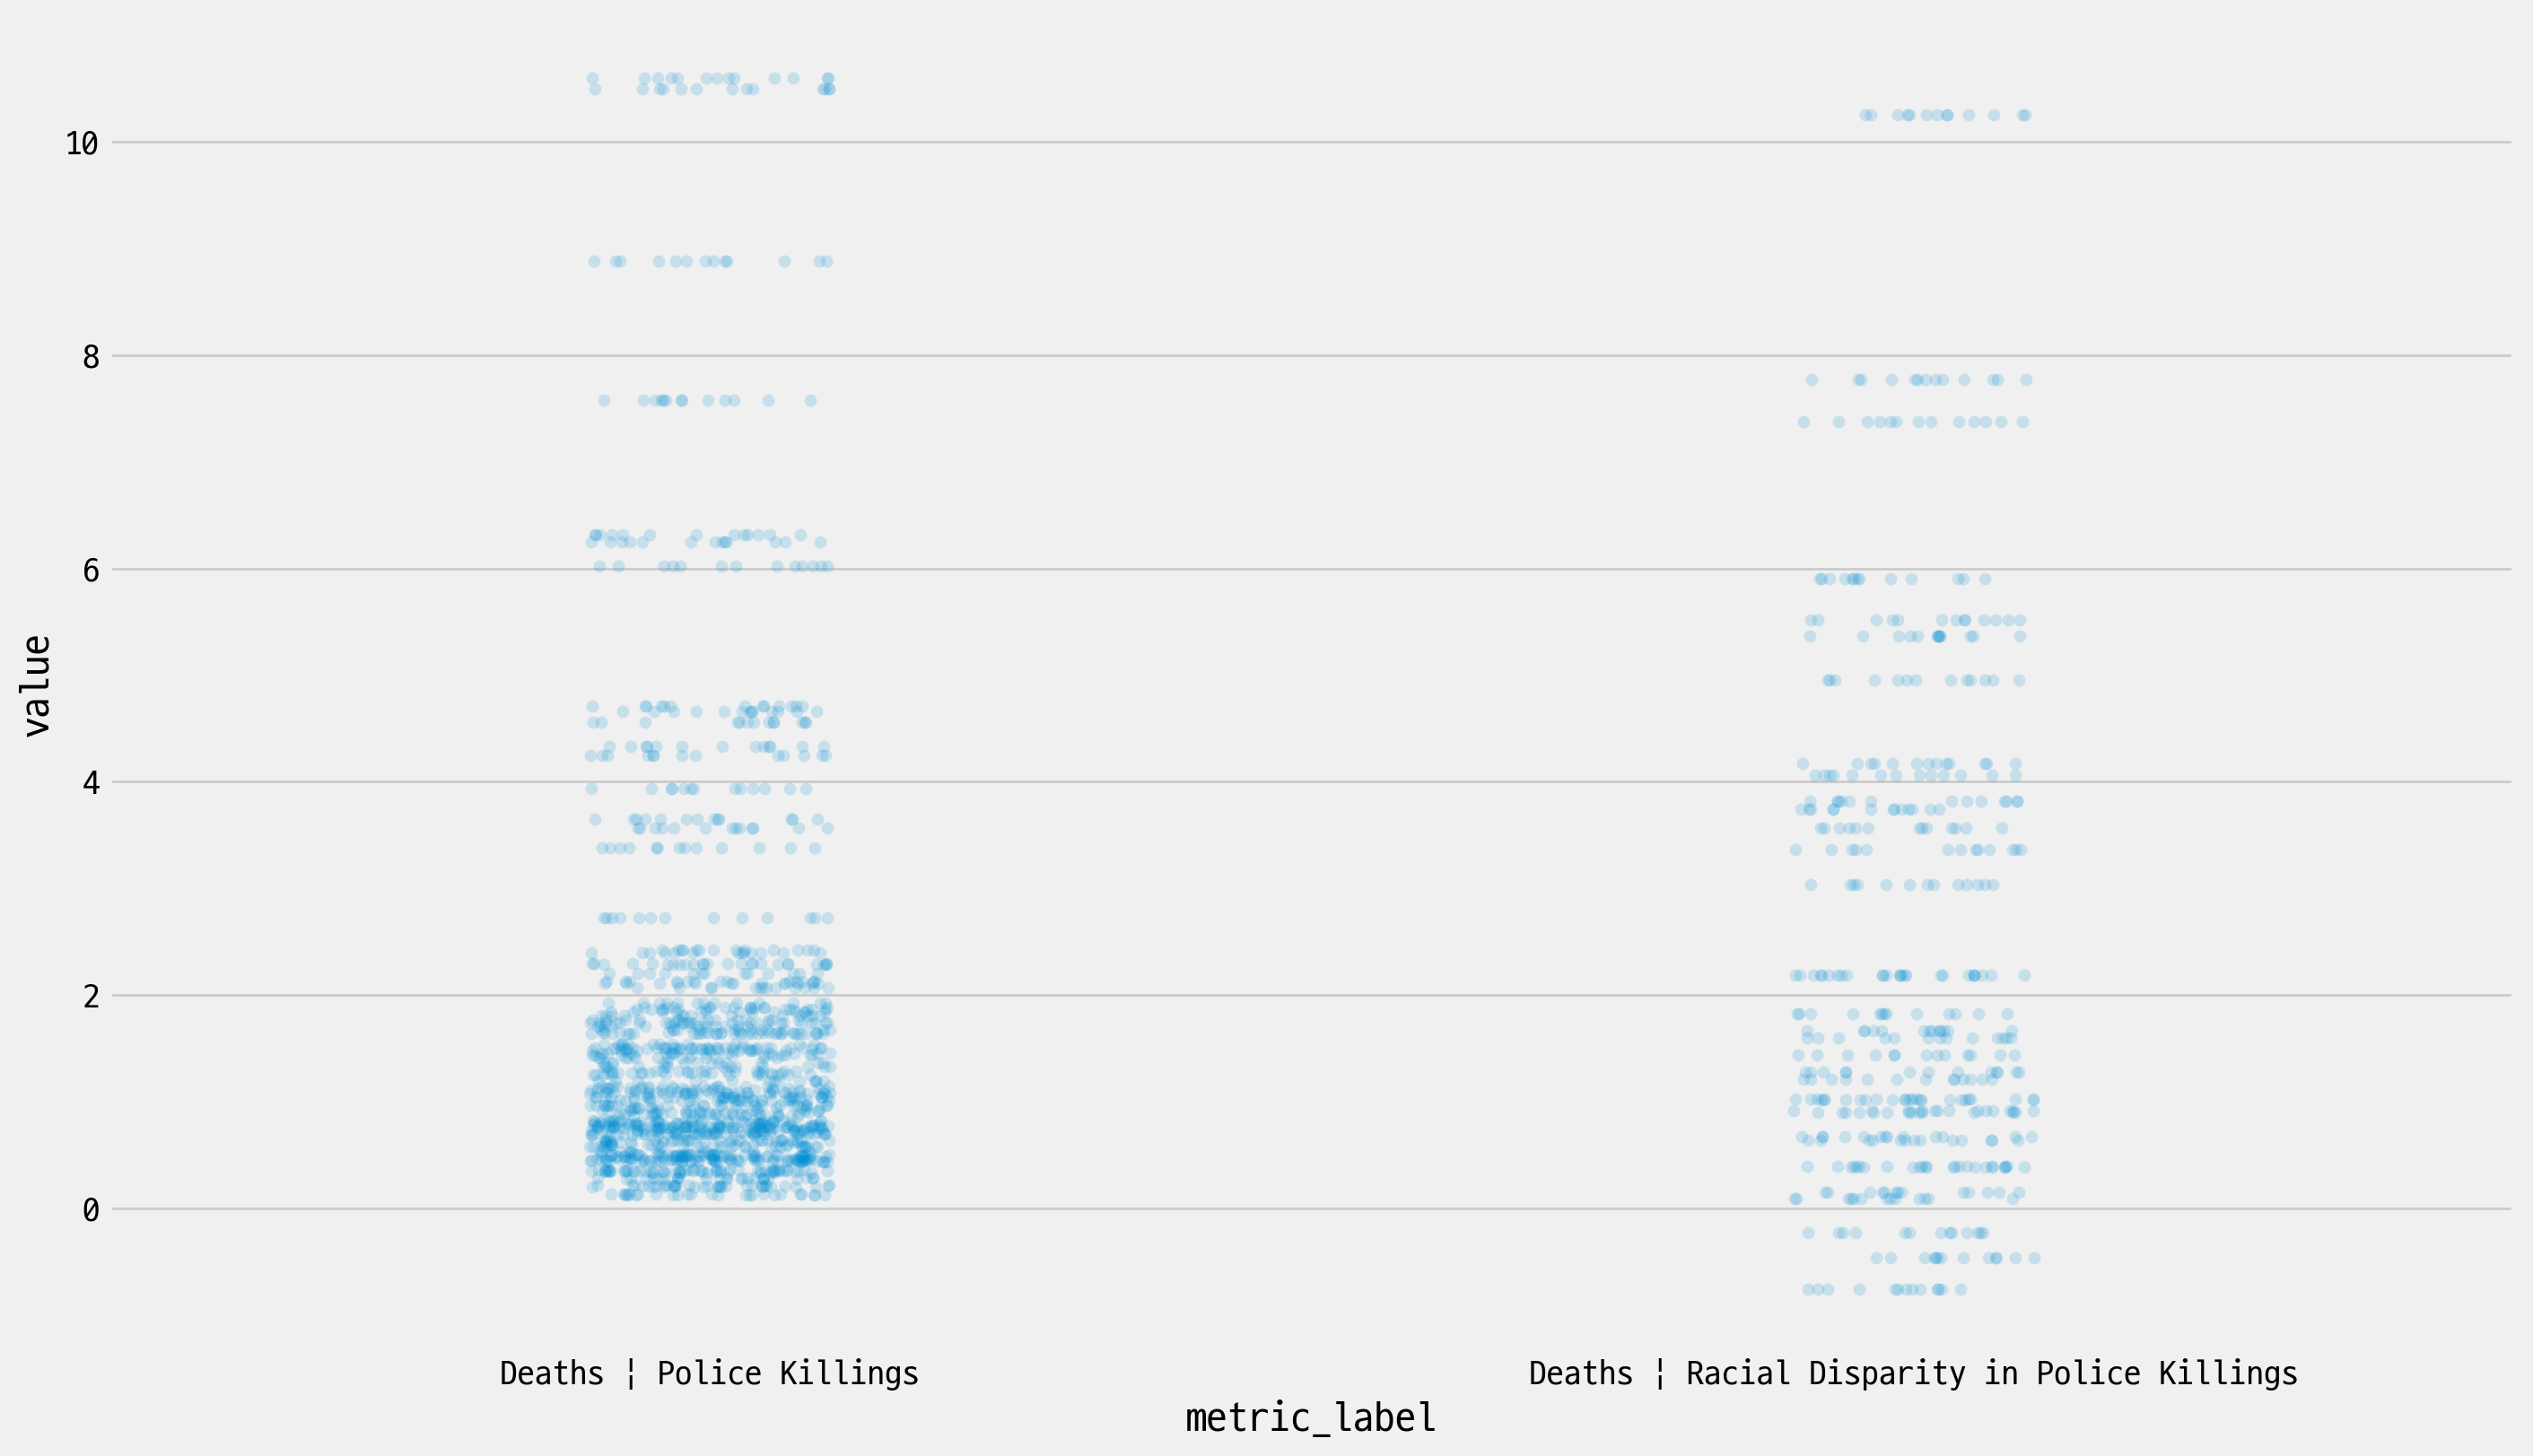

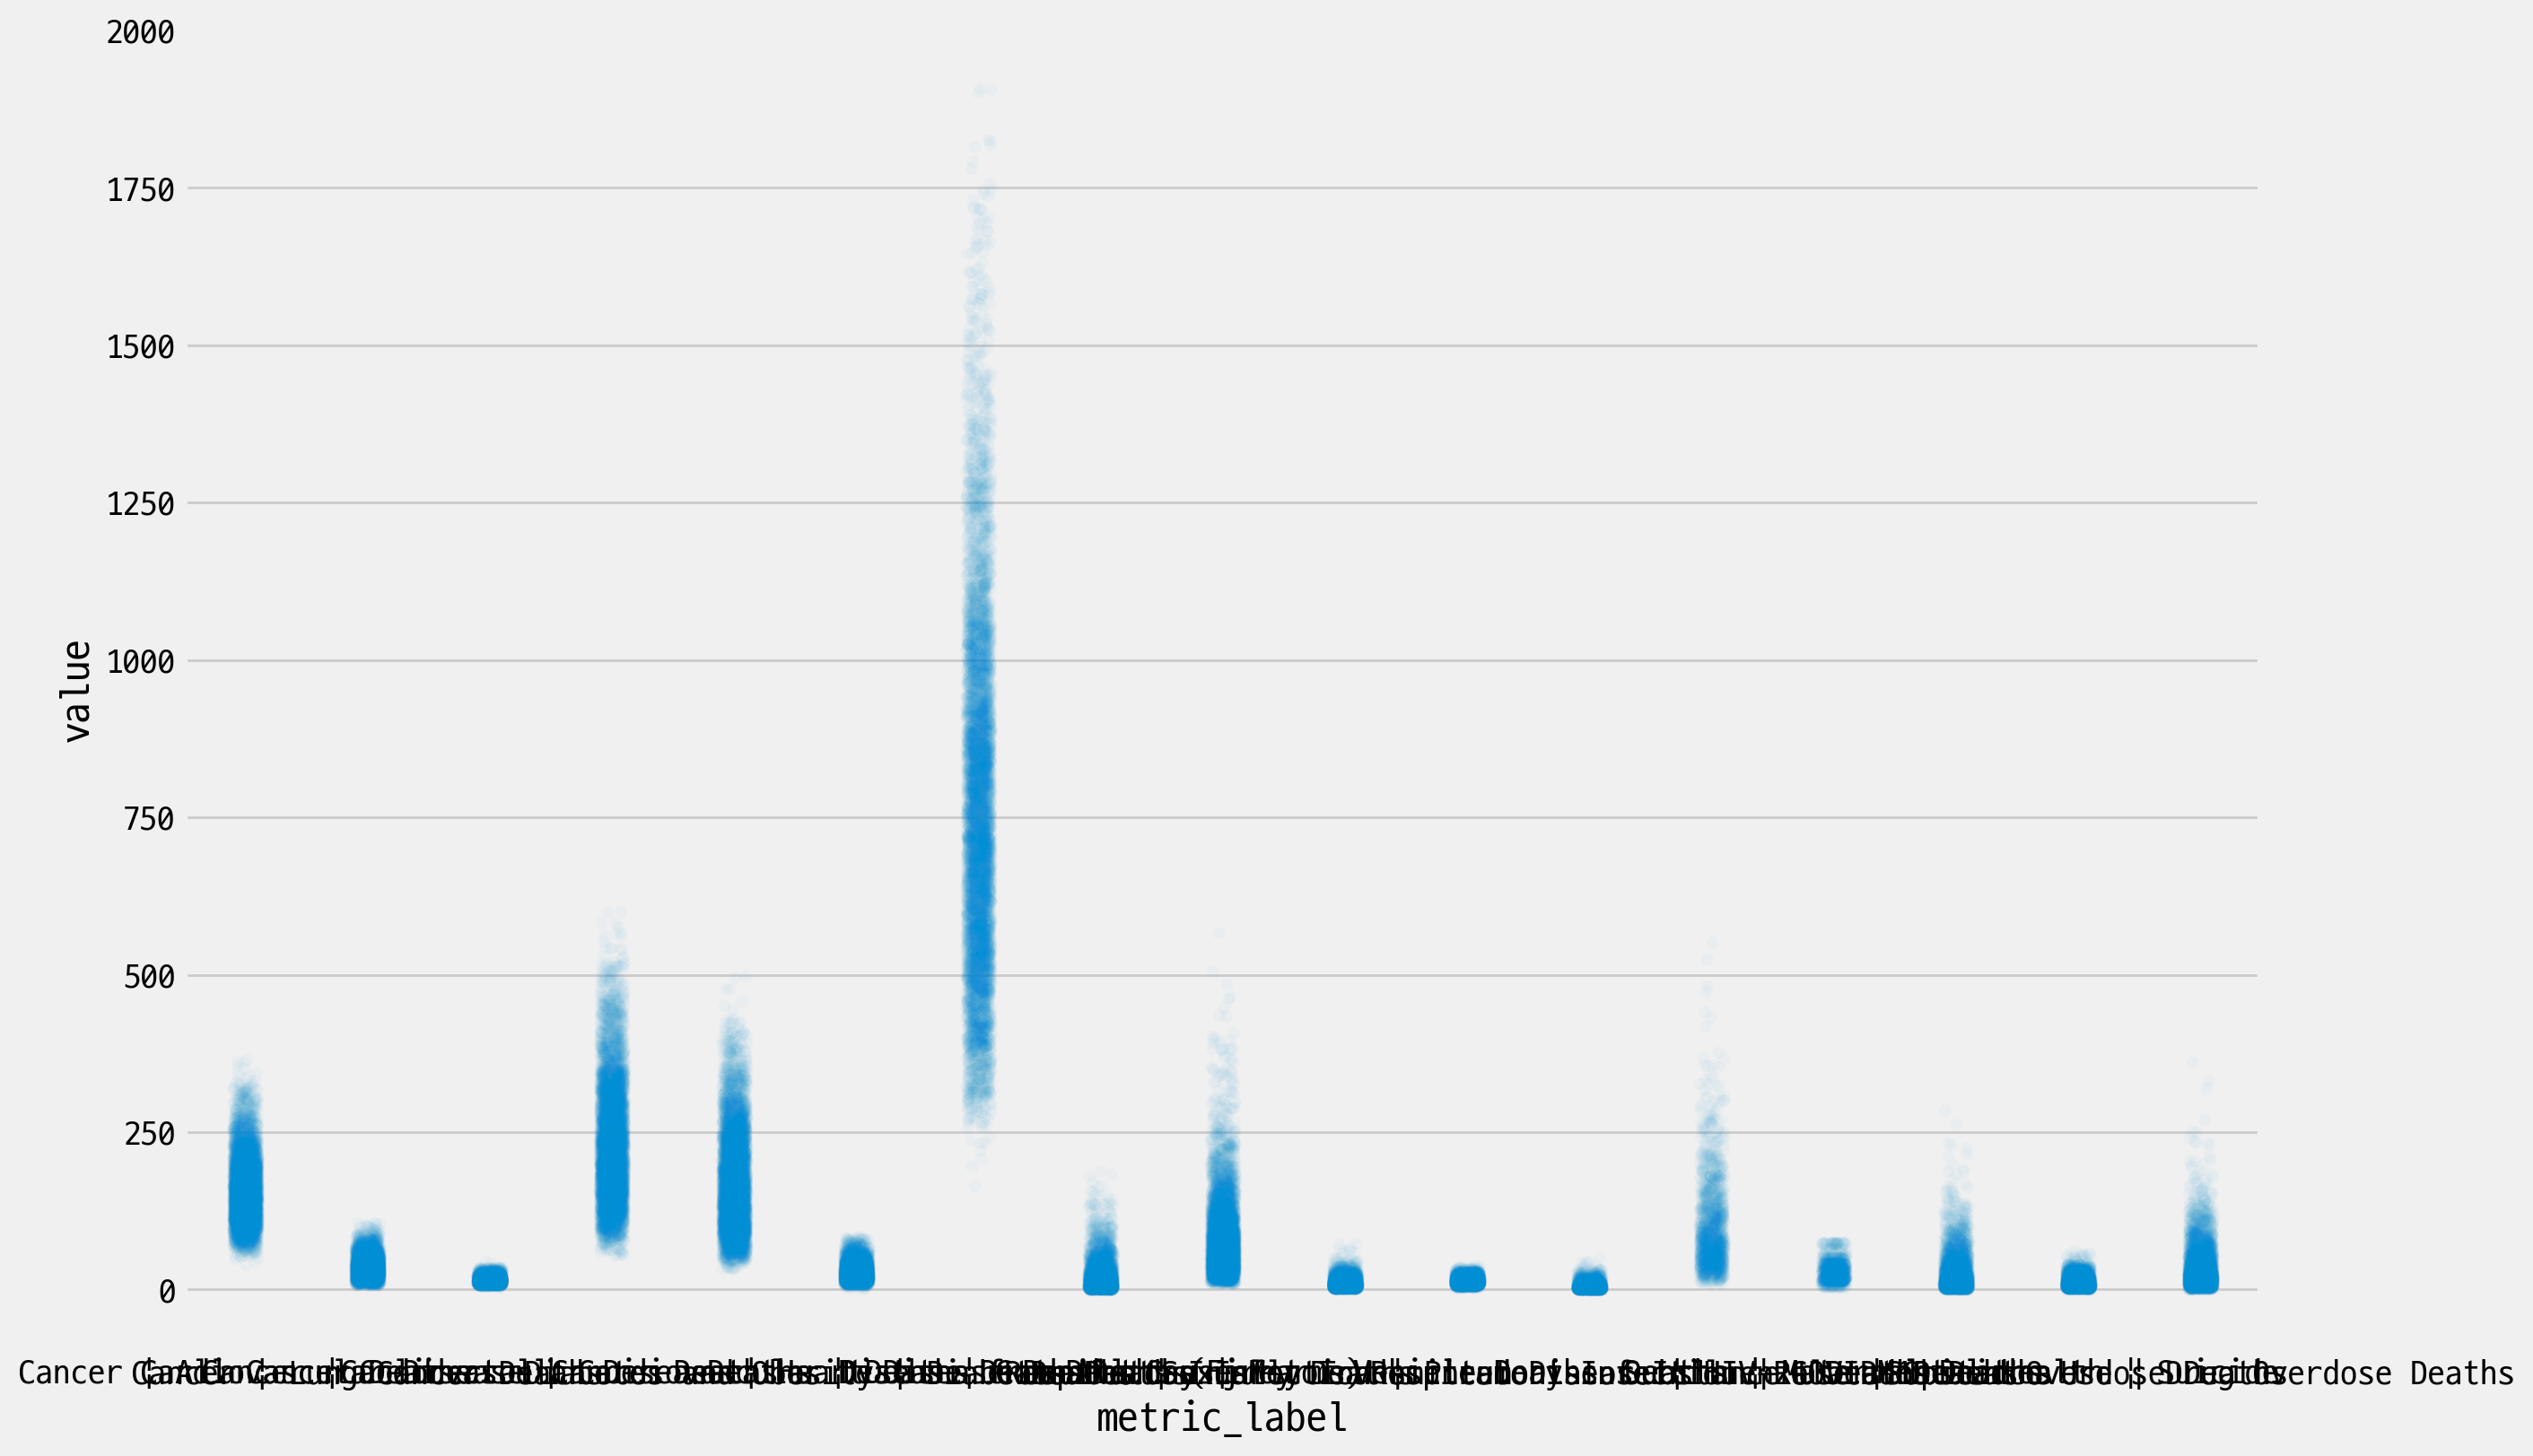

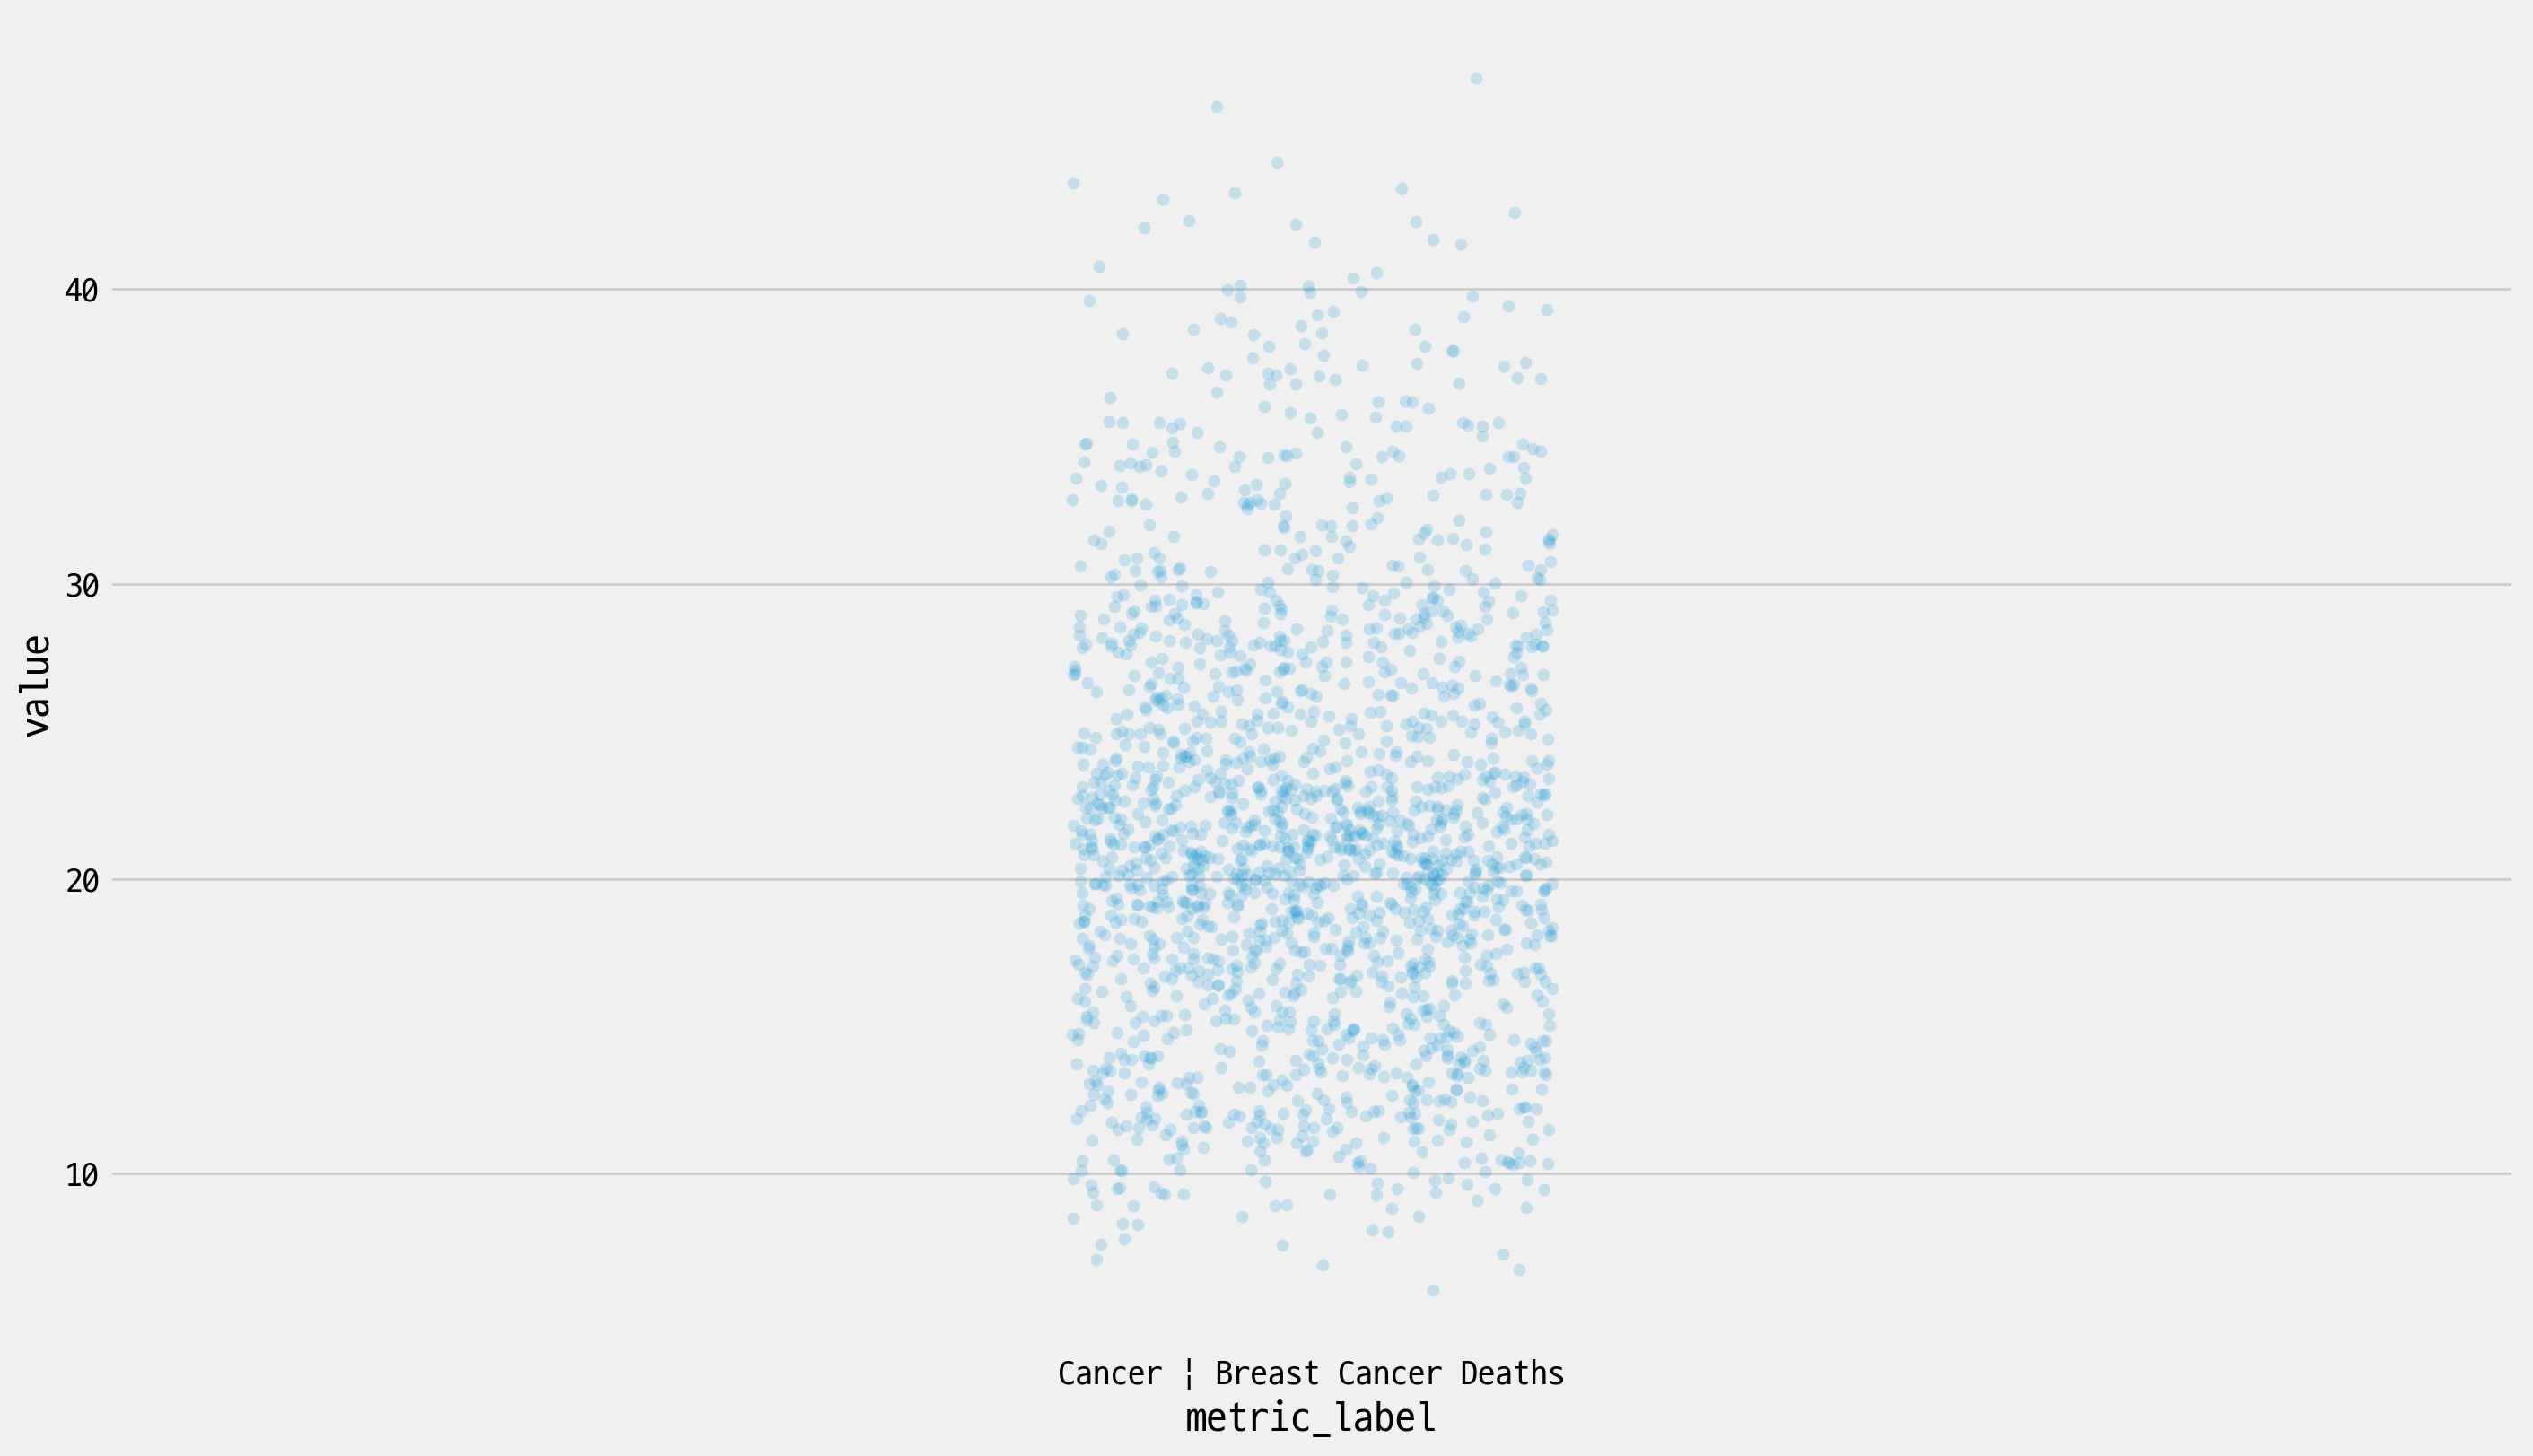

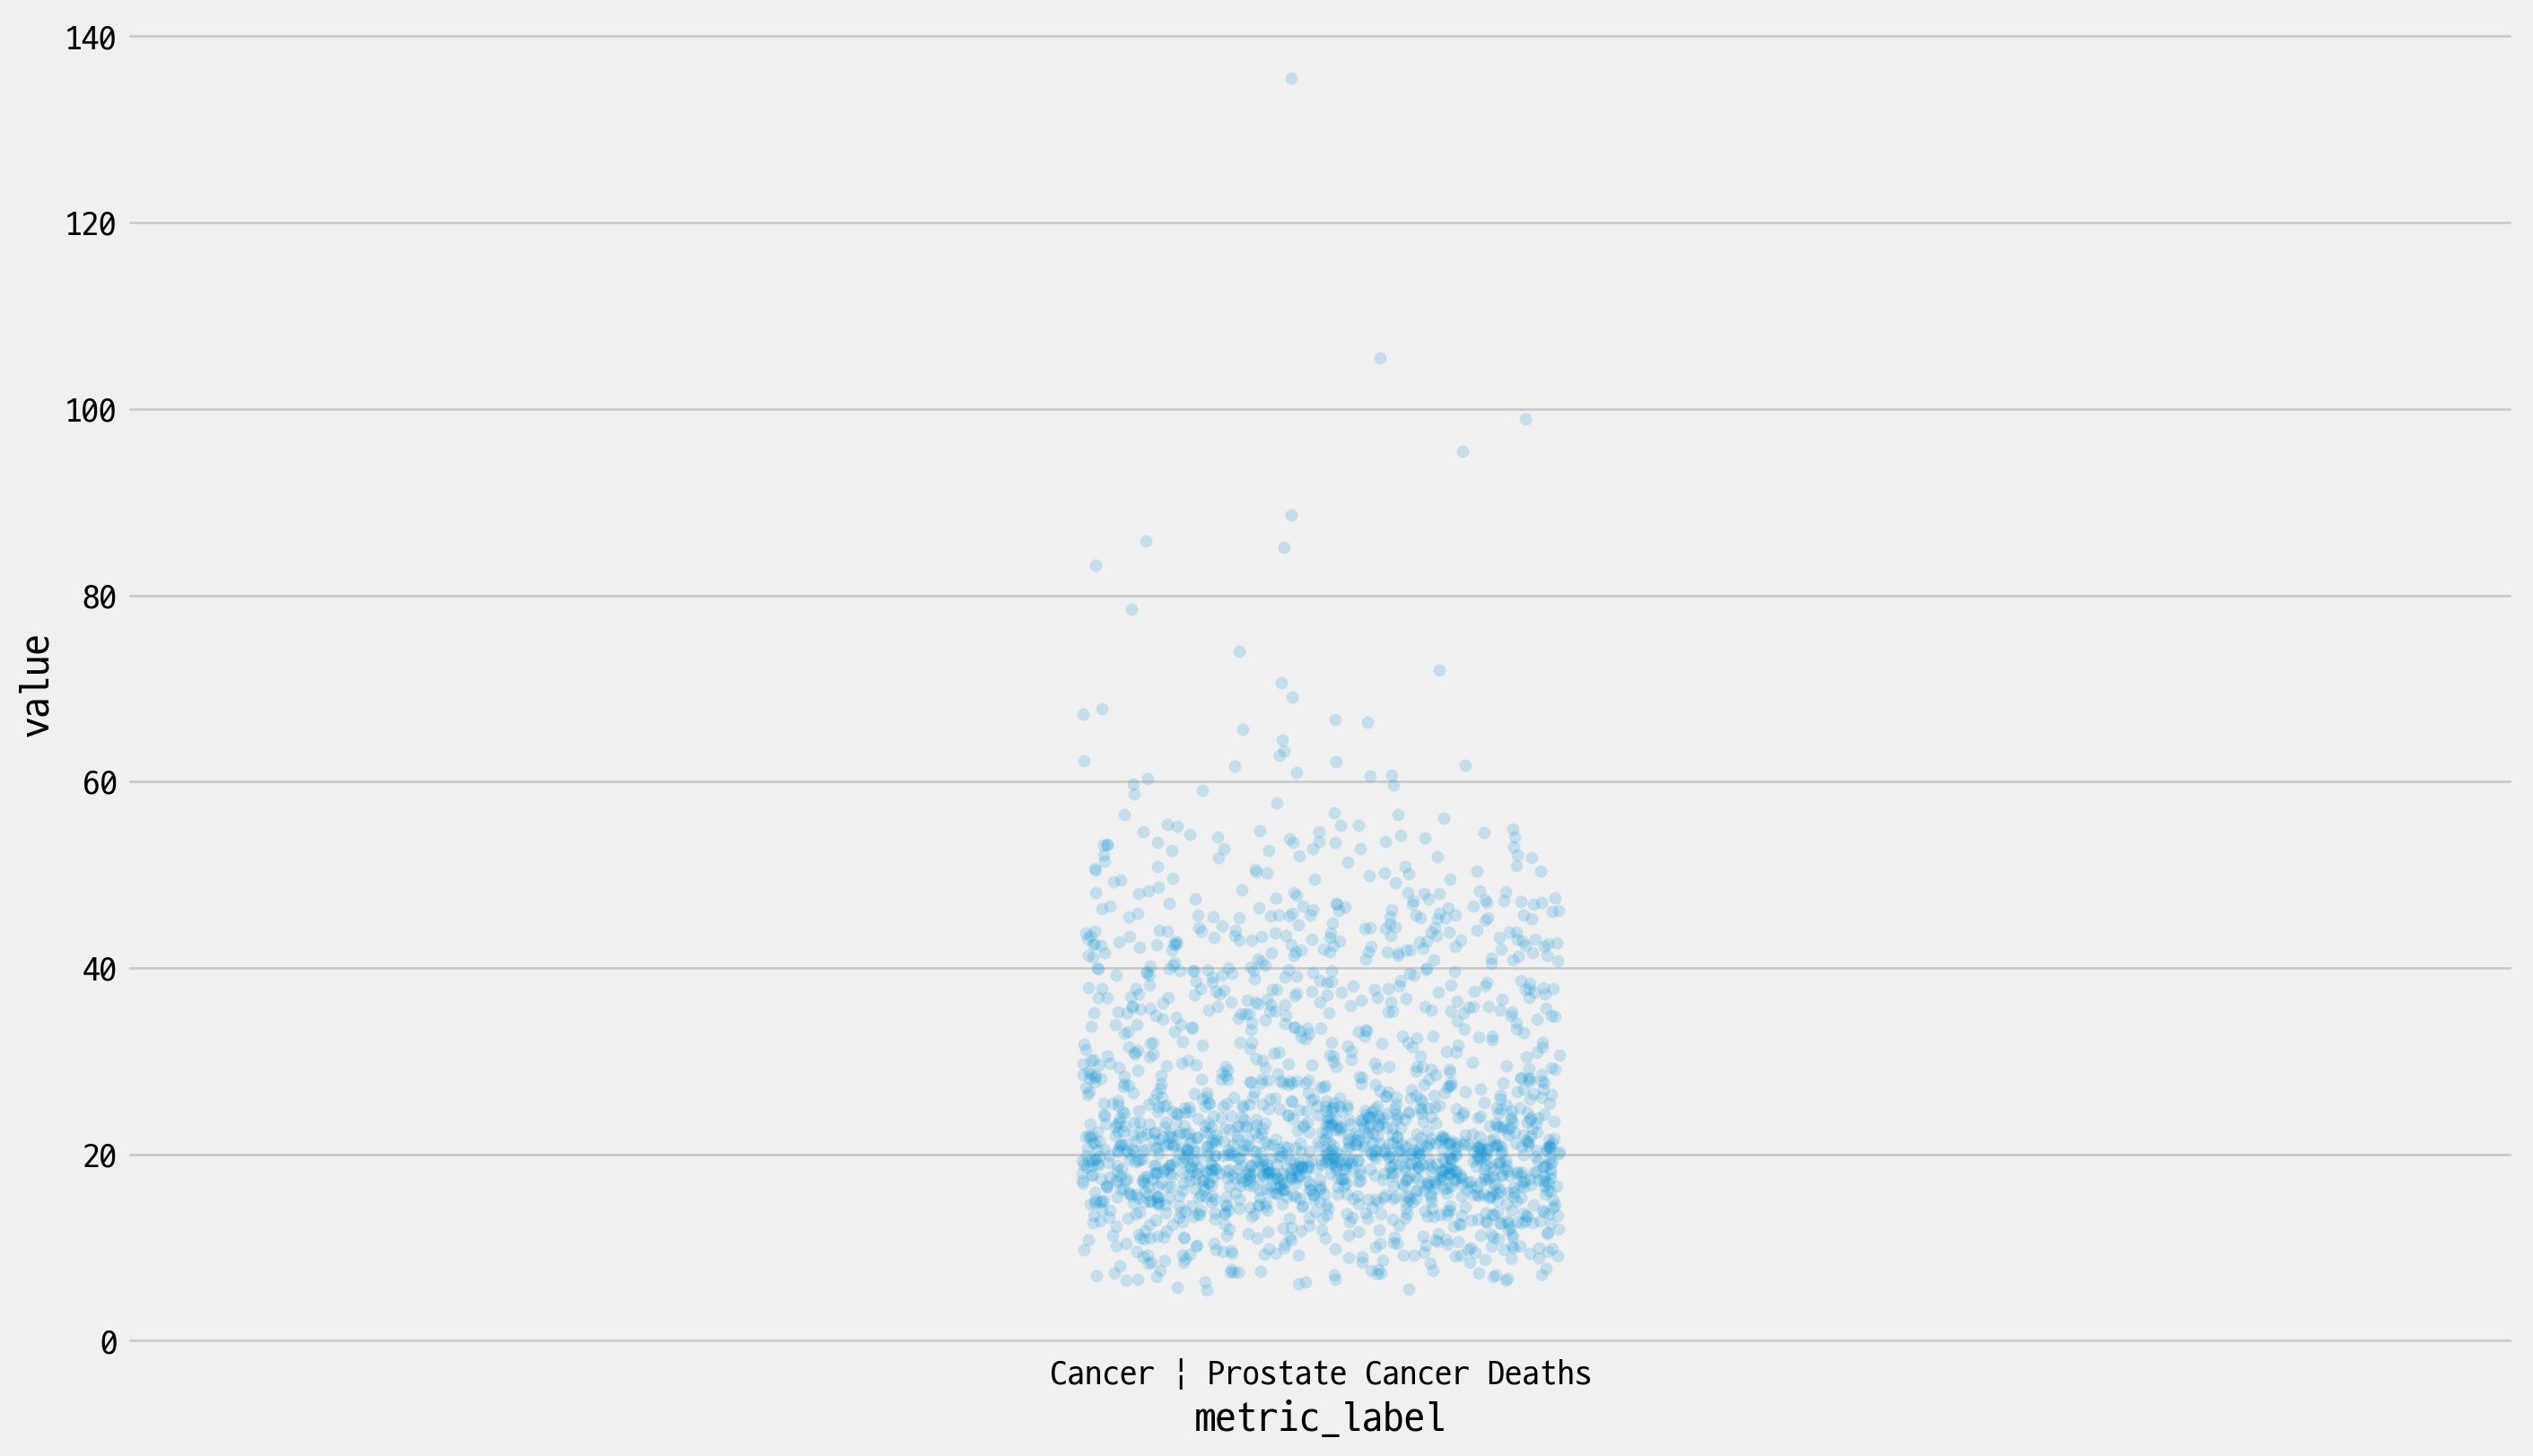

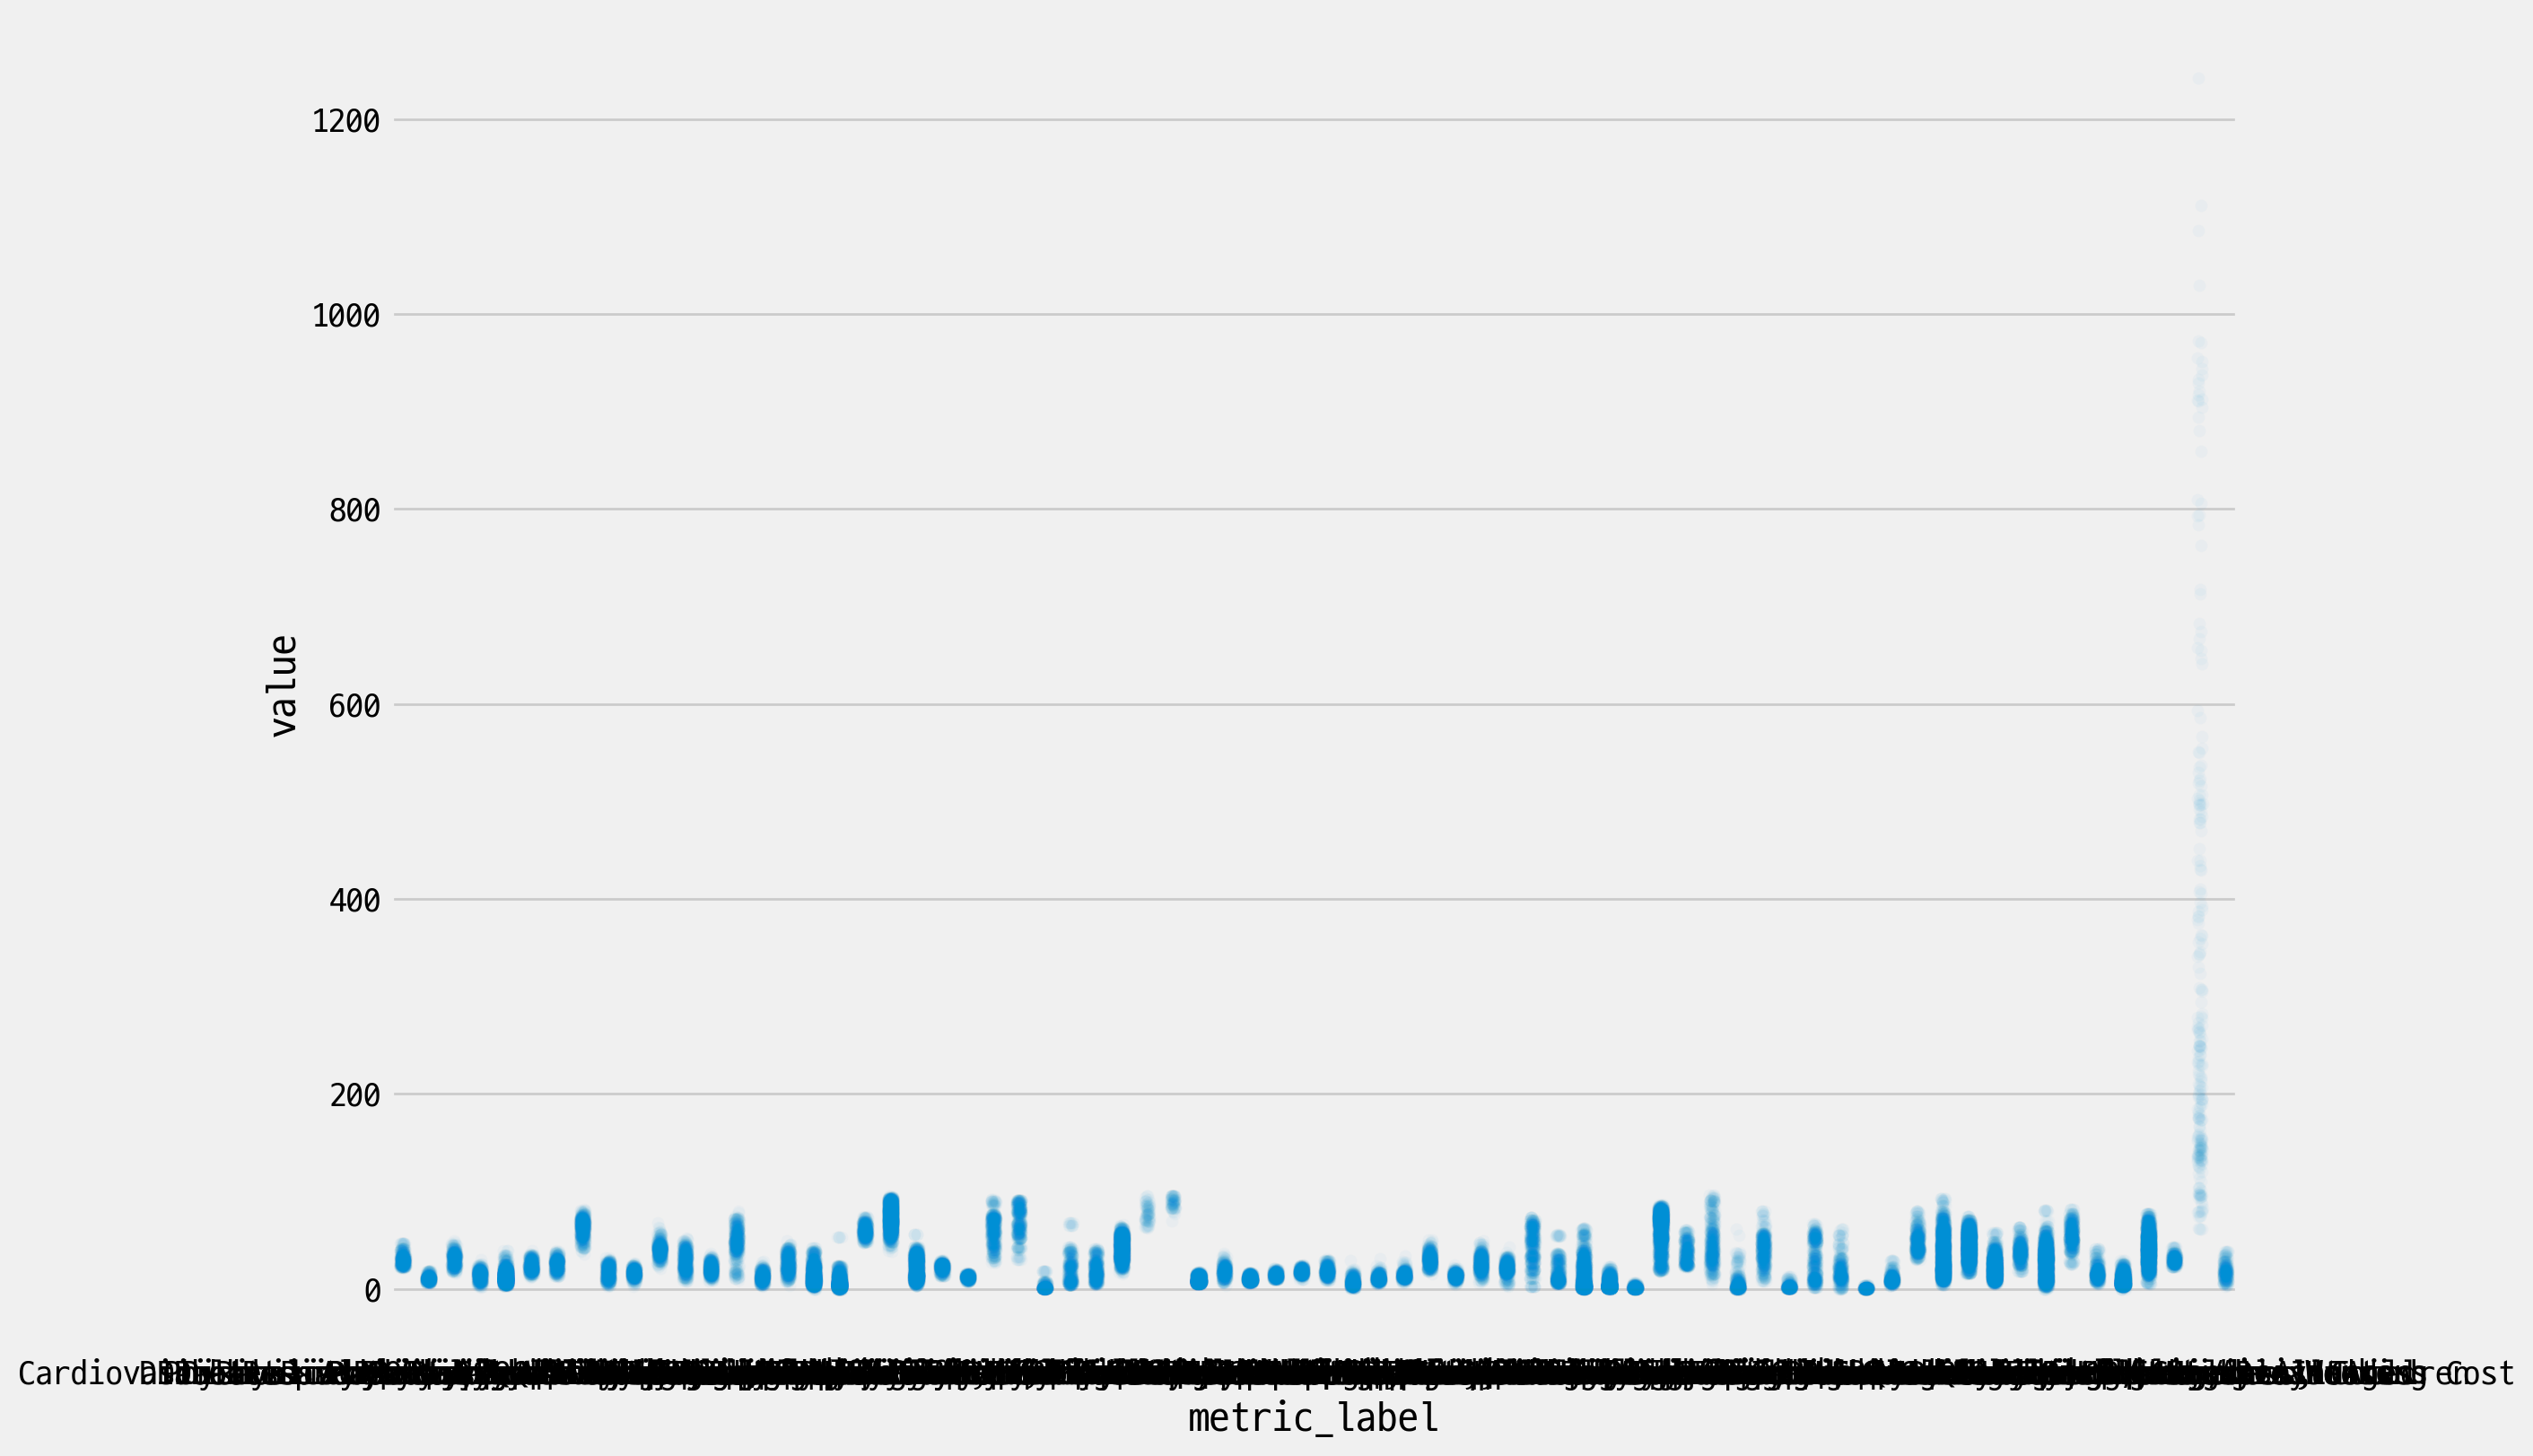

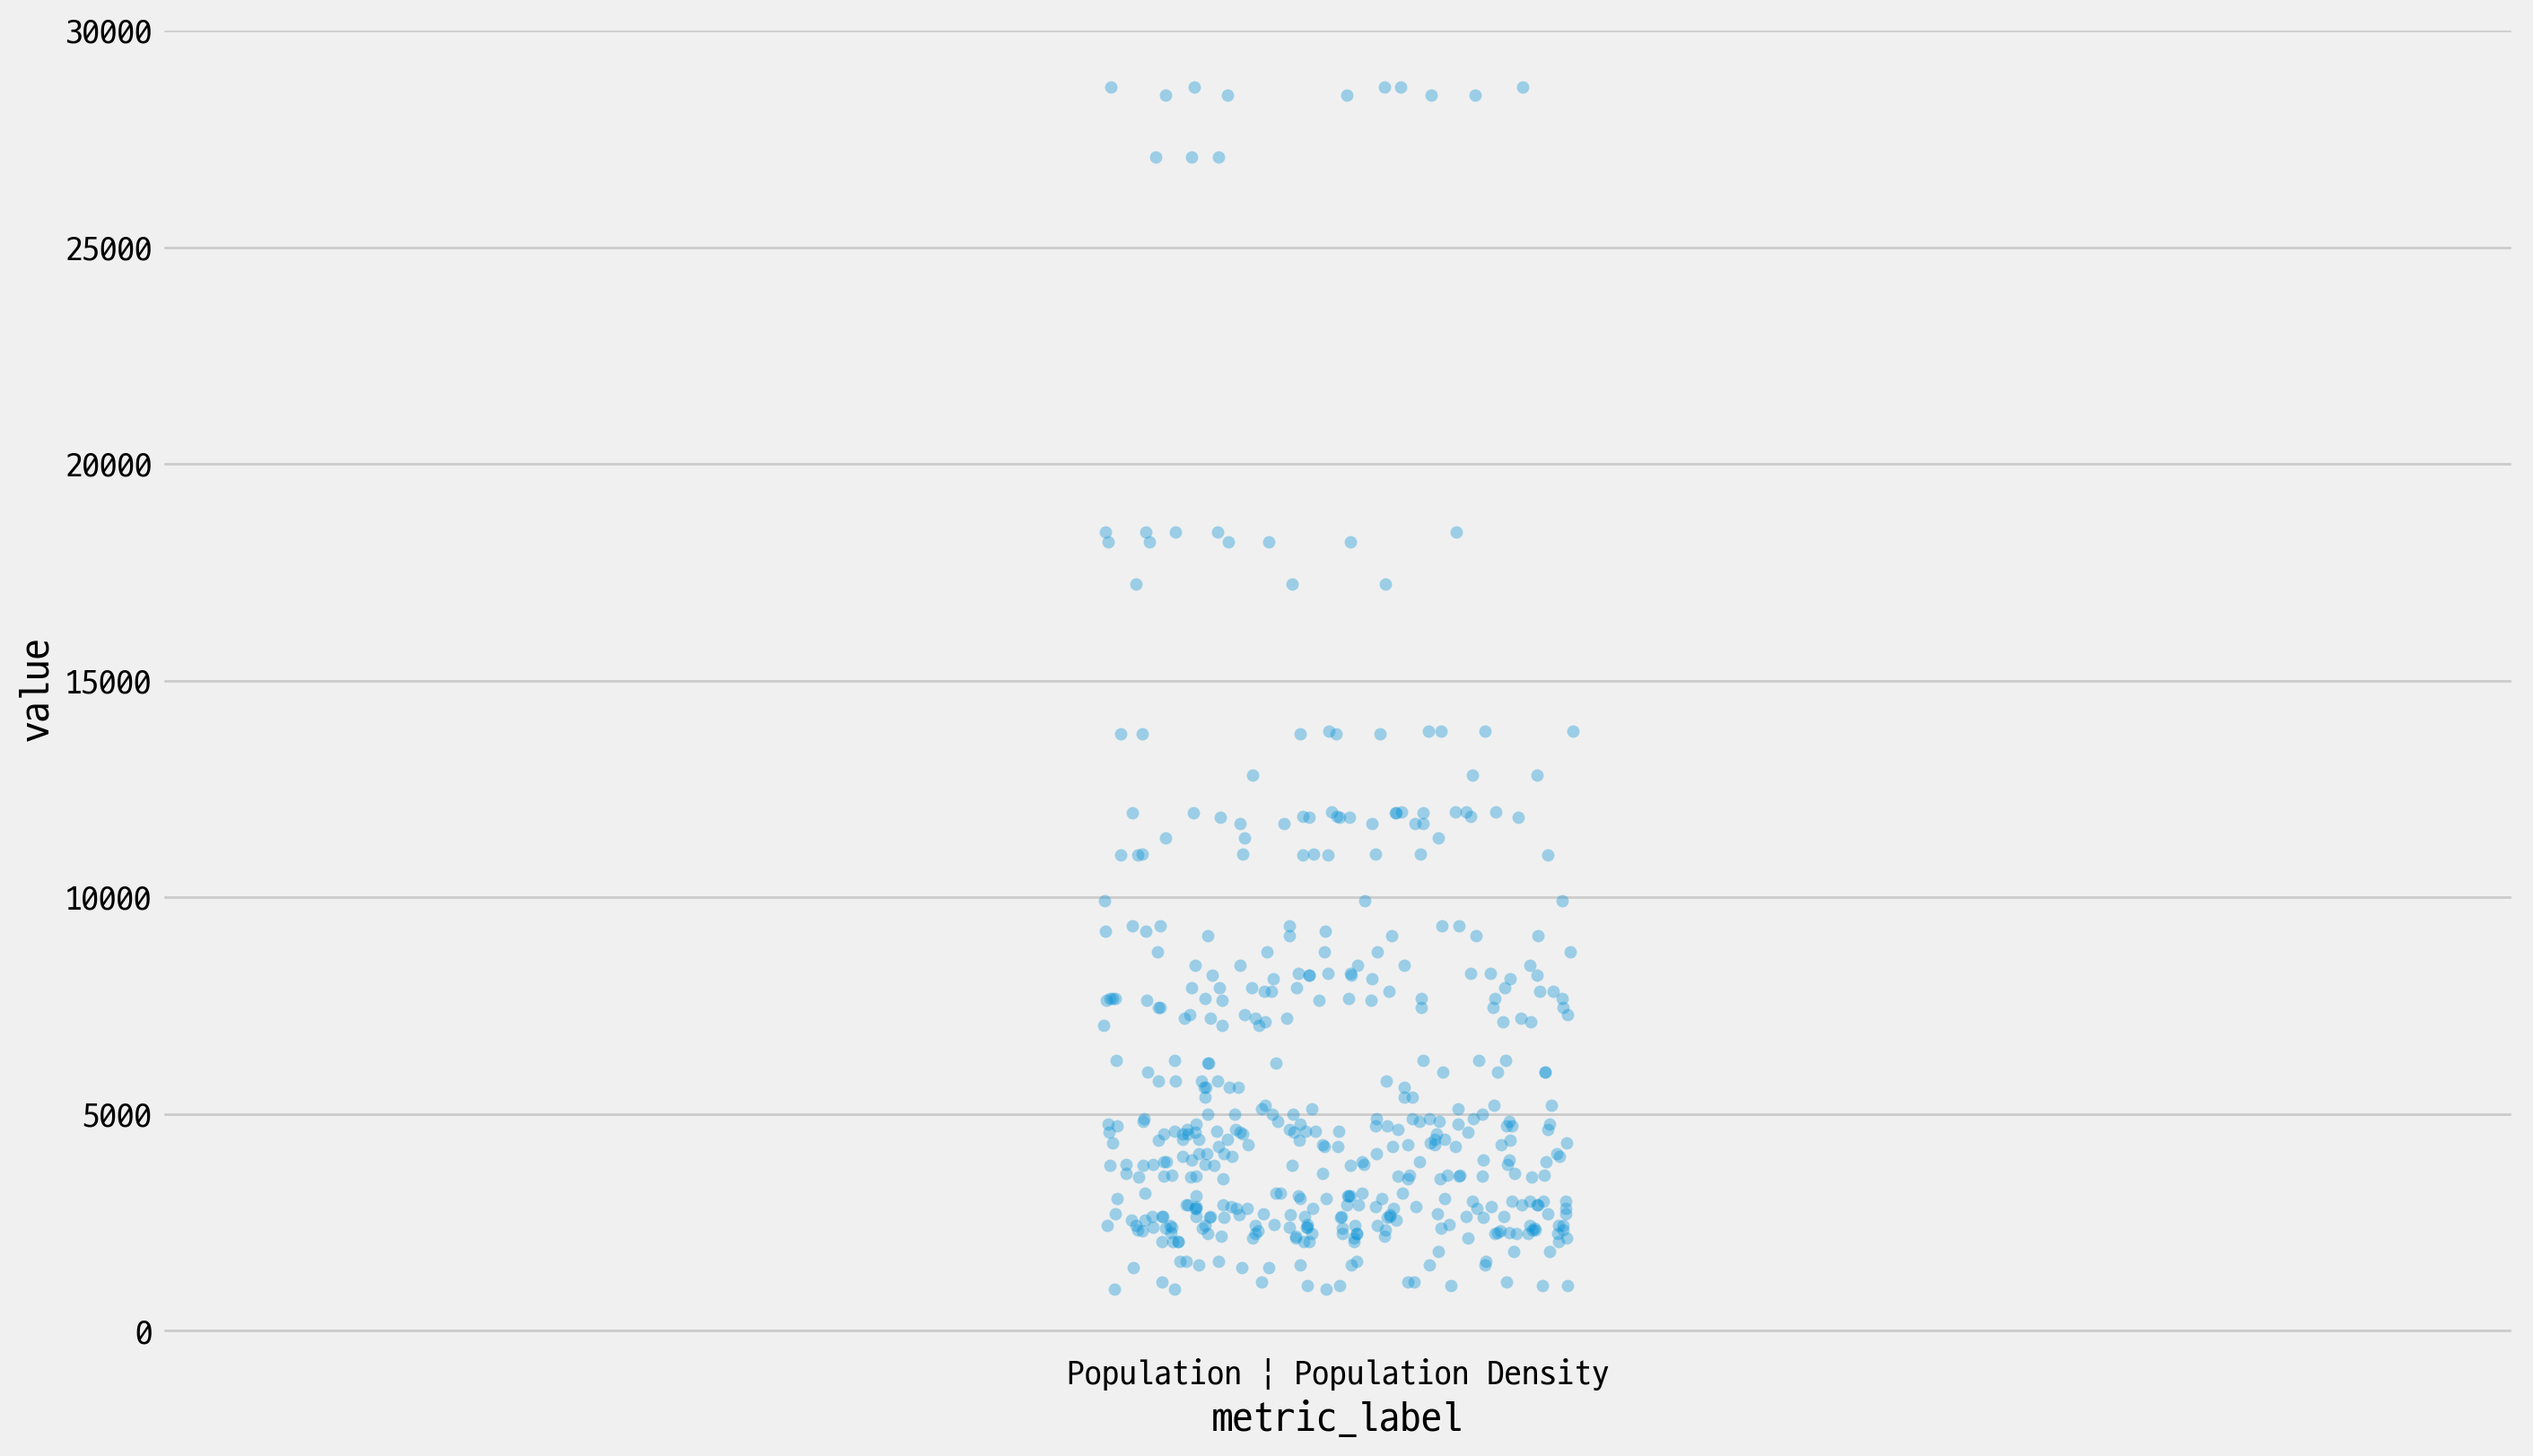

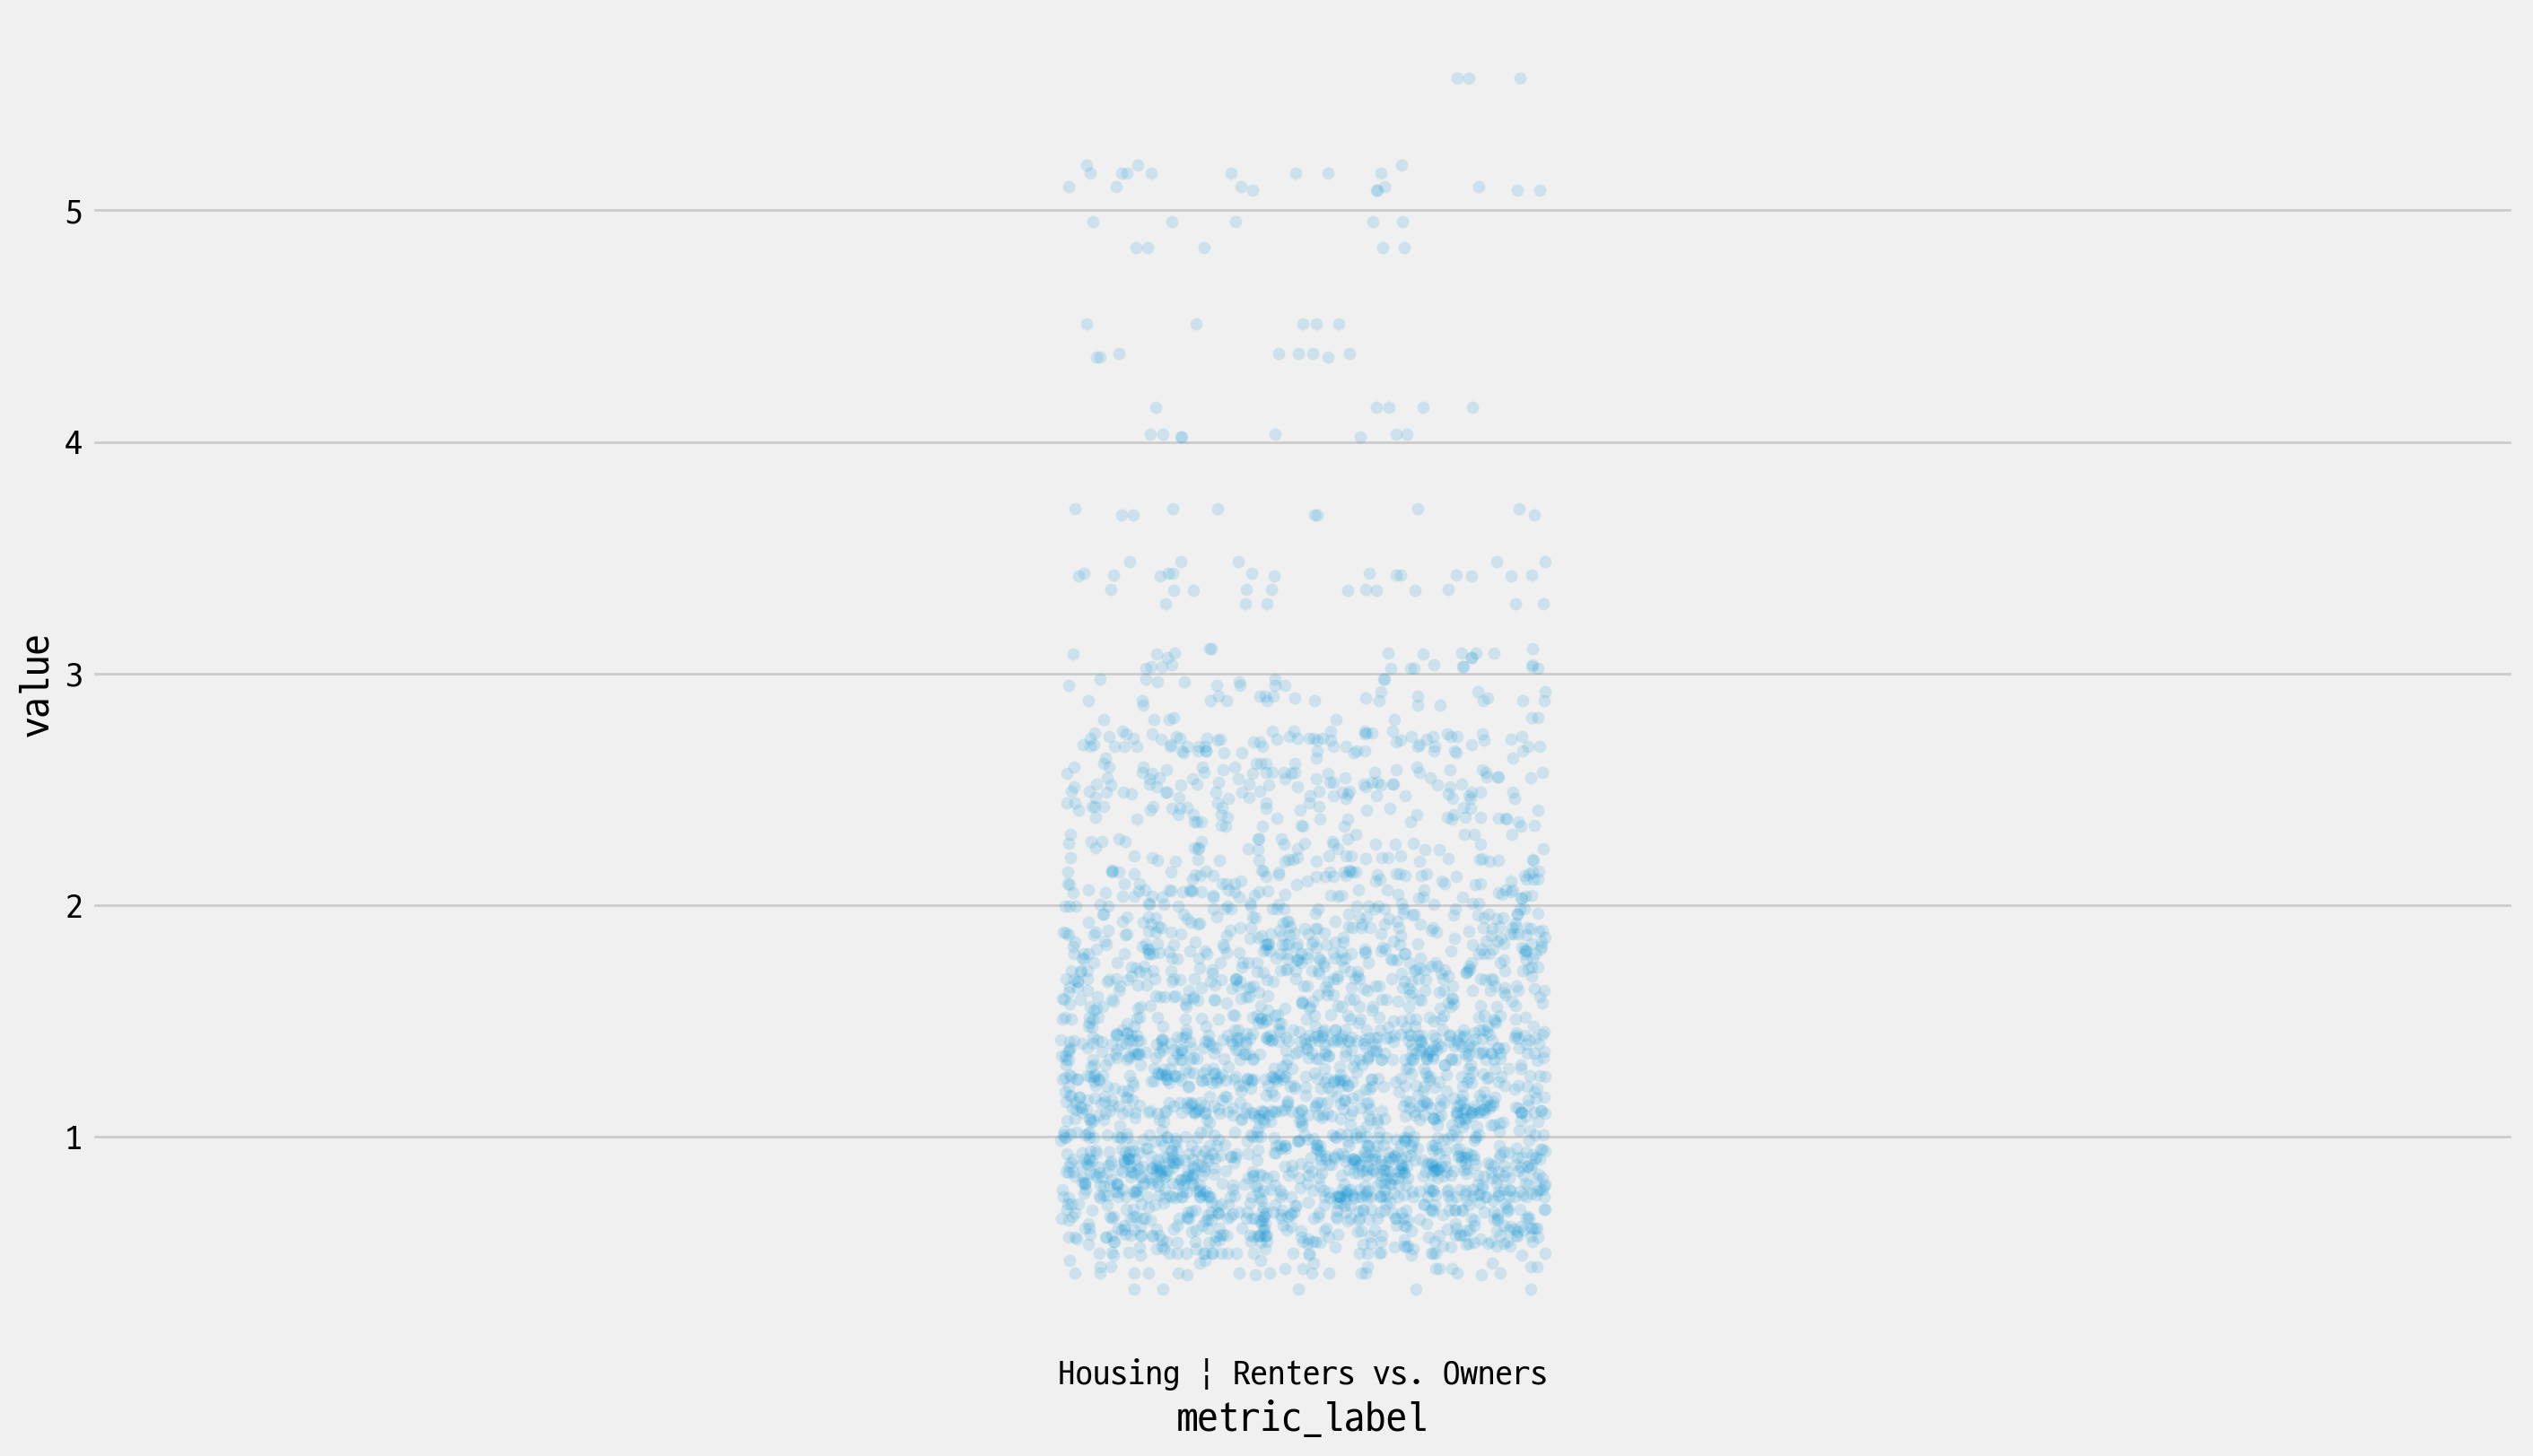

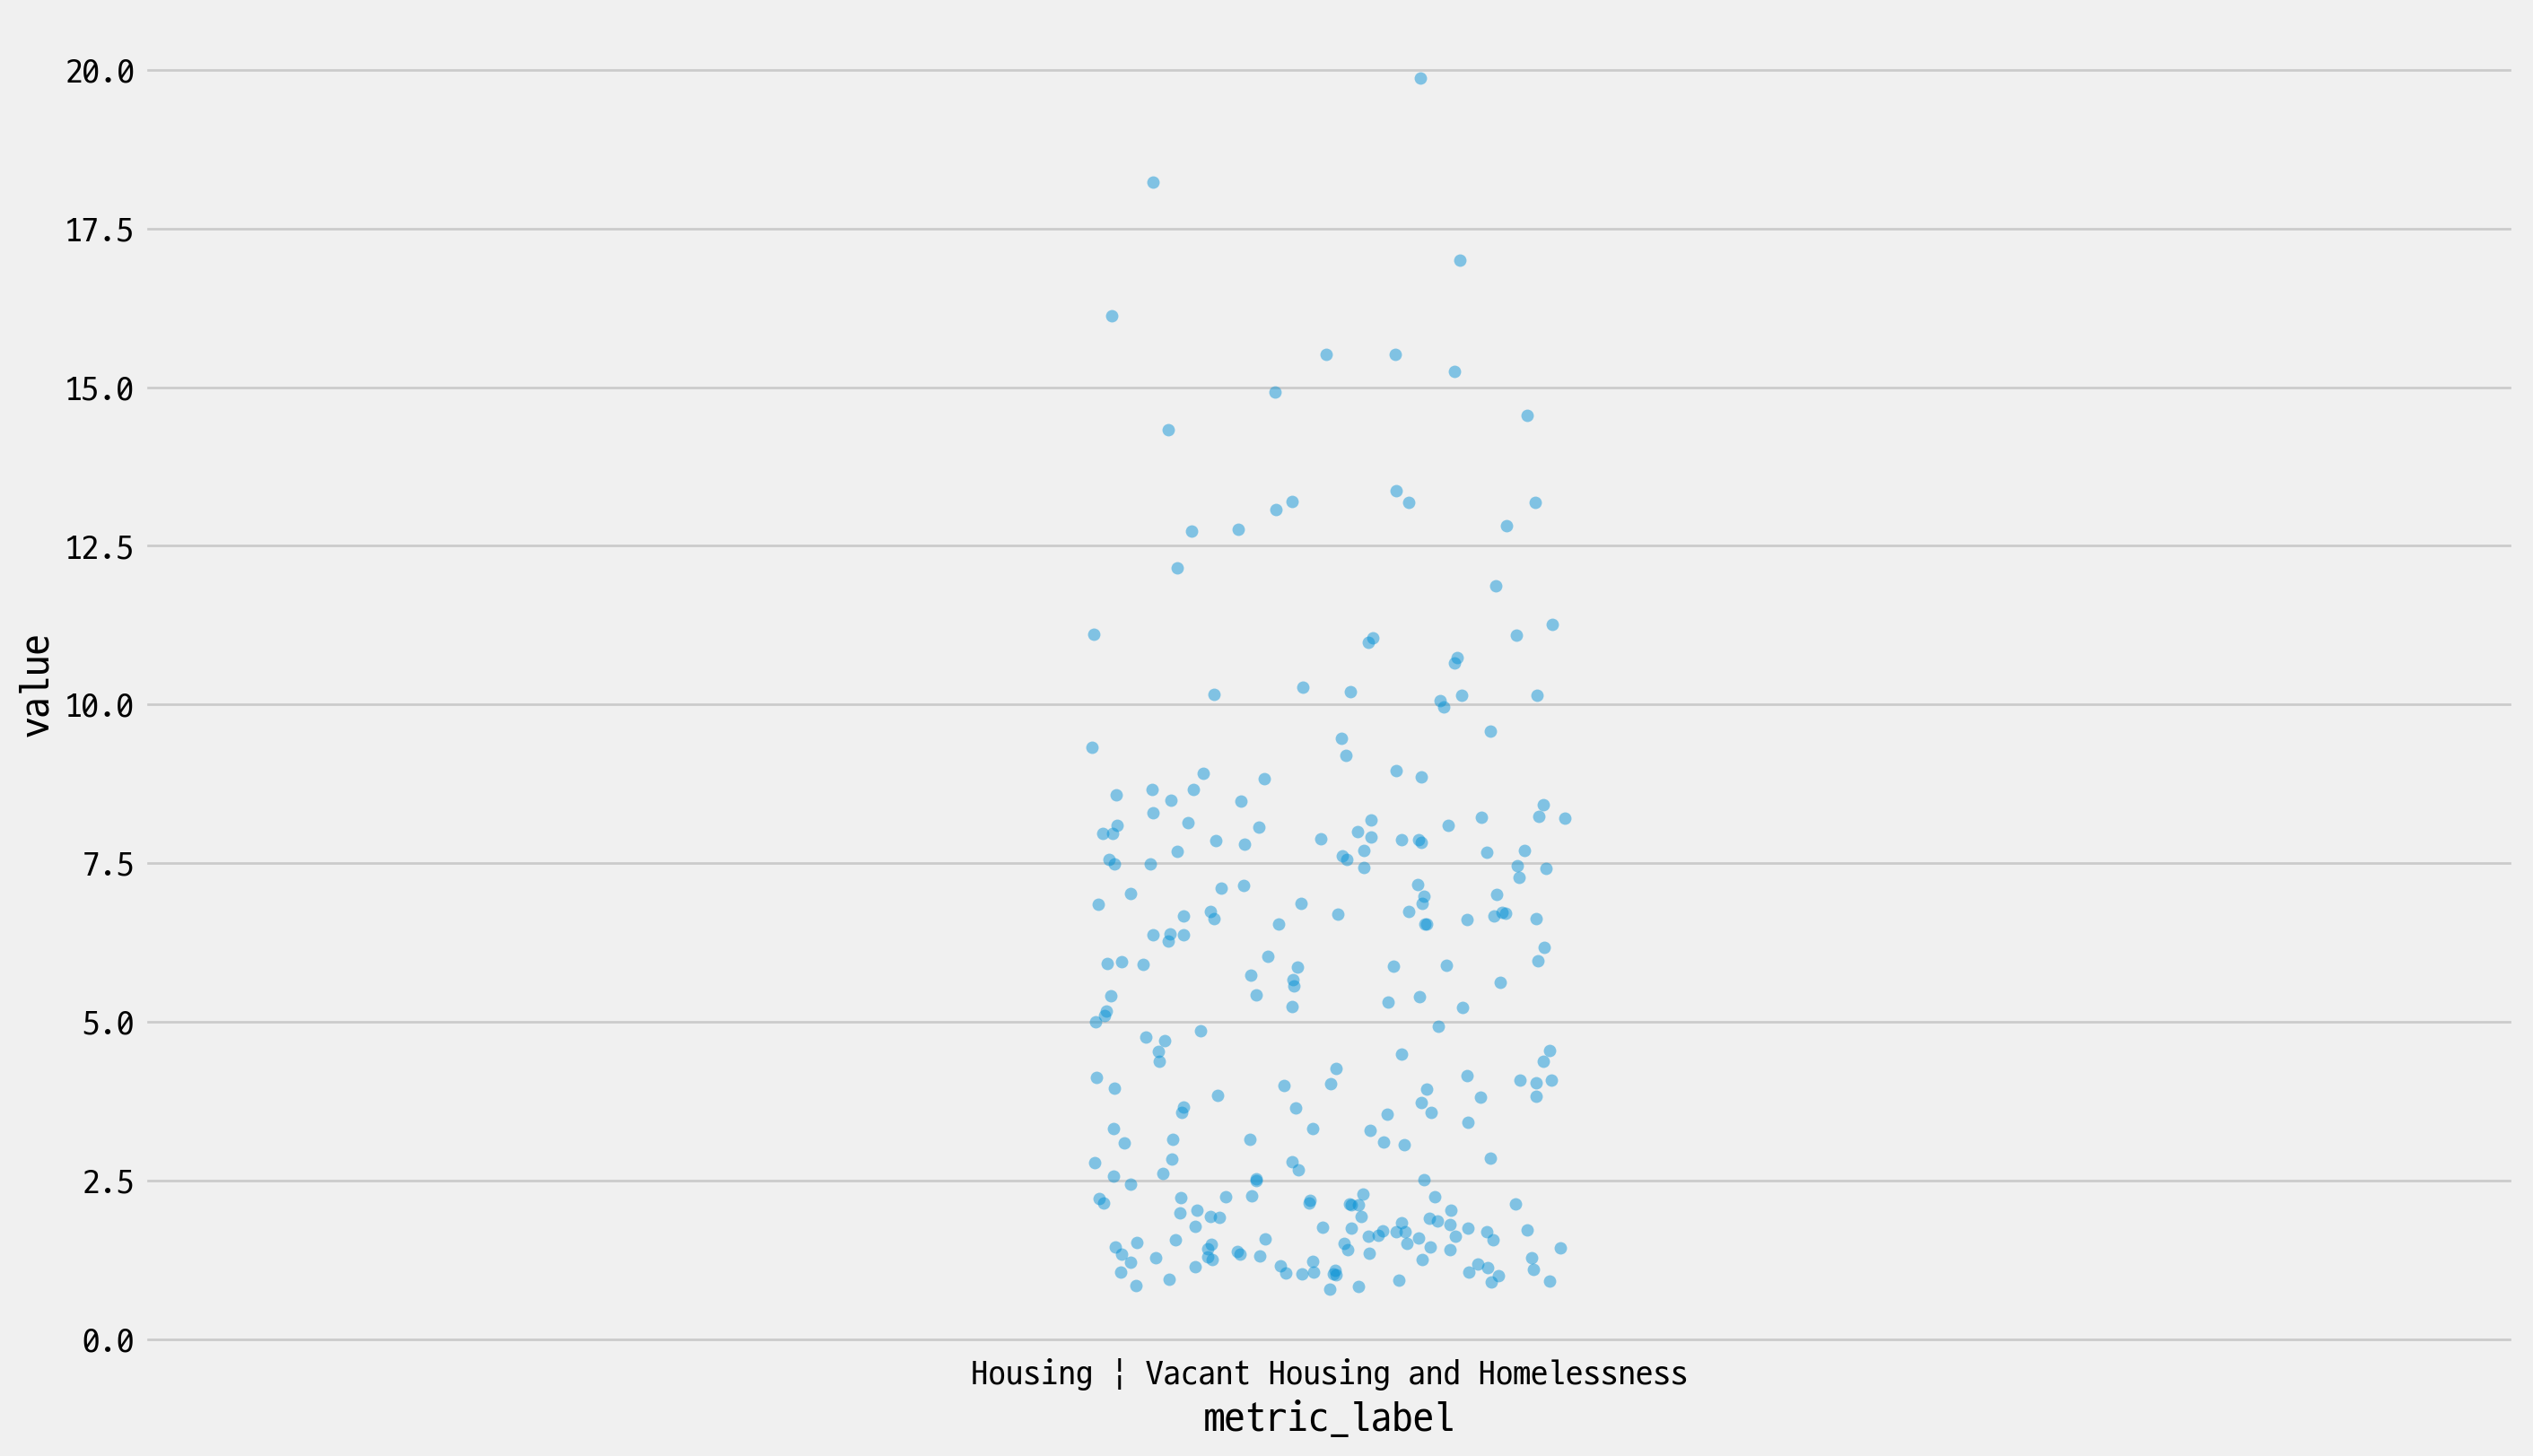

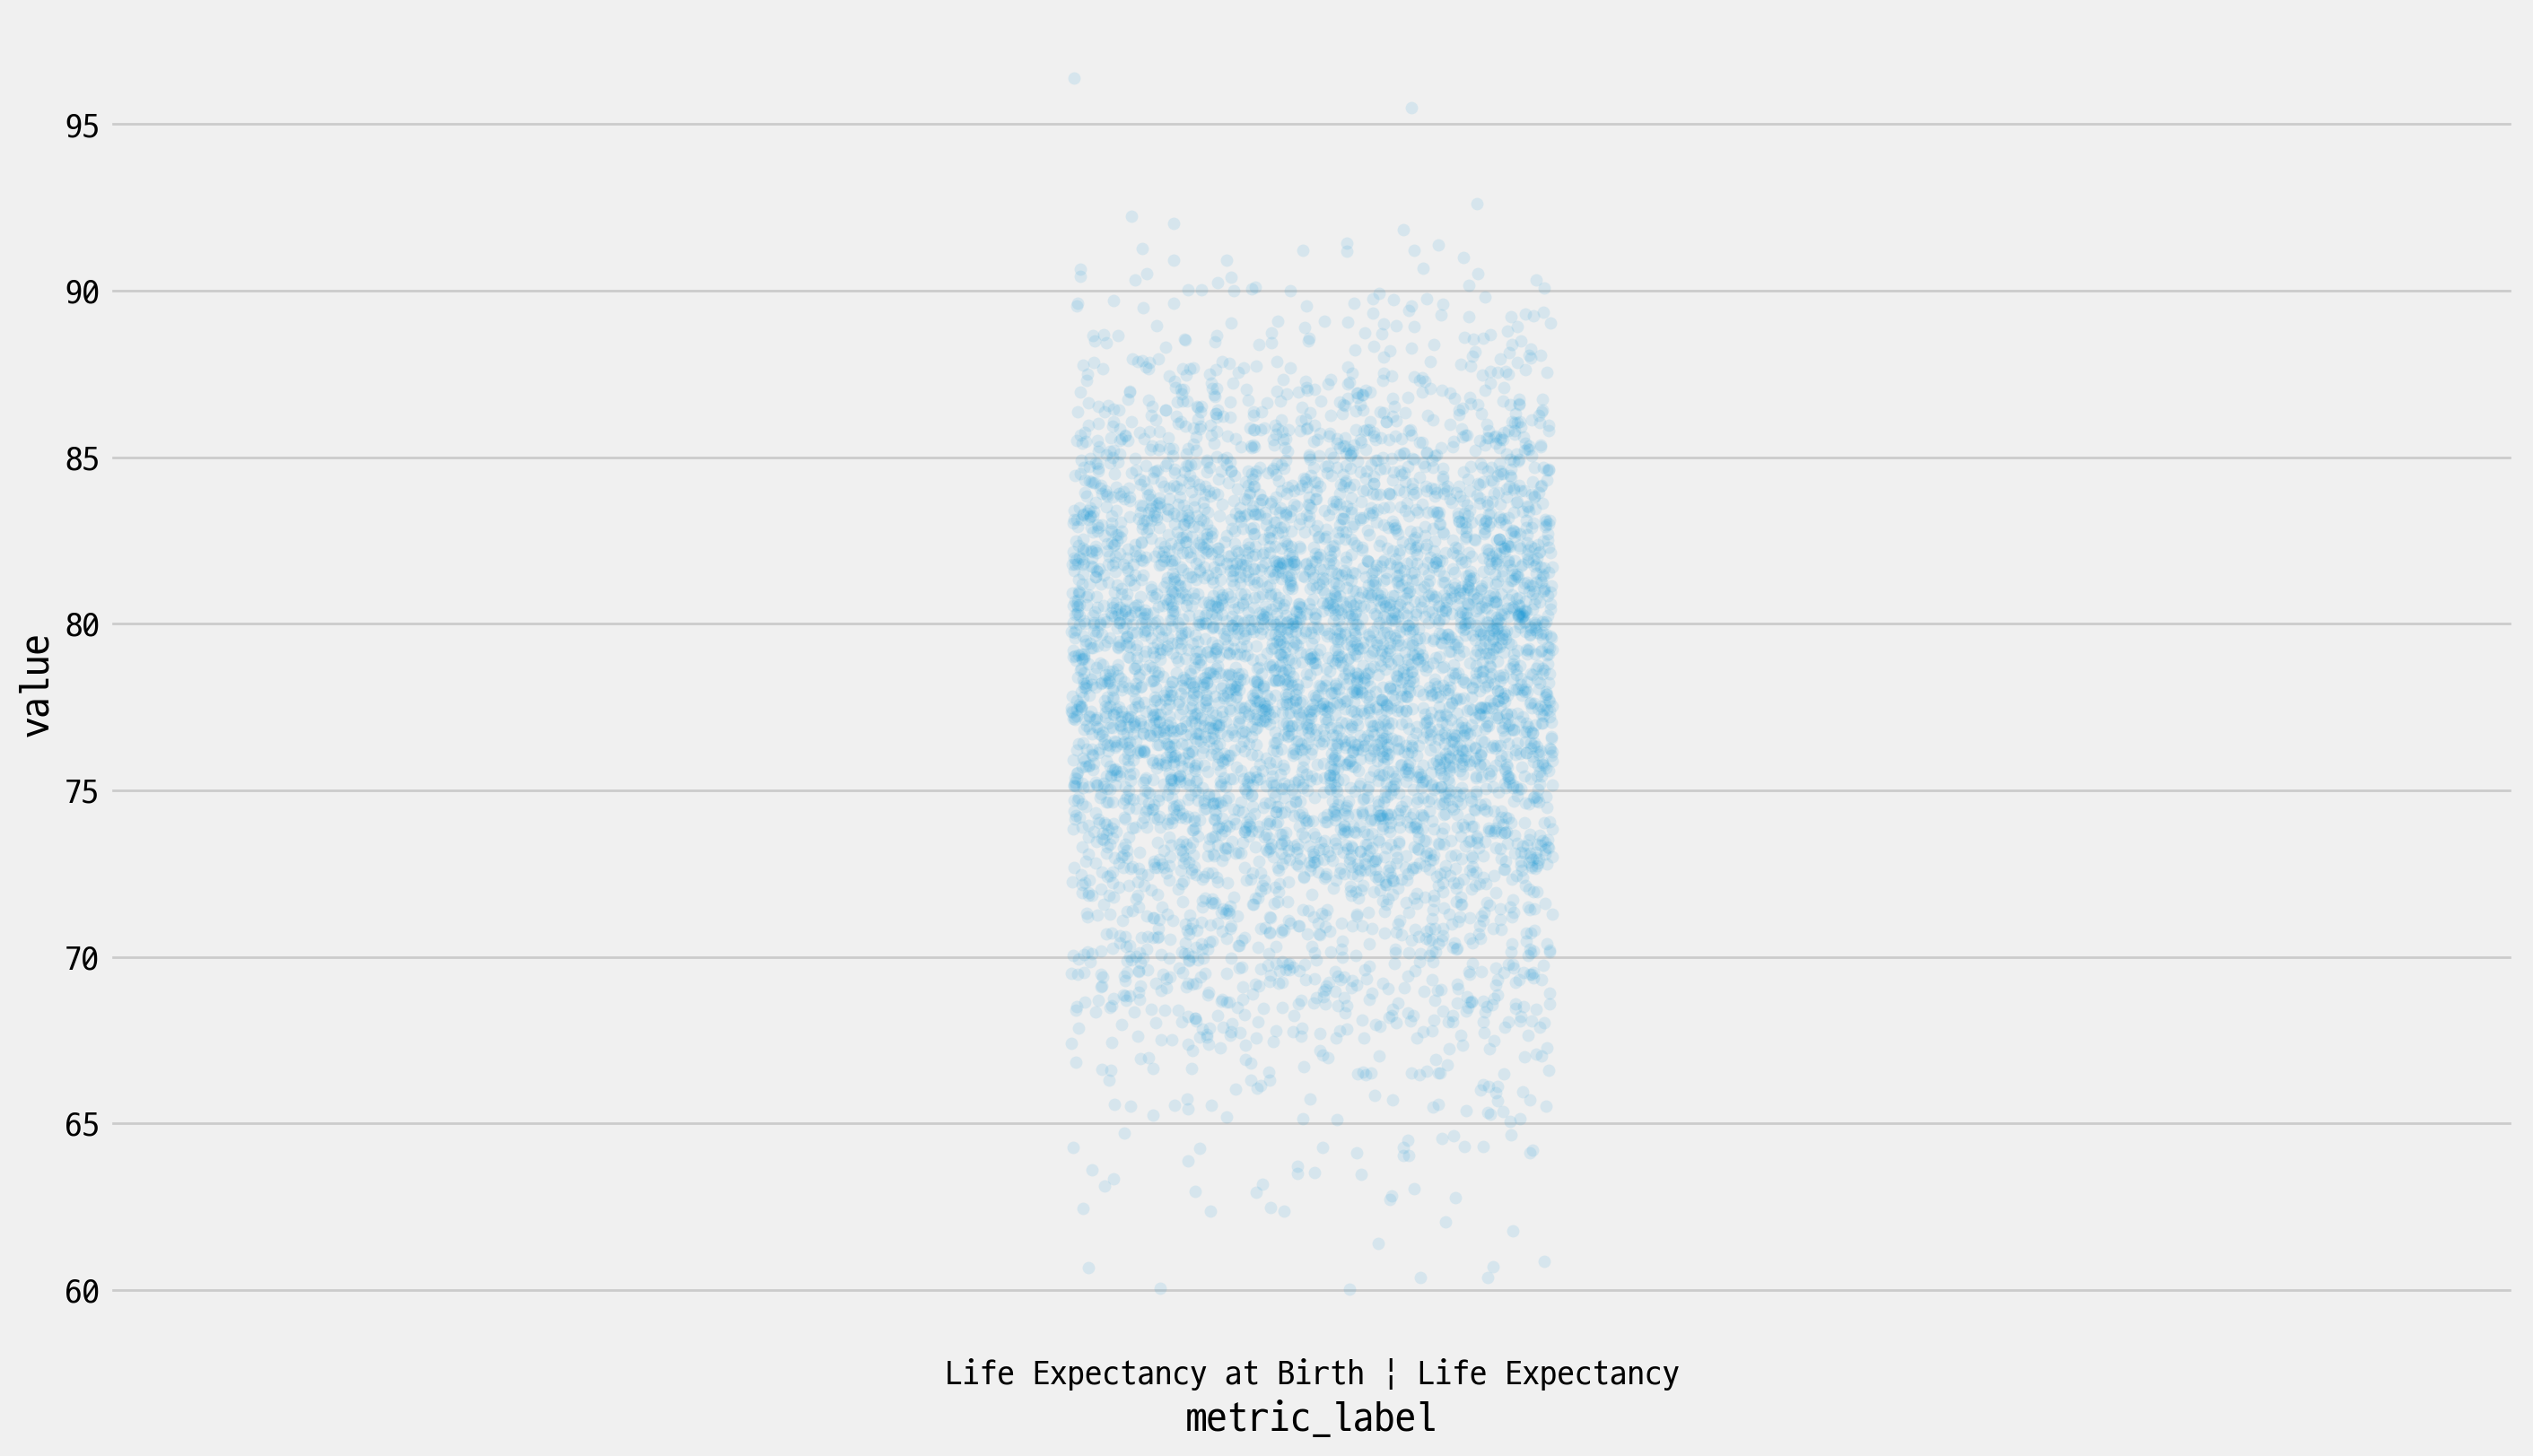

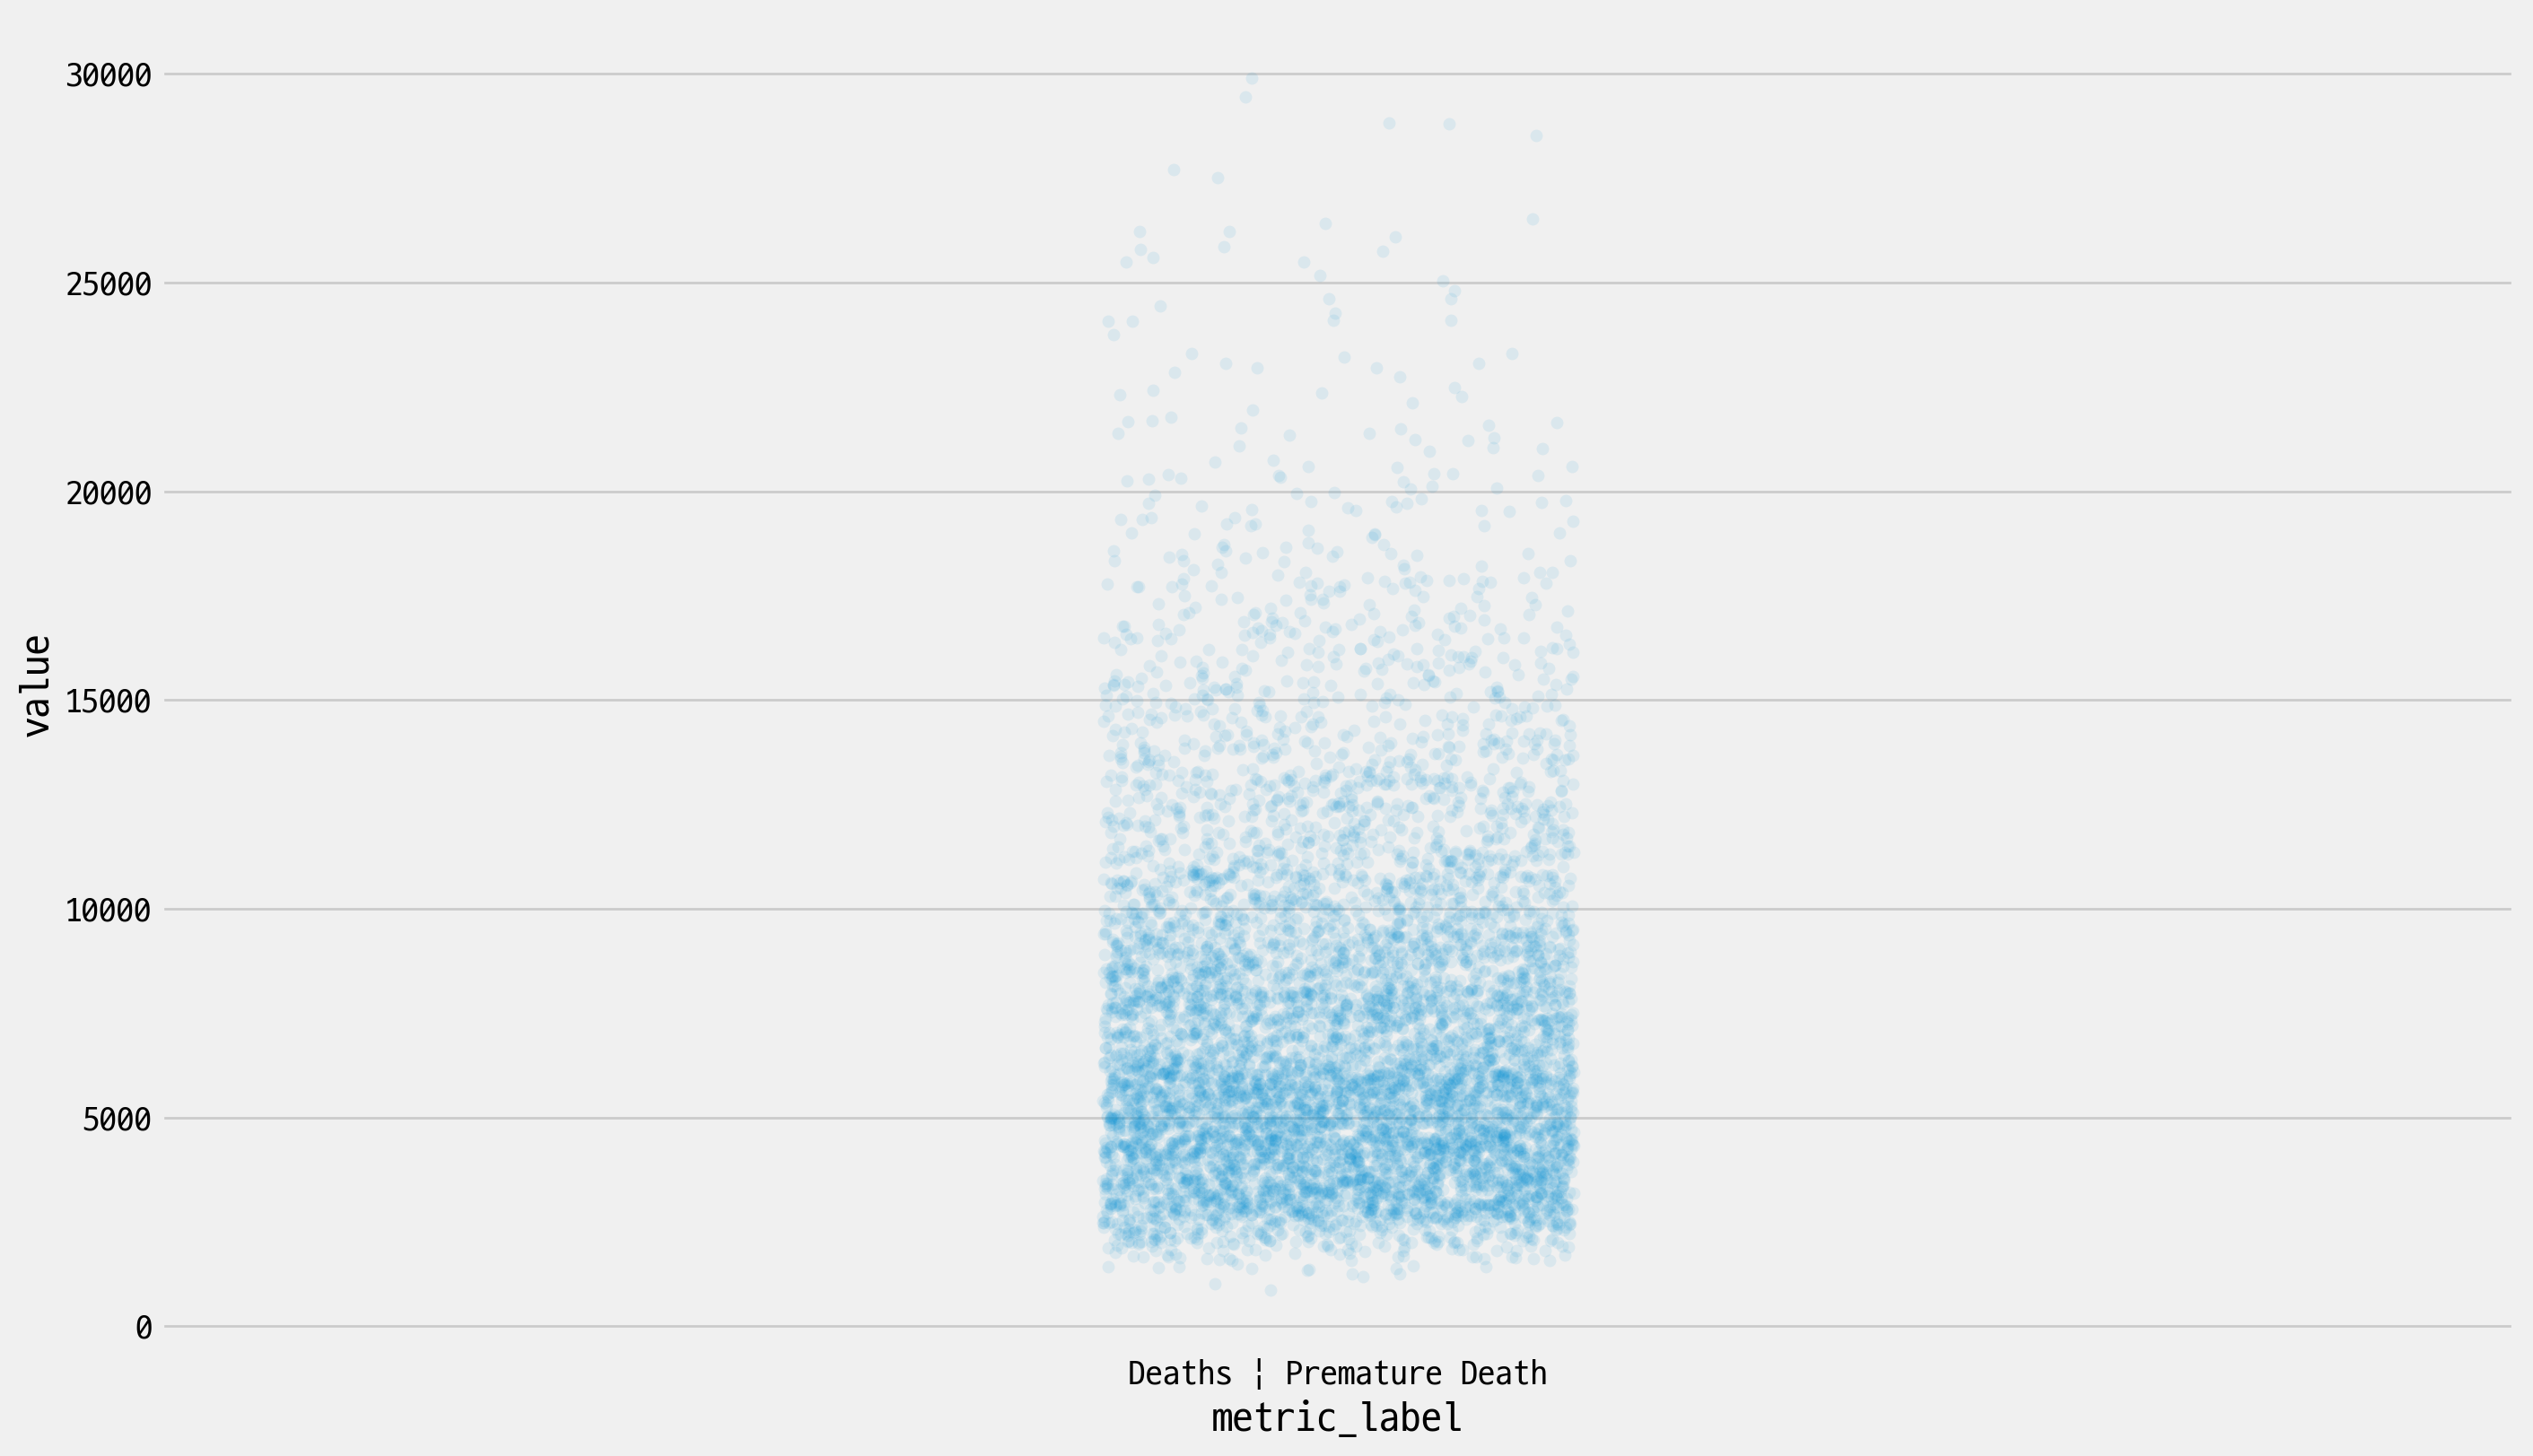

In [18]:
for unit in grouped_by_unit.index:
    fig,ax = plt.subplots(figsize=(14,8))
    group = list(grouped_by_unit[unit])
    data_label = df_city.loc[df_city['metric_label'].isin(group),['metric_label','value']]
    sns.stripplot(data=data_label,
                  x='metric_label',
                  y='value', s=5,
#                  alpha=0.05,
                  alpha=7.5/np.sqrt(len(data_label)),
                  ax=ax)

In [19]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

df_list = [] 
for unit in grouped_by_unit.index:
    var_dict = dict()
    group = list(grouped_by_unit[unit])
    for label in group:
        values_label = df_city.loc[df_city['metric_label']==label,'value'].values
        values_label = values_label.reshape(-1,1)
        values_scaled = minmax.fit_transform(values_label)
        var_dict[label] = {
            'min_origin' : np.min(values_label),
            'max_origin' : np.max(values_label),
            'std_origin' : np.std(values_label,ddof=1),
            'std_scaled' : np.std(values_scaled,ddof=1)
        }
    print(unit)
    df_group = pd.DataFrame(var_dict).T.sort_values(by=['std_scaled'])
    display(df_group)
    df_group['unit'] = [unit] * len(df_group)
    df_list.append(df_group)

Cases per 100,000


min_origin  max_origin  \
Sexually Transmitted Disease | HIV/AIDS Prevalence         0.0      4155.2   
Sexually Transmitted Disease | New Chlamydia Cases       241.2      1740.0   
Sexually Transmitted Disease | Syphilis Prevalence         1.7        66.0   
Respiratory Infection | New Tuberculosis Cases             0.9        14.0   
Sexually Transmitted Disease | New Gonorrhea Cases        32.3       691.7   

                                                    std_origin  std_scaled  
Sexually Transmitted Disease | HIV/AIDS Prevalence  633.265478    0.152403  
Sexually Transmitted Disease | New Chlamydia Cases  260.684038    0.173929  
Sexually Transmitted Disease | Syphilis Prevalence   11.462105    0.178260  
Respiratory Infection | New Tuberculosis Cases        2.350632    0.179438  
Sexually Transmitted Disease | New Gonorrhea Cases  138.909308    0.210660

Cases per 100,000 live births


max_origin  min_origin  \
Sexually Transmitted Disease | Syphilis, Newborns       218.1         0.0   

                                                   std_origin  std_scaled  
Sexually Transmitted Disease | Syphilis, Newborns   38.808661     0.17794

Days


min_origin  max_origin  \
Heat and Disasters | Longer Summers                5.291667       76.55   
Heat and Disasters | Climate-related  Disasters    1.700000       41.25   

                                                 std_origin  std_scaled  
Heat and Disasters | Longer Summers               16.636897    0.233473  
Heat and Disasters | Climate-related  Disasters   11.224505    0.283805

Dollars


max_origin  min_origin    std_origin  \
Income | Per-capita Household Income    123781.0      9215.0  16514.030906   

                                      std_scaled  
Income | Per-capita Household Income    0.144144

Incidents per 100,000


min_origin   max_origin  std_origin  \
Crime Incidents | Homicides        0.390534   177.075431   21.847010   
Crime Incidents | Violent Crime  247.978421  2430.540585  450.960327   

                                 std_scaled  
Crime Incidents | Homicides         0.12365  
Crime Incidents | Violent Crime     0.20662

Lower is better


min_origin  max_origin  \
Racial Segregation Indices | Racial Segregation...   24.235413   73.709643   
Income Inequality | Household Income Inequality      -0.417027    0.535981   
Racial Segregation Indices | Racial Segregation...   23.080583   63.750438   
Racial Segregation Indices | Racial Segregation...   34.052616   82.995941   
Racial Segregation Indices | Racial Segregation...   27.180399   65.623007   
Income Inequality | Income Inequality                 0.438500    0.549600   

                                                    std_origin  std_scaled  
Racial Segregation Indices | Racial Segregation...    8.337795    0.168528  
Income Inequality | Household Income Inequality       0.189200    0.198529  
Racial Segregation Indices | Racial Segregation...    9.299369    0.228655  
Racial Segregation Indices | Racial Segregation...   11.483776    0.234634  
Racial Segregation Indices | Racial Segregation...    9.168969    0.238511  
Income Inequality | Income Inequality                 0.028288    0.254615

Number


max_origin  min_origin  std_origin  \
Heat and Disasters | Number of Heat Waves    9.230769    2.615385    1.566329   

                                           std_scaled  
Heat and Disasters | Number of Heat Waves    0.236771

Per 1,000


max_origin  min_origin  std_origin  std_scaled
Deaths | Infant Deaths   18.745802    1.212856    3.167332     0.18065

Per 1,000 females aged 15-19


max_origin  min_origin  std_origin  std_scaled
Births | Teen Births  108.797573    0.479482   20.540804    0.189634

Per 1,000,000


min_origin  max_origin  \
Deaths | Police Killings                        0.124048   10.598666   
Deaths | Racial Disparity in Police Killings   -0.755277   10.257729   

                                              std_origin  std_scaled  
Deaths | Police Killings                        1.946342    0.185815  
Deaths | Racial Disparity in Police Killings    2.547810    0.231346

Per 100,000


min_origin   max_origin  \
Substance Use | Drug Overdose Deaths                  1.021154   361.132863   
Substance Use | Opioid Overdose Deaths                0.378272   283.676957   
Deaths | Injury Deaths                                8.544513   566.412211   
Deaths | Motor Vehicle Deaths                         1.146940    74.370839   
Sexually Transmitted Disease | HIV-Related Deaths     0.291317    48.710788   
Deaths | Gun Deaths (Firearms)                        0.244125   188.381426   
Cancer | Colorectal Cancer Deaths                     4.758794    44.120084   
Respiratory Infection | COVID-19 Deaths              10.214955   550.262320   
Mental Health | Suicide                               1.197470    62.080139   
Cancer | All Cancer Deaths                           38.478528   366.096025   
Respiratory Infection | Pneumonia or Influenza ...    2.781153    38.251628   
Deaths | Deaths from All Causes                     164.618082  1906.888878   
Cardiovascular Disease | Heart Disease Deaths        33.238320   498.128161   
Cardiovascular Disease | Cardiovascular Disease...   54.393527   600.463371   
Cancer | Lung Cancer Deaths                           7.228669   106.001104   
Diabetes and Obesity | Diabetes Deaths                3.415029    82.846570   
Deaths | Maternal Deaths                              4.853148    74.883930   

                                                    std_origin  std_scaled  
Substance Use | Drug Overdose Deaths                 29.248669    0.081221  
Substance Use | Opioid Overdose Deaths               25.519061    0.090078  
Deaths | Injury Deaths                               56.429955    0.101153  
Deaths | Motor Vehicle Deaths                         7.428255    0.101446  
Sexually Transmitted Disease | HIV-Related Deaths     5.551657    0.114658  
Deaths | Gun Deaths (Firearms)                       22.067076    0.117292  
Cancer | Colorectal Cancer Deaths                     5.162161    0.131148  
Respiratory Infection | COVID-19 Deaths              71.698438    0.132763  
Mental Health | Suicide                               8.246733    0.135453  
Cancer | All Cancer Deaths                           49.763327    0.151895  
Respiratory Infection | Pneumonia or Influenza ...    5.458800    0.153897  
Deaths | Deaths from All Causes                     275.254166    0.157986  
Cardiovascular Disease | Heart Disease Deaths        74.174567    0.159553  
Cardiovascular Disease | Cardiovascular Disease...   89.461122    0.163827  
Cancer | Lung Cancer Deaths                          16.393928    0.165977  
Diabetes and Obesity | Diabetes Deaths               13.406133    0.168776  
Deaths | Maternal Deaths                             15.858592    0.226452

Per 100,000 females


max_origin  min_origin  std_origin  std_scaled
Cancer | Breast Cancer Deaths   47.144915    6.063927    7.109412    0.173058

Per 100,000 males


max_origin  min_origin  std_origin  \
Cancer | Prostate Cancer Deaths  135.501279    5.467552   13.048362   

                                 std_scaled  
Cancer | Prostate Cancer Deaths    0.100346

Percent


min_origin  max_origin  \
Health Insurance | Uninsured, Child                   0.000000   53.080569   
Mental Health | Electronic Bullying                   5.000000   30.800000   
Mental Health | School Bullying                       6.500000   33.800000   
Air Pollution | Hazardous Air Quality                 0.000000   61.643836   
Disability | People with Disabilities                 2.973169   39.174268   
...                                                        ...         ...   
Food Access | Limited Supermarket Access              2.567482   73.280664   
Language and Nativity | Foreign Born Population       4.599319   41.006077   
Respiratory Infection | COVID-19 Vaccination, A...   62.200000   95.000000   
Transportation | Longer Driving Commute Time         22.413465   60.816557   
Lead Poisoning | Housing Lead Risk                    1.428462   67.293850   

                                                    std_origin  std_scaled  
Health Insurance | Uninsured, Child                   5.308348    0.100005  
Mental Health | Electronic Bullying                   3.030748    0.117471  
Mental Health | School Bullying                       3.230483    0.118333  
Air Pollution | Hazardous Air Quality                 8.062406    0.130790  
Disability | People with Disabilities                 4.877715    0.134739  
...                                                        ...         ...  
Food Access | Limited Supermarket Access             18.160412    0.256818  
Language and Nativity | Foreign Born Population       9.372114    0.257428  
Respiratory Infection | COVID-19 Vaccination, A...    8.737136    0.266376  
Transportation | Longer Driving Commute Time         10.353660    0.269605  
Lead Poisoning | Housing Lead Risk                   19.773924    0.300217  

[72 rows x 4 columns]

Persons per square mile


max_origin  min_origin   std_origin  \
Population | Population Density  28697.81109  957.810839  5365.875376   

                                 std_scaled  
Population | Population Density    0.193435

Ratio


max_origin  min_origin  std_origin  std_scaled
Housing | Renters vs. Owners    5.570248    0.342834    0.840836    0.160851

Vacant housing units per homeless population


max_origin  min_origin  std_origin  \
Housing | Vacant Housing and Homelessness       19.87    0.792206    3.915454   

                                           std_scaled  
Housing | Vacant Housing and Homelessness    0.205236

Years


max_origin  min_origin  \
Life Expectancy at Birth | Life Expectancy   96.381181    60.02972   

                                            std_origin  std_scaled  
Life Expectancy at Birth | Life Expectancy    5.240285    0.144156

Years per 100,000 population aged <75


max_origin  min_origin   std_origin  std_scaled
Deaths | Premature Death  29892.77192  874.249356  4083.740837    0.140729

In [20]:
# 참고

for n in [100,200,500,1000,3000,6000]:
    sample = np.linspace(0,1,n,endpoint=True)
    print(n," : ",np.std(sample,ddof=1))

100  :  0.29304537349375775
200  :  0.2908501734369403
500  :  0.2895427510380739
1000  :  0.28910854464038976
3000  :  0.2888195162806301
6000  :  0.28874731440616946


<Axes: >

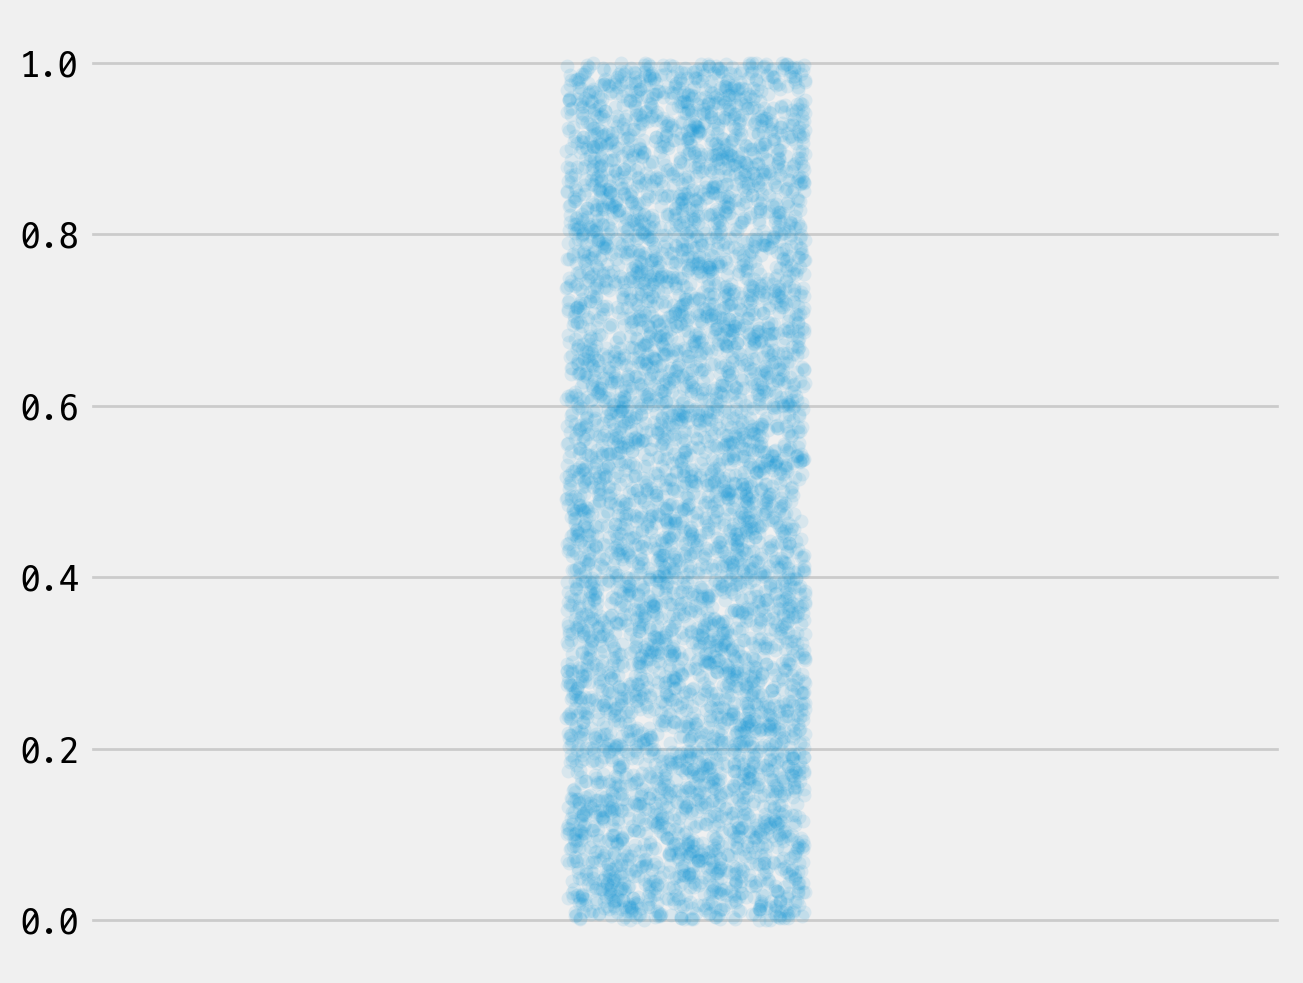

In [21]:
fig,ax=plt.subplots()
sns.stripplot(data=sample,ax=ax,alpha=7.5/np.sqrt(6000),jitter=True)

In [22]:
df_label_desc = pd.concat(df_list)
df_label_desc

min_origin    max_origin  \
Sexually Transmitted Disease | HIV/AIDS Prevalence    0.000000   4155.200000   
Sexually Transmitted Disease | New Chlamydia Cases  241.200000   1740.000000   
Sexually Transmitted Disease | Syphilis Prevalence    1.700000     66.000000   
Respiratory Infection | New Tuberculosis Cases        0.900000     14.000000   
Sexually Transmitted Disease | New Gonorrhea Cases   32.300000    691.700000   
...                                                        ...           ...   
Population | Population Density                     957.810839  28697.811090   
Housing | Renters vs. Owners                          0.342834      5.570248   
Housing | Vacant Housing and Homelessness             0.792206     19.870000   
Life Expectancy at Birth | Life Expectancy           60.029720     96.381181   
Deaths | Premature Death                            874.249356  29892.771920   

                                                     std_origin  std_scaled  \
Sexually Transmitted Disease | HIV/AIDS Prevalence   633.265478    0.152403   
Sexually Transmitted Disease | New Chlamydia Cases   260.684038    0.173929   
Sexually Transmitted Disease | Syphilis Prevalence    11.462105    0.178260   
Respiratory Infection | New Tuberculosis Cases         2.350632    0.179438   
Sexually Transmitted Disease | New Gonorrhea Cases   138.909308    0.210660   
...                                                         ...         ...   
Population | Population Density                     5365.875376    0.193435   
Housing | Renters vs. Owners                           0.840836    0.160851   
Housing | Vacant Housing and Homelessness              3.915454    0.205236   
Life Expectancy at Birth | Life Expectancy             5.240285    0.144156   
Deaths | Premature Death                            4083.740837    0.140729   

                                                                                            unit  
Sexually Transmitted Disease | HIV/AIDS Prevalence                             Cases per 100,000  
Sexually Transmitted Disease | New Chlamydia Cases                             Cases per 100,000  
Sexually Transmitted Disease | Syphilis Prevalence                             Cases per 100,000  
Respiratory Infection | New Tuberculosis Cases                                 Cases per 100,000  
Sexually Transmitted Disease | New Gonorrhea Cases                             Cases per 100,000  
...                                                                                          ...  
Population | Population Density                                          Persons per square mile  
Housing | Renters vs. Owners                                                               Ratio  
Housing | Vacant Housing and Homelessness           Vacant housing units per homeless population  
Life Expectancy at Birth | Life Expectancy                                                 Years  
Deaths | Premature Death                                   Years per 100,000 population aged <75  

[118 rows x 5 columns]

In [23]:
target_cand=[
                          'Deaths | Premature Death',
                            'Deaths | Injury Deaths',
                   'Deaths | Deaths from All Causes',
                        'Cancer | All Cancer Deaths',
 'Cardiovascular Disease | Cardiovascular Diseas...',
     'Cardiovascular Disease | Heart Disease Deaths',
            'Diabetes and Obesity | Diabetes Deaths',
                       'Cancer | Lung Cancer Deaths',
              'Substance Use | Drug Overdose Deaths',
                           'Mental Health | Suicide',
                     'Deaths | Motor Vehicle Deaths',
]

In [24]:
df_label_desc[df_label_desc.index.isin(target_cand)]

min_origin    max_origin  \
Substance Use | Drug Overdose Deaths             1.021154    361.132863   
Deaths | Injury Deaths                           8.544513    566.412211   
Deaths | Motor Vehicle Deaths                    1.146940     74.370839   
Mental Health | Suicide                          1.197470     62.080139   
Cancer | All Cancer Deaths                      38.478528    366.096025   
Deaths | Deaths from All Causes                164.618082   1906.888878   
Cardiovascular Disease | Heart Disease Deaths   33.238320    498.128161   
Cancer | Lung Cancer Deaths                      7.228669    106.001104   
Diabetes and Obesity | Diabetes Deaths           3.415029     82.846570   
Deaths | Premature Death                       874.249356  29892.771920   

                                                std_origin  std_scaled  \
Substance Use | Drug Overdose Deaths             29.248669    0.081221   
Deaths | Injury Deaths                           56.429955    0.101153   
Deaths | Motor Vehicle Deaths                     7.428255    0.101446   
Mental Health | Suicide                           8.246733    0.135453   
Cancer | All Cancer Deaths                       49.763327    0.151895   
Deaths | Deaths from All Causes                 275.254166    0.157986   
Cardiovascular Disease | Heart Disease Deaths    74.174567    0.159553   
Cancer | Lung Cancer Deaths                      16.393928    0.165977   
Diabetes and Obesity | Diabetes Deaths           13.406133    0.168776   
Deaths | Premature Death                       4083.740837    0.140729   

                                                                                unit  
Substance Use | Drug Overdose Deaths                                     Per 100,000  
Deaths | Injury Deaths                                                   Per 100,000  
Deaths | Motor Vehicle Deaths                                            Per 100,000  
Mental Health | Suicide                                                  Per 100,000  
Cancer | All Cancer Deaths                                               Per 100,000  
Deaths | Deaths from All Causes                                          Per 100,000  
Cardiovascular Disease | Heart Disease Deaths                            Per 100,000  
Cancer | Lung Cancer Deaths                                              Per 100,000  
Diabetes and Obesity | Diabetes Deaths                                   Per 100,000  
Deaths | Premature Death                       Years per 100,000 population aged <75